<a href="https://colab.research.google.com/github/felipeescallon/TP_PruebaTecnica_CientificoDatos/blob/main/CASO_CONSULTORIA_TP/Finished_version_GCollab_CASO_DE_CONSULTORIA_TP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#### TELEPERFORMANCE (TP) - Prueba Técnica - Científico de Datos  (Por: Andrés Felipe Escallón Portilla,  22-24 / Feb / 2021)


# CASO DE CONSULTORIA 

###### **Requerimiento:**

Una de las operaciones de cobranzas de la compañía quiere generar estrategias diferenciadas para el proceso de gestión de recuperación de cartera de clientes de acuerdo con el riesgo de no pago de la primera factura.

La estrategia se divide en 3 grupos de intervención:

1. Alto riesgo: Llamarlos al 5 día de mora.
2. Medio riesgo: Enviar mensaje de texto al 5 día de mora.
3. Bajo riesgo: Enviar mensaje de texto al día 15 de mora.

Los costos por cada tipo de contacto son los siguientes:

- Llamada asesor de cobranza 1700 pesos
- Mensaje de texto 40 pesos

#### **Instrucciones**

1. Muestre un análisis descriptivo y/o diagnóstico inicial de la información insumo para el modelo.
2. Construya un modelo estadístico que calcule la probabilidad de que un cliente no pague la primera factura. Explique por qué escogió las variables con las que va a trabajar y si debió hacer modificaciones de estas.
3. Defina los puntos de corte que determinen a que grupo de estrategia pertenece cada cliente.
4. Describa el perfil de los clientes con un alto riesgo de no pago.
5. ¿Qué sugerencias haría usted al equipo de cobranzas de acuerdo con el análisis de la información del modelo?
6. Explique el modelo y sustente su validez estadística, así como los puntos de corte, la cantidad de clientes que pertenecen a cada estrategia, los perfiles de riesgo y sus sugerencias y conclusiones.
7. Adjunte la base de datos con la probabilidad de riesgo de cada cliente.

Todos los puntos anteriores deben evidenciarse en un notebook de Python o un Markdown de R que se deben compartir a través de GitHub.


# Solución del Caso:
Responderé a este caso en Español aclarando que lo ideal hubiese sido hacerlo en Inglés (algunos comentarios si están en Inglés).

1. **Muestre un análisis descriptivo y/o diagnóstico inicial de la información insumo para el modelo:**

#### Análisis de Datos Exploratorio (EDA):

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install -r '/content/drive/MyDrive/Teleperformance_PruebaTecnica_CientificoDatos/requirements.txt'

     |████████████████████████████████| 133kB 15.3MB/s 
     |████████████████████████████████| 1.0MB 12.6MB/s 
     |████████████████████████████████| 204kB 43.6MB/s 
     |████████████████████████████████| 81kB 8.2MB/s 
     |████████████████████████████████| 7.6MB 42.0MB/s 
     |████████████████████████████████| 14.8MB 314kB/s 
     |████████████████████████████████| 6.5MB 41.9MB/s 
  Created wheel for pingouin: filename=pingouin-0.3.10-cp37-none-any.whl size=203396 sha256=202d9b2a7885f62d215b1d0f55c84d5a32ac30c6e0fd943530b0748e935f348e
  Stored in directory: /root/.cache/pip/wheels/e6/f4/06/b5046209e6c0d96b4dea243c45e926b5c0dd88e23b01c45f92
  Created wheel for botocore: filename=botocore-1.20.45-py2.py3-none-any.whl size=7376554 sha256=7fcda481dfdc8538aac35e11faf487f8aa336eafe9acf07459de6dfe31f9e3e3
  Stored in directory: /root/.cache/pip/wheels/aa/52/93/55b5ff5cf7c74c131a1e771a1fd7cdcaeedee6be1a0a3c9093
  Created wheel for littleutils: filename=littleutils-0.2.2-cp37-none-any.whl

In [ ]:
# Importing all the required packages

import pandas              as pd # The gold standard of Python data analysis, to create and manipulate tables of data
import numpy               as np # The Python module for processing arrays which/Pandas is based on
import seaborn             as sns; sns.set() # A package to make Matplotlib visualizations more aesthetic
import branca
import geopandas

import matplotlib.pyplot   as plt # The gold standard of Python data visualization, but can be complex to use
from matplotlib import cm
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
from matplotlib.patches import Patch
from matplotlib.widgets import Slider, Button, RadioButtons

import statsmodels.api as sm
import statsmodels.formula.api as sfm
from statsmodels.formula.api import ols

import scipy
from scipy import stats
from scipy import interp
from scipy.optimize import fsolve
from scipy.stats import chi2_contingency, ttest_ind, norm # A module for Python machine learning--we'll stick to T-Tests here

import sklearn
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import StratifiedKFold
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler, MaxAbsScaler, RobustScaler, StandardScaler
from sklearn.tree import export_graphviz
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, auc, accuracy_score
from sklearn.model_selection import StratifiedKFold, train_test_split
from statsmodels.formula.api import ols

from IPython.display import display
from IPython.display import display_html
from IPython.display import Image, SVG

import folium # package for making maps, please make sure to use a version older than 1.0.0.
from folium.plugins import TimeSliderChoropleth
# from time_slider_choropleth import TimeSliderChoropleth

import json
import requests
from bs4 import BeautifulSoup
import os
import pydotplus
from io import StringIO
from sympy import var, plot_implicit, Eq
from graphviz import Source
from wordcloud import WordCloud # A package that will allow us to make a wordcloud

# when executing, the plot will be done
%matplotlib inline
plt.style.use('ggplot')
plt.rcParams["figure.figsize"] = (8,5)
import warnings
warnings.filterwarnings('ignore')
# ignore log(0) and divide by 0 warning
np.seterr(divide='ignore');

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
#leyendo los archivos de la base de datos (guardados previamente como csv) y asignándolos a dataframes:
df_var=pd.read_csv('/content/drive/MyDrive/Teleperformance_PruebaTecnica_CientificoDatos/data/base_de_datos_prueba_tecnica_csv_vars.csv')
df_orig=pd.read_csv('/content/drive/MyDrive/Teleperformance_PruebaTecnica_CientificoDatos/data/base_de_datos_prueba_tecnica_csv_db.csv')

In [ ]:
#visualizando los dataframes:
#Para una base de datos, las variables y su descripción es fundamental
df_var

,VARIABLE,DESCRIPCIÓN
0,REGIONAL,regional de instalación del servicio
1,DEPARTAMENTO,Departamento de instalación del servicio
2,TECNOL,Tipo de tecnología del servicio
3,GERENCIA,Gerencia de venta del servicio
4,CANAL_HOMOLOGADO_MILLICON,Canal de venta del servicio
5,tipo_fuerza_venta,Tipo de fuerza o equipo que realizó la venta
6,estrato,Estrato donde fue instalado el servicio
7,antiguedad_meses,Antigüedad del cliente al momento de solicitar...
8,productos,"Productos solicitados TV= televisión, TO=Telef..."
9,portafolio,cantidad de productos adquiridos


In [ ]:
#visualizando la info completa de la DESCRIPCIÓN:
descripcion=[]
for row in range(len(df_var)): 
    descripcion.append(df_var['DESCRIPCIÓN'][row])
descripcion    

['regional de instalación del servicio',
 'Departamento de instalación del servicio',
 'Tipo de tecnología del servicio',
 'Gerencia de venta del servicio',
 'Canal de venta del servicio',
 'Tipo de fuerza o equipo que realizó la venta',
 'Estrato donde fue instalado el servicio',
 'Antigüedad del cliente al momento de solicitar el servicio',
 'Productos solicitados TV= televisión, TO=Telefonía, BA = Internet',
 'cantidad de productos adquiridos',
 'Servicios técnicos solicitados en los últimos 3 meses',
 'Tipo de fallo por el que solicitó el servicio técnico',
 'Si la variable asume el valor de 1 es que el cliente llamo a pedir una asesoría en factura',
 'Si la variable asume el valor de 1 es que el cliente llamo a hacer una petición queja o reclamo',
 'Si la variable asume el valor de 1 es que el cliente llamo a reagendar un servicio',
 'Si la variable asume el valor de 1 es que el cliente llamo a pedir una asesoría en el uso del servicio',
 'Si la variable asume el valor de 1 es que

#REMEMBER: 

An orignal copy of the database was created (df_orig). Then a copy of our temporal dataframe is also created (df).

So:

- we can start changing df
- we can refer back to the original values if necessary by using df_orig


In [ ]:
#Esta es la base de datos como tal con la cual se va a trabajar(df temporal copiado del def_orig):
pd.options.display.max_columns = None # para visualizar todas las columnas (variables) de interés
df=df_orig.copy()
df

,REGIONAL,DEPARTAMENTO,TECNOL,GERENCIA,CANAL_HOMOLOGADO_MILLICON,tipo_fuerza_venta,estrato,antiguedad_meses,productos,portafolio,no_serv_tecnicos,fallo,asesoria_factura,pedidos_peticiones,reagendamiento,asesoria_servicios,retencion,Otras,quejas_fraude,traslado,Incumplimiento_pago,cliente_id
0,COSTA,MAGDALENA,HFC,CONTACT,SAC,INDIRECTA,3,19.0,TV+BA,Duo,1.0,No funciona línea telefónica,0,0,0,0,0,0,0,0,0,1004369760
1,COSTA,MAGDALENA,HFC,CONTACT,SAC,INDIRECTA,3,19.0,TV+BA,Duo,1.0,No funciona línea telefónica,0,0,0,0,0,0,0,0,0,1004369760
2,NOROCCIDENTE,ANTIOQUIA,HFC,CONTACT,SAC,INDIRECTA,1,1.0,TV,Individual,1.0,No navega,0,0,0,0,0,0,0,0,0,1004371304
3,COSTA,MAGDALENA,HFC,CONTACT,IN BOUND,INDIRECTA,3,7.0,TO+TV+BA,Trio,NaN,NaN,0,0,0,0,0,0,0,0,1,1004382867
4,COSTA,MAGDALENA,HFC,CONTACT,IN BOUND,INDIRECTA,3,7.0,TO+TV+BA,Trio,NaN,NaN,0,0,0,0,0,0,0,0,1,1004382867
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19937,NOROCCIDENTE,ANTIOQUIA,REDCO,CONTACT,IN BOUND,INDIRECTA,2,NaN,TO+BA,Duo,NaN,NaN,0,0,0,0,0,0,0,0,1,98589757
19938,NOROCCIDENTE,ANTIOQUIA,REDCO,CONTACT,IN BOUND,INDIRECTA,2,NaN,TO+BA,Duo,NaN,NaN,0,0,0,0,0,0,0,0,1,98589757
19939,NOROCCIDENTE,ANTIOQUIA,REDCO,TIENDAS,TIENDAS,INDIRECTA,2,89.0,BA,Individual,1.0,Sin señal,0,0,0,0,0,0,0,0,0,98590638
19940,NOROCCIDENTE,ANTIOQUIA,HFC,CONTACT,SAC,INDIRECTA,2,36.0,TV,Individual,NaN,NaN,0,1,0,0,0,0,0,0,0,98591843


In [ ]:
#Panorama general de los datos:
df.shape # (num_filas, num_cols)

(19942, 22)

In [ ]:
list(df.columns)

['REGIONAL',
 'DEPARTAMENTO',
 'TECNOL',
 'GERENCIA',
 'CANAL_HOMOLOGADO_MILLICON',
 'tipo_fuerza_venta',
 'estrato',
 'antiguedad_meses',
 'productos',
 'portafolio',
 'no_serv_tecnicos',
 'fallo',
 'asesoria_factura',
 'pedidos_peticiones',
 'reagendamiento',
 'asesoria_servicios',
 'retencion',
 'Otras',
 'quejas_fraude',
 'traslado',
 'Incumplimiento_pago',
 'cliente_id']

¡Efectivamente son 22 columnas (variables) que ya se han mostrado anteriormente con su descripción, recordando que la **Variable objetivo** es `Incumplimiento_pago` (donde el 1 indica que el cliente no pago la primera factura)!

In [ ]:
# Data types and amount of no-null values in dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19942 entries, 0 to 19941
Data columns (total 22 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   REGIONAL                   19942 non-null  object 
 1   DEPARTAMENTO               19942 non-null  object 
 2   TECNOL                     19942 non-null  object 
 3   GERENCIA                   19942 non-null  object 
 4   CANAL_HOMOLOGADO_MILLICON  19942 non-null  object 
 5   tipo_fuerza_venta          19942 non-null  object 
 6   estrato                    19942 non-null  object 
 7   antiguedad_meses           18264 non-null  float64
 8   productos                  19942 non-null  object 
 9   portafolio                 19942 non-null  object 
 10  no_serv_tecnicos           6909 non-null   float64
 11  fallo                      6909 non-null   object 
 12  asesoria_factura           19942 non-null  int64  
 13  pedidos_peticiones         19942 non-null  int

Los registros de las variables numericas como `antiguedad_meses` y `no_serv_tecnicos` que no tienen información deben ser reemplazados por NaN

**(The most prudent option which will not alter subsequent summary statistics calculations and not skew the distribution of the non-missing data would be to replace all missing values with a standard NaN)**

Sin embargo, los registros sin información de la variable categórica `fallo` pueden reemplazarse por SE ("Sin Especificar"), similarmente a como lo tiene ya establecido la variable categórica `estrato`

In [ ]:
# Another way to see null values per column
df.isnull().sum()

REGIONAL                         0
DEPARTAMENTO                     0
TECNOL                           0
GERENCIA                         0
CANAL_HOMOLOGADO_MILLICON        0
tipo_fuerza_venta                0
estrato                          0
antiguedad_meses              1678
productos                        0
portafolio                       0
no_serv_tecnicos             13033
fallo                        13033
asesoria_factura                 0
pedidos_peticiones               0
reagendamiento                   0
asesoria_servicios               0
retencion                        0
Otras                            0
quejas_fraude                    0
traslado                         0
Incumplimiento_pago              0
cliente_id                       0
dtype: int64

In [ ]:
# Information about numerical columns (descriptive statistics)
df.describe()

,antiguedad_meses,no_serv_tecnicos,asesoria_factura,pedidos_peticiones,reagendamiento,asesoria_servicios,retencion,Otras,quejas_fraude,traslado,Incumplimiento_pago,cliente_id
count,18264.000000,6909.0,19942.000000,19942.00000,19942.000000,19942.000000,19942.000000,19942.000000,19942.000000,19942.000000,19942.000000,1.994200e+04
mean,43.136060,1.0,0.056564,0.05185,0.022515,0.025975,0.013690,0.006168,0.025524,0.048240,0.143165,4.124402e+08
std,60.379264,0.0,0.231013,0.22173,0.148356,0.159066,0.116202,0.078295,0.157714,0.214278,0.350250,4.993182e+08
min,0.000000,1.0,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.978700e+04
25%,4.000000,1.0,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.225958e+07
50%,16.000000,1.0,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.697511e+07
75%,52.000000,1.0,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.036623e+09
max,337.000000,1.0,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,8.160082e+09


De la anterior tabla se concluye que **aproximadamente el 14% (exactamnente 14.3165%)** de los clientes (**aprox 2855 de 19942 clientes en total**) está incumpliendo el pago (no ha pagado la primera factura)

In [ ]:
0.143165*19942

2854.9964299999997

In [ ]:
# Information about categorical columns
df.describe(include = ['O'])

,REGIONAL,DEPARTAMENTO,TECNOL,GERENCIA,CANAL_HOMOLOGADO_MILLICON,tipo_fuerza_venta,estrato,productos,portafolio,fallo
count,19942,19942,19942,19942,19942,19942,19942,19942,19942,6909
unique,6,22,4,6,11,2,7,7,3,20
top,NOROCCIDENTE,ANTIOQUIA,HFC,CONTACT,SAC,INDIRECTA,2,TO+TV+BA,Trio,No navega
freq,11640,11655,15628,10075,4768,18893,6413,7933,7933,2845


In [ ]:
df['fallo'].value_counts() #SE= Sin Especificar

No navega                         2845
Sin señal                         1307
Servicio intermitente             1238
No funciona línea telefónica       573
Mala calidad en la imagen          206
Navegacion Lenta                   184
Problemas Control Remoto           160
Falla Masiva                        76
Línea con ruido                     70
Problemas wifi                      67
Solicitud configuracion tecni       63
Fallas en audio/subtitulos          30
Problemas paquetes adicionales      23
No salen llamadas a X destino       20
Problemas con el portal             16
Problemas Servicios Especiales       9
Ingresa llamada de otra línea        9
Problemas de correo remoto           5
Mala calidad en la voz               5
Retención Clientes                   3
Name: fallo, dtype: int64

El fallo reportado mas común es "No navega".

In [ ]:
#Contemos por ejemplo los fallos asociados a un tipo de tecnología por departamento:
df.groupby(["TECNOL","fallo","DEPARTAMENTO"])["DEPARTAMENTO"].count().reset_index(name="count").sort_values(by="count", ascending = False).reset_index(drop=True)

,TECNOL,fallo,DEPARTAMENTO,count
0,HFC,No navega,ANTIOQUIA,1222
1,HFC,Sin señal,ANTIOQUIA,694
2,REDCO,No navega,ANTIOQUIA,625
3,HFC,Servicio intermitente,ANTIOQUIA,569
4,HFC,No funciona línea telefónica,ANTIOQUIA,353
...,...,...,...,...
184,HFC,Problemas con el portal,SANTANDER,1
185,GPON,Línea con ruido,ANTIOQUIA,1
186,HFC,Problemas Control Remoto,ATLANTICO,1
187,GPON,Falla Masiva,ANTIOQUIA,1


In [ ]:
#Generemos una tabla de contingencia entre las variables categoricas DEPARTAMENTO y fallo (permite una visualización de la distribución geográfica de los fallos):
pd.crosstab(df["DEPARTAMENTO"],df["fallo"])

fallo,Falla Masiva,Fallas en audio/subtitulos,Ingresa llamada de otra línea,Línea con ruido,Mala calidad en la imagen,Mala calidad en la voz,Navegacion Lenta,No funciona línea telefónica,No navega,No salen llamadas a X destino,Problemas Control Remoto,Problemas Servicios Especiales,Problemas con el portal,Problemas de correo remoto,Problemas paquetes adicionales,Problemas wifi,Retención Clientes,Servicio intermitente,Sin señal,Solicitud configuracion tecni
DEPARTAMENTO,,,,,,,,,,,,,,,,,,,,
ANTIOQUIA,44,14,9,56,141,5,124,476,1862,9,123,7,6,0,16,35,3,800,935,49
ATLANTICO,3,3,0,1,1,0,5,1,60,0,1,0,0,0,0,2,0,19,16,0
ATLÁNTICO,0,0,0,0,3,0,0,7,46,0,0,0,1,0,0,2,0,24,13,1
BOLIVAR,6,2,0,2,6,0,4,17,129,2,2,0,0,2,0,3,0,48,53,5
CALDAS,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
CAUCA,0,0,0,0,0,0,5,0,0,0,6,0,0,0,0,0,0,0,3,0
CESAR,0,0,0,0,3,0,6,3,31,0,0,0,0,0,0,2,0,9,18,0
CORDOBA,0,0,0,0,0,0,0,1,9,0,0,0,0,0,0,0,0,5,7,0
CUNDINAMARCA,12,0,0,8,13,0,11,24,333,2,10,0,4,0,3,5,0,125,102,6


In [ ]:
#numerical variables
num_vars=list(df.describe().columns)
num_vars

['antiguedad_meses',
 'no_serv_tecnicos',
 'asesoria_factura',
 'pedidos_peticiones',
 'reagendamiento',
 'asesoria_servicios',
 'retencion',
 'Otras',
 'quejas_fraude',
 'traslado',
 'Incumplimiento_pago',
 'cliente_id']

In [ ]:
#de las num_vars hay que remover cliente_id que no aporta al análisis pues es solo un dato para etiquetar a cada cliente con un número identificador:
num_vars=num_vars.copy()[:-1]
print(num_vars)

['antiguedad_meses', 'no_serv_tecnicos', 'asesoria_factura', 'pedidos_peticiones', 'reagendamiento', 'asesoria_servicios', 'retencion', 'Otras', 'quejas_fraude', 'traslado', 'Incumplimiento_pago']


In [ ]:
#categorical variables
cat_vars=list(df.describe(include = ['O']).columns)
cat_vars

['REGIONAL',
 'DEPARTAMENTO',
 'TECNOL',
 'GERENCIA',
 'CANAL_HOMOLOGADO_MILLICON',
 'tipo_fuerza_venta',
 'estrato',
 'productos',
 'portafolio',
 'fallo']

In [ ]:
# Unique values per column excluding null
df.nunique()

REGIONAL                         6
DEPARTAMENTO                    22
TECNOL                           4
GERENCIA                         6
CANAL_HOMOLOGADO_MILLICON       11
tipo_fuerza_venta                2
estrato                          7
antiguedad_meses               232
productos                        7
portafolio                       3
no_serv_tecnicos                 1
fallo                           20
asesoria_factura                 2
pedidos_peticiones               2
reagendamiento                   2
asesoria_servicios               2
retencion                        2
Otras                            2
quejas_fraude                    2
traslado                         2
Incumplimiento_pago              2
cliente_id                   12106
dtype: int64

In [ ]:
# Unique values per column including null
df.nunique(dropna=False)

REGIONAL                         6
DEPARTAMENTO                    22
TECNOL                           4
GERENCIA                         6
CANAL_HOMOLOGADO_MILLICON       11
tipo_fuerza_venta                2
estrato                          7
antiguedad_meses               233
productos                        7
portafolio                       3
no_serv_tecnicos                 2
fallo                           21
asesoria_factura                 2
pedidos_peticiones               2
reagendamiento                   2
asesoria_servicios               2
retencion                        2
Otras                            2
quejas_fraude                    2
traslado                         2
Incumplimiento_pago              2
cliente_id                   12106
dtype: int64

In [ ]:
print('¡Por lo tanto, hay '+str(19942-12106)+' registros de clientes que tienen repetida su id!')

¡Por lo tanto, hay 7836 registros de clientes que tienen repetida su id!


In [ ]:
df_orig.cliente_id.value_counts()

91215215      9
91235905      6
80833373      6
98569410      6
1100693689    6
             ..
25100665      1
1066523010    1
42757654      1
1006721426    1
86048768      1
Name: cliente_id, Length: 12106, dtype: int64

In [ ]:
df_orig.cliente_id.value_counts()==6

91215215      False
91235905       True
80833373       True
98569410       True
1100693689     True
              ...  
25100665      False
1066523010    False
42757654      False
1006721426    False
86048768      False
Name: cliente_id, Length: 12106, dtype: bool

In [ ]:
df_orig[df_orig['cliente_id']==91215215]

,REGIONAL,DEPARTAMENTO,TECNOL,GERENCIA,CANAL_HOMOLOGADO_MILLICON,tipo_fuerza_venta,estrato,antiguedad_meses,productos,portafolio,no_serv_tecnicos,fallo,asesoria_factura,pedidos_peticiones,reagendamiento,asesoria_servicios,retencion,Otras,quejas_fraude,traslado,Incumplimiento_pago,cliente_id
19147,NOROCCIDENTE,ANTIOQUIA,HFC,CONTACT,IN BOUND,INDIRECTA,2,3.0,TO+TV+BA,Trio,NaN,NaN,0,0,0,0,0,0,1,0,0,91215215
19148,NOROCCIDENTE,ANTIOQUIA,HFC,CONTACT,IN BOUND,INDIRECTA,3,4.0,TO+TV+BA,Trio,NaN,NaN,0,0,0,0,0,0,1,0,0,91215215
19149,NOROCCIDENTE,ANTIOQUIA,HFC,CONTACT,IN BOUND,INDIRECTA,2,3.0,TO+TV+BA,Trio,NaN,NaN,0,0,0,0,0,0,1,0,0,91215215
19150,NOROCCIDENTE,ANTIOQUIA,HFC,CONTACT,IN BOUND,INDIRECTA,2,3.0,TO+TV+BA,Trio,NaN,NaN,0,0,0,0,0,0,1,0,0,91215215
19151,NOROCCIDENTE,ANTIOQUIA,HFC,CONTACT,IN BOUND,INDIRECTA,3,4.0,TO+TV+BA,Trio,NaN,NaN,0,0,0,0,0,0,1,0,0,91215215
19152,NOROCCIDENTE,ANTIOQUIA,HFC,CONTACT,IN BOUND,INDIRECTA,3,4.0,TO+TV+BA,Trio,NaN,NaN,0,0,0,0,0,0,1,0,0,91215215
19153,NOROCCIDENTE,ANTIOQUIA,HFC,CONTACT,IN BOUND,INDIRECTA,3,1.0,TO+TV+BA,Trio,NaN,NaN,0,0,0,0,0,0,1,0,0,91215215
19154,NOROCCIDENTE,ANTIOQUIA,HFC,CONTACT,IN BOUND,INDIRECTA,3,1.0,TO+TV+BA,Trio,NaN,NaN,0,0,0,0,0,0,1,0,0,91215215
19155,NOROCCIDENTE,ANTIOQUIA,HFC,CONTACT,IN BOUND,INDIRECTA,3,1.0,TO+TV+BA,Trio,NaN,NaN,0,0,0,0,0,0,1,0,0,91215215


In [ ]:
df_orig[df_orig['cliente_id']==1100693689]

,REGIONAL,DEPARTAMENTO,TECNOL,GERENCIA,CANAL_HOMOLOGADO_MILLICON,tipo_fuerza_venta,estrato,antiguedad_meses,productos,portafolio,no_serv_tecnicos,fallo,asesoria_factura,pedidos_peticiones,reagendamiento,asesoria_servicios,retencion,Otras,quejas_fraude,traslado,Incumplimiento_pago,cliente_id
5589,CENTRO,CUNDINAMARCA,HFC,AUR&CONSTRUCTORES,URBANIZACIONES,INDIRECTA,2,0.0,TO+TV+BA,Trio,NaN,NaN,0,0,0,0,0,0,0,0,0,1100693689
5590,CENTRO,CUNDINAMARCA,HFC,AUR&CONSTRUCTORES,URBANIZACIONES,INDIRECTA,2,0.0,TO+TV+BA,Trio,NaN,NaN,0,0,0,0,0,0,0,0,1,1100693689
5591,CENTRO,CUNDINAMARCA,HFC,AUR&CONSTRUCTORES,URBANIZACIONES,INDIRECTA,2,0.0,TO+TV+BA,Trio,NaN,NaN,0,0,0,0,0,0,0,0,1,1100693689
5592,CENTRO,CUNDINAMARCA,HFC,AUR&CONSTRUCTORES,URBANIZACIONES,INDIRECTA,2,0.0,TO+TV+BA,Trio,NaN,NaN,0,0,0,0,0,0,0,0,1,1100693689
5593,CENTRO,CUNDINAMARCA,HFC,AUR&CONSTRUCTORES,URBANIZACIONES,INDIRECTA,2,0.0,TO+TV+BA,Trio,NaN,NaN,0,0,0,0,0,0,0,0,1,1100693689
5594,CENTRO,CUNDINAMARCA,HFC,AUR&CONSTRUCTORES,URBANIZACIONES,INDIRECTA,2,0.0,TO+TV+BA,Trio,NaN,NaN,0,0,0,0,0,0,0,0,0,1100693689


### Generando algunas graficas estadísticas de algunas variables independientes (X) frente a la variable objetivo o de interés (Y):

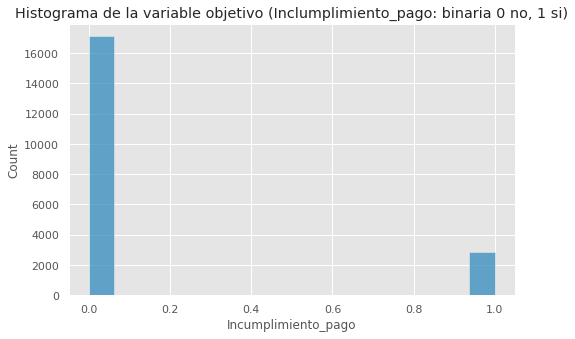

In [ ]:
#plotting the histogram of the numerical variables:
sns.histplot(df[num_vars[10]])
plt.title('Histograma de la variable objetivo (Inclumplimiento_pago: binaria 0 no, 1 si)')
plt.show()

Con el anterior histograma se comprueba que el **14.3165% de los clientes (aprox 2855 de 19942 clientes en total** está incumpliendo el pago (no ha pagado la primera factura)

Now that we have looked at the variables of interest in isolation, it makes sense to look at them in relation to `Inclumplimiento_pago`:

Text(0.5, 1.0, 'Boxplot of Incumplimiento_pago vs. antiguedad_meses')

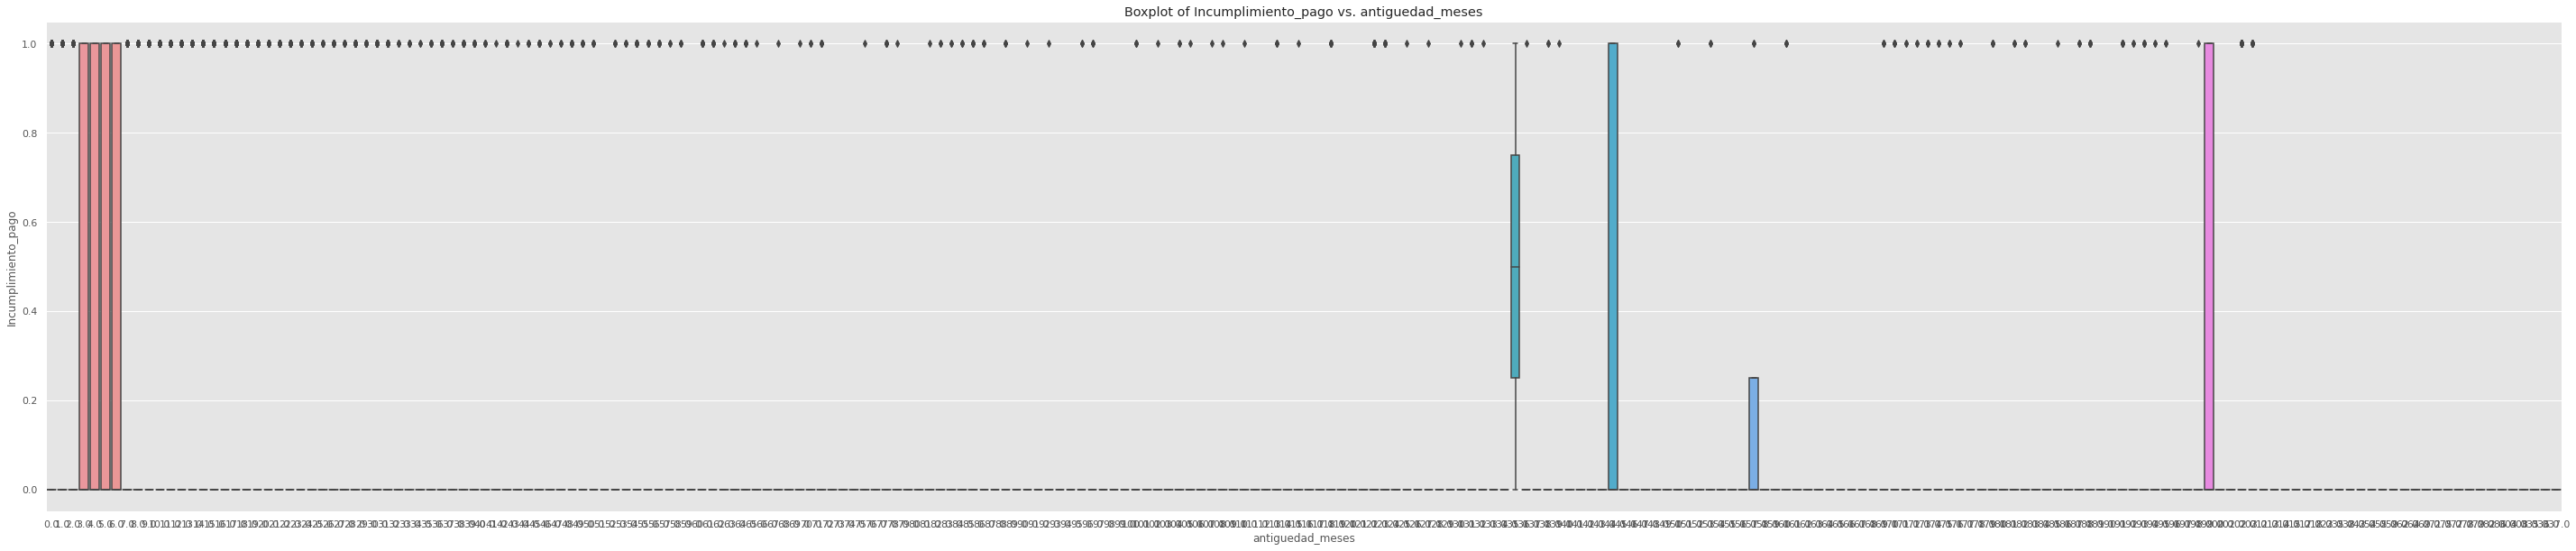

In [ ]:
#Inspecting Inclumplimiento_pago against another variable of interest (e.g antiguedad_meses):
plt.figure(figsize=(50, 10))
sns.boxplot(x = num_vars[0], y=num_vars[10], data = df)
title_string = "Boxplot of " + num_vars[10] + " vs. " + num_vars[0]
plt.ylabel(num_vars[10])
plt.title(title_string)

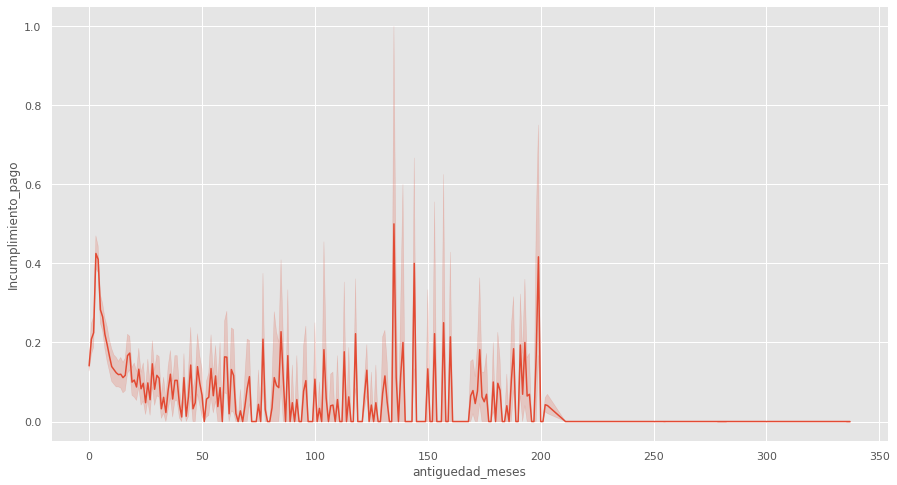

In [ ]:
# We can look out for trends using a line plot 
plt.figure(figsize=(15, 8))
ax = sns.lineplot(
    x=num_vars[0],
    y=num_vars[10],
    data=df,
)

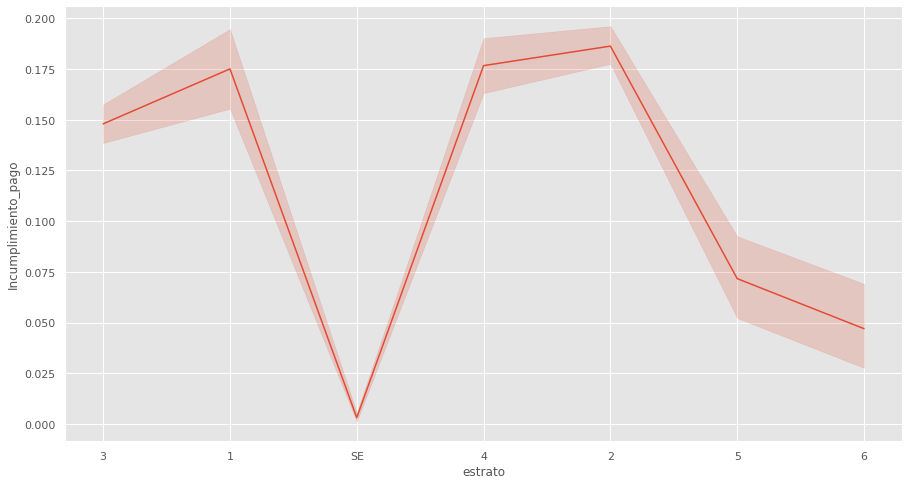

In [ ]:
plt.figure(figsize=(15, 8))
ax = sns.lineplot(
    x=cat_vars[6],
    y=num_vars[10],
    data=df,
)

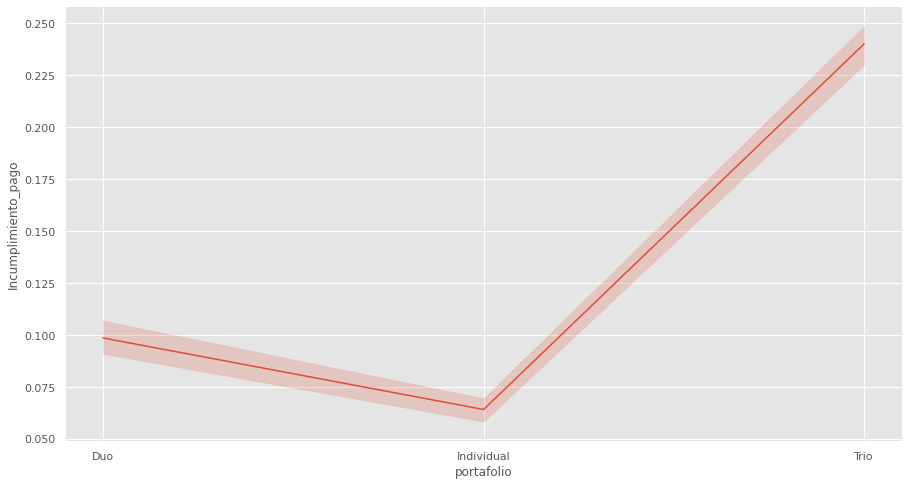

In [ ]:
plt.figure(figsize=(15, 8))
ax = sns.lineplot(
    x=cat_vars[8],
    y=num_vars[10],
    data=df,
)

## Pre-processing our data

Now that we have an idea of what our dataset consists of, let's transform it so that we can display phase. The types of activities we may engage in during **pre-processing** include:

1. **Deleting columns**
2. **Enriching (or Transforming)** a data set, adding newly calculated columns in the indices
3. **Filtering** a subset of the rows or columns of a dataset according to some criteria
4. **Indexing** a dataset
5. **Aggregating** data
6. **Sorting** the rows of a data set according to some criteria
7. **Merging** the data
8. **Pivoting** so that data that was originally laid out vertically is laid out horizontally (increasing the number of columns) or vice versa (increasing the number of rows)

among others.

## What is data transformation?

Many times in real life, you will be working with imperfect datasets with quality issues. **Data transformation** is the process of modifying a dataset in appropriate ways in order to eliminate these quality issues. Some of these activities include:

- Splitting columns
- Converting dates to `datetime` objects, which are far more easily manipulable using `pandas` libraries
- Encoding categorical variables
- Dealing with and replacing null or missing values
- Creating unique identifiers

The `pandas` library has many functions which can help with this task. In addition, you will also be using some other standard libraries like `String`, `base64`, and `sklearn`.

Los registros de las variables numericas como `antiguedad_meses` y `no_serv_tecnicos` que no tienen información deben ser reemplazados por NaN

**(The most prudent option which will not alter subsequent summary statistics calculations and not skew the distribution of the non-missing data would be to replace all missing values with a standard NaN)**

Sin embargo, los registros sin información de la variable categórica `fallo` pueden reemplazarse por SE ("Sin Especificar"), similarmente a como lo tiene ya establecido la variable categórica `estrato`

In [ ]:
df['antiguedad_meses'].fillna(np.nan, inplace=True)

In [ ]:
df['no_serv_tecnicos'].fillna(np.nan, inplace=True)

In [ ]:
df['fallo'].fillna('SE', inplace=True) #SE=Sin Especificar (similar a cuando no hay info de Estrato)

In [ ]:
df.isnull().sum()

REGIONAL                         0
DEPARTAMENTO                     0
TECNOL                           0
GERENCIA                         0
CANAL_HOMOLOGADO_MILLICON        0
tipo_fuerza_venta                0
estrato                          0
antiguedad_meses              1678
productos                        0
portafolio                       0
no_serv_tecnicos             13033
fallo                            0
asesoria_factura                 0
pedidos_peticiones               0
reagendamiento                   0
asesoria_servicios               0
retencion                        0
Otras                            0
quejas_fraude                    0
traslado                         0
Incumplimiento_pago              0
cliente_id                       0
dtype: int64

Una vez finalizado el tratamiento de valores faltantes y/o nulos, procedemos con los siguientes pasos del EDA:

Exploremos las **correlaciones** de las variables numericas con la variable objetivo (num_vars[10]=`Incumplimiento_pago`):

In [ ]:
# Create a correlation matrix
corr    = df[num_vars].corr()
pos_cor = corr[num_vars[10]] >0
neg_cor = corr[num_vars[10]] <0
corr[num_vars[10]][pos_cor].sort_values(ascending = False)
#This prints out the coefficients that are positively correlated with Incumplimiento_pago:

Incumplimiento_pago    1.000000
Otras                  0.011687
quejas_fraude          0.010103
Name: Incumplimiento_pago, dtype: float64

In [ ]:
corr[num_vars[10]][neg_cor].sort_values(ascending = False)
#This prints out the coefficients that are negatively correlated with Incumplimiento_pago:

pedidos_peticiones   -0.000021
traslado             -0.006498
reagendamiento       -0.008957
retencion            -0.012425
asesoria_servicios   -0.019946
asesoria_factura     -0.021996
antiguedad_meses     -0.150507
Name: Incumplimiento_pago, dtype: float64

De las resultados anteriores se concluye que:

- Hay **mas** incumplimiento de pago cuando los clientes llaman por otros motivos y hay quejas de fraude
- Existe **menos** incumplimiento de pago a medida que aumenta la antiguedad en meses

In [ ]:
df_orig['productos']

0           TV+BA
1           TV+BA
2              TV
3        TO+TV+BA
4        TO+TV+BA
           ...   
19937       TO+BA
19938       TO+BA
19939          BA
19940          TV
19941          TV
Name: productos, Length: 19942, dtype: object

In [ ]:
# subdividiendo la columna producto en tres para trabajar los servicios de forma diferenciada:
df[['productoTO','productoTV','productoBA']] =  df.productos.str.split('+',expand=True,)

In [ ]:
df[['productoTO','productoTV','productoBA']]

,productoTO,productoTV,productoBA
0,TV,BA,None
1,TV,BA,None
2,TV,None,None
3,TO,TV,BA
4,TO,TV,BA
...,...,...,...
19937,TO,BA,None
19938,TO,BA,None
19939,BA,None,None
19940,TV,None,None


Verificando intercambio de valores (como prueba):

In [ ]:
df['productoTO'][19939]

'BA'

In [ ]:
df.loc[19939,'productoTO']='valor'

In [ ]:
df['productoTO'][19939]

'valor'

In [ ]:
df.loc[19939,'productoTO']='BA'

In [ ]:
df['productoTO'][19939]

'BA'

Con lo anterior, se procede a hacer un proceso similar a una **codificación one-hot** de las tres variables categóricas (`productoTO`,`productoTV`,`productoBA`) que se extrajeron de la columna `productos`. Solo queda repartir el valor adecuado en la correspondiente columna (TO, TV, BA) y asignar para cada columna ya organizada, el valor de 1 en caso de que haya producto y 0 cuando no haya:

In [ ]:
#usando unas columnas auxiliares en primera instancia:
df['O']=''
df['V']=''
df['A']=''


In [ ]:
#organizando los productos así: TO, TV, BA (tipo one-hot-encoding)
cols=['productoTO','productoTV','productoBA']

for row in range(0, len(df)):
  for col in cols:
      if df[col][row]=='TO':
        df.loc[row,'O']=1    
      elif df[col][row]=='TV':
        df.loc[row,'V']=1
      elif df[col][row]=='BA':
        df.loc[row,'A']=1       


In [ ]:
df[['O','V','A']]

,O,V,A
0,,1,1
1,,1,1
2,,1,
3,1,1,1
4,1,1,1
...,...,...,...
19937,1,,1
19938,1,,1
19939,,,1
19940,,1,


In [ ]:
df[['productoTO','productoTV','productoBA']] = df[['O','V','A']]
df[['productoTO','productoTV','productoBA']]

,productoTO,productoTV,productoBA
0,,1,1
1,,1,1
2,,1,
3,1,1,1
4,1,1,1
...,...,...,...
19937,1,,1
19938,1,,1
19939,,,1
19940,,1,


In [ ]:
df['productoTO'][0]

''

In [ ]:
#ya tenemos los valores de 1, ahora falta poner 0 donde esté vacío (''):
cols=['productoTO','productoTV','productoBA']
for row in range(0, len(df)):
  for col in cols:
      if df[col][row]=='':
        df.loc[row,col]=0    
      

In [ ]:
df[['productoTO','productoTV','productoBA']] #esta es la versión final tipo one-hot-encoding

,productoTO,productoTV,productoBA
0,0,1,1
1,0,1,1
2,0,1,0
3,1,1,1
4,1,1,1
...,...,...,...
19937,1,0,1
19938,1,0,1
19939,0,0,1
19940,0,1,0


In [ ]:
df.head(1)

,REGIONAL,DEPARTAMENTO,TECNOL,GERENCIA,CANAL_HOMOLOGADO_MILLICON,tipo_fuerza_venta,estrato,antiguedad_meses,productos,portafolio,no_serv_tecnicos,fallo,asesoria_factura,pedidos_peticiones,reagendamiento,asesoria_servicios,retencion,Otras,quejas_fraude,traslado,Incumplimiento_pago,cliente_id,productoTO,productoTV,productoBA,O,V,A
0,COSTA,MAGDALENA,HFC,CONTACT,SAC,INDIRECTA,3,19.0,TV+BA,Duo,1.0,No funciona línea telefónica,0,0,0,0,0,0,0,0,0,1004369760,0,1,1,,1,1


In [ ]:
df.columns

Index(['REGIONAL', 'DEPARTAMENTO', 'TECNOL', 'GERENCIA',
       'CANAL_HOMOLOGADO_MILLICON', 'tipo_fuerza_venta', 'estrato',
       'antiguedad_meses', 'productos', 'portafolio', 'no_serv_tecnicos',
       'fallo', 'asesoria_factura', 'pedidos_peticiones', 'reagendamiento',
       'asesoria_servicios', 'retencion', 'Otras', 'quejas_fraude', 'traslado',
       'Incumplimiento_pago', 'cliente_id', 'productoTO', 'productoTV',
       'productoBA', 'O', 'V', 'A'],
      dtype='object')

In [ ]:
new_cols=['REGIONAL', 'DEPARTAMENTO', 'TECNOL', 'GERENCIA',
       'CANAL_HOMOLOGADO_MILLICON', 'tipo_fuerza_venta', 'estrato',
       'antiguedad_meses', 'productos', 'portafolio', 'no_serv_tecnicos',
       'fallo', 'asesoria_factura', 'pedidos_peticiones', 'reagendamiento',
       'asesoria_servicios', 'retencion', 'Otras', 'quejas_fraude', 'traslado',
       'Incumplimiento_pago', 'cliente_id', 'productoTO', 'productoTV',
       'productoBA']

In [ ]:
df=df[new_cols].copy() #finalmente nos quedamos con las columnas necesarias para el posterior análisis sin tener en cuenta las auxiliares (repetidas)
df.head(1)

,REGIONAL,DEPARTAMENTO,TECNOL,GERENCIA,CANAL_HOMOLOGADO_MILLICON,tipo_fuerza_venta,estrato,antiguedad_meses,productos,portafolio,no_serv_tecnicos,fallo,asesoria_factura,pedidos_peticiones,reagendamiento,asesoria_servicios,retencion,Otras,quejas_fraude,traslado,Incumplimiento_pago,cliente_id,productoTO,productoTV,productoBA
0,COSTA,MAGDALENA,HFC,CONTACT,SAC,INDIRECTA,3,19.0,TV+BA,Duo,1.0,No funciona línea telefónica,0,0,0,0,0,0,0,0,0,1004369760,0,1,1


In [ ]:
print(num_vars)

['antiguedad_meses', 'no_serv_tecnicos', 'asesoria_factura', 'pedidos_peticiones', 'reagendamiento', 'asesoria_servicios', 'retencion', 'Otras', 'quejas_fraude', 'traslado', 'Incumplimiento_pago']


In [ ]:
print(cat_vars)

['REGIONAL', 'DEPARTAMENTO', 'TECNOL', 'GERENCIA', 'CANAL_HOMOLOGADO_MILLICON', 'tipo_fuerza_venta', 'estrato', 'productos', 'portafolio', 'fallo']


In [ ]:
#redefiniendo las nuevas vars categoricas (no considerar productos como un todo sino las tres tipo one-hot encoding)
new_cat_vars=['REGIONAL', 'DEPARTAMENTO', 'TECNOL', 'GERENCIA', 'CANAL_HOMOLOGADO_MILLICON', 'tipo_fuerza_venta', 'estrato', 'portafolio', 'fallo', 'productoTO',	'productoTV',	'productoBA']
print(new_cat_vars)

['REGIONAL', 'DEPARTAMENTO', 'TECNOL', 'GERENCIA', 'CANAL_HOMOLOGADO_MILLICON', 'tipo_fuerza_venta', 'estrato', 'portafolio', 'fallo', 'productoTO', 'productoTV', 'productoBA']


# Observación:

Para mi caso personal, por motivos de tiempo limitado y dado que el tratamiento de la información se está haciendo con las herramientas proporcionadas por Python (pandas, numpy, etc.) en este cuaderno de Jupyter y usando los recursos de Google Collab, no es necesario que la base de datos quede por ejemplo con todas sus variables y valores en minúsculas, sin tildes, sin caracterés especiales, etc, ya que no se va a usar SQL (tampoco se está trabajando en este caso con procesamiento de texto - si dispongo de tiempo, aunque lo dudo, trabajaré en NLP con Tweets de Teleperformance). Sin embargo,  es deseable e importante que la base de datos quede de forma apropiada para poner los modelos de ML en producción con el fin de que consuma info de la base de datos y finalmente se muestren los resultados en un Front End específico como Dash o  PowerBI, entre otros.

2. **Construya un modelo estadístico que calcule la probabilidad de que un cliente no pague la primera factura. Explique por qué escogió las variables con las que va a trabajar y si debió hacer modificaciones de estas.**

Teniendo en cuenta los resultados del análisis anterior (punto 1), procederé a construir el modelo estadístico que será **Regresión Logística**.

Para referencia, en estos dos trabajos hay información interesante y pernitente para este caso:

[1]https://bibdigital.epn.edu.ec/bitstream/15000/9194/3/CD-6105.pdf

[2]https://repository.eafit.edu.co/bitstream/handle/10784/12870/Adriana_SalamancaArias_JohnAlejandro_BenitezUrrea_2018.pdf?sequence=2

Según [2], *"los modelos logísticos son apropiados para medir la probabilidad de incumplimiento que enfrentan las empresas del sector real, al tener en cuenta su versatilidad para determinar rangos múltiples de la variable dependiente de manera ordenada, porque trabaja con distribución probabilística que permite que con poca información se puedan obtener resultados interesantes con respecto a la probabilidad de incumplimiento"*



In [ ]:
df.index

RangeIndex(start=0, stop=19942, step=1)

In [ ]:
100*(13033/19942)


65.35452813158159

In [ ]:
#para facilitar el análisis, no consideraré la columna no_serv_tecnicos debido a la poca información que tiene (solo el 35% puesto que el 65% son NULL) reemplazando los NaN por su valor promedio en 'antiguedad_meses'
df['antiguedad_meses'].fillna(df['antiguedad_meses'].mean(), inplace=True)
df['no_serv_tecnicos'].fillna(df['no_serv_tecnicos'].mean(), inplace=True) #lo hago solo por llenarla de la misma manera pero esa columna no se considerará
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19942 entries, 0 to 19941
Data columns (total 25 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   REGIONAL                   19942 non-null  object 
 1   DEPARTAMENTO               19942 non-null  object 
 2   TECNOL                     19942 non-null  object 
 3   GERENCIA                   19942 non-null  object 
 4   CANAL_HOMOLOGADO_MILLICON  19942 non-null  object 
 5   tipo_fuerza_venta          19942 non-null  object 
 6   estrato                    19942 non-null  object 
 7   antiguedad_meses           19942 non-null  float64
 8   productos                  19942 non-null  object 
 9   portafolio                 19942 non-null  object 
 10  no_serv_tecnicos           19942 non-null  float64
 11  fallo                      19942 non-null  object 
 12  asesoria_factura           19942 non-null  int64  
 13  pedidos_peticiones         19942 non-null  int

In [ ]:
df['estrato'].head(20)

0      3
1      3
2      1
3      3
4      3
5      3
6     SE
7     SE
8      3
9     SE
10    SE
11    SE
12    SE
13    SE
14    SE
15     4
16     4
17     4
18     2
19    SE
Name: estrato, dtype: object

In [ ]:
#similarmente en 'estrato' cambio 'SE' por 0 (para luego hacerlo por la parte entera de su valor promedio):
for i in df.index:
  if df['estrato'][i]=='SE':
      df['estrato'][i]=0

In [ ]:
df['estrato'].head(20)

0     3
1     3
2     1
3     3
4     3
5     3
6     0
7     0
8     3
9     0
10    0
11    0
12    0
13    0
14    0
15    4
16    4
17    4
18    2
19    0
Name: estrato, dtype: object

In [ ]:
df['estrato']=pd.to_numeric(df['estrato'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19942 entries, 0 to 19941
Data columns (total 25 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   REGIONAL                   19942 non-null  object 
 1   DEPARTAMENTO               19942 non-null  object 
 2   TECNOL                     19942 non-null  object 
 3   GERENCIA                   19942 non-null  object 
 4   CANAL_HOMOLOGADO_MILLICON  19942 non-null  object 
 5   tipo_fuerza_venta          19942 non-null  object 
 6   estrato                    19942 non-null  int64  
 7   antiguedad_meses           19942 non-null  float64
 8   productos                  19942 non-null  object 
 9   portafolio                 19942 non-null  object 
 10  no_serv_tecnicos           19942 non-null  float64
 11  fallo                      19942 non-null  object 
 12  asesoria_factura           19942 non-null  int64  
 13  pedidos_peticiones         19942 non-null  int

In [ ]:
int(df['estrato'].mean())

2

In [ ]:
#similarmente en 'estrato' cambio 'SE' por la parte entera de su valor promedio:
for i in df.index:
  if df['estrato'][i]==0:
      df['estrato'][i]=int(df['estrato'].mean())

df['estrato'].head(20)

0     3
1     3
2     1
3     3
4     3
5     3
6     2
7     2
8     3
9     2
10    2
11    2
12    2
13    2
14    2
15    4
16    4
17    4
18    2
19    2
Name: estrato, dtype: int64

Text(0.5, 1.0, 'Incumplimiento_pago')

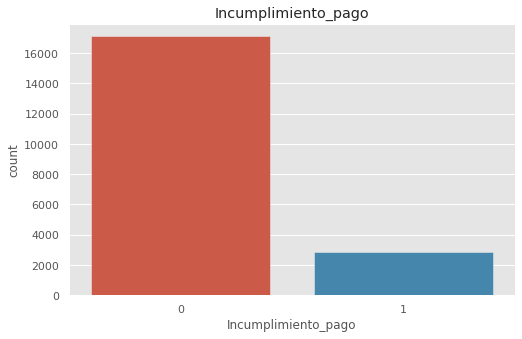

In [ ]:
#recordemos el conteo de la var objetivo:
sns.countplot(x='Incumplimiento_pago', data = df)
plt.title("Incumplimiento_pago")

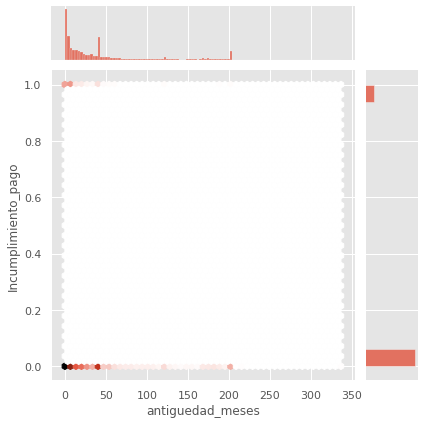

In [ ]:
#Relación: Incumplimiento_pago (Y) vs antiguedad_meses(X)
sns.jointplot(df.antiguedad_meses, df.Incumplimiento_pago, kind="hex")

In [ ]:
print(num_vars)

['antiguedad_meses', 'no_serv_tecnicos', 'asesoria_factura', 'pedidos_peticiones', 'reagendamiento', 'asesoria_servicios', 'retencion', 'Otras', 'quejas_fraude', 'traslado', 'Incumplimiento_pago']


In [ ]:
#Y='Incumplimiento_pago' (var DEPENDIENTE)

#redefiniendo las var INDEPENDIENTES verdaderamente numericas (porque las binarias serían categóricas) y que serán insumo para el modelo:
num_vars_def=['antiguedad_meses', 'estrato'] #SOLO QUEDAN 2

In [ ]:
print(new_cat_vars)

['REGIONAL', 'DEPARTAMENTO', 'TECNOL', 'GERENCIA', 'CANAL_HOMOLOGADO_MILLICON', 'tipo_fuerza_venta', 'estrato', 'portafolio', 'fallo', 'productoTO', 'productoTV', 'productoBA']


NOTA: 

Por simplicidad, las siguientes var cat no se consideran relevantes para el modelo: 
'REGIONAL', 'DEPARTAMENTO', 'TECNOL', 'GERENCIA', 'CANAL_HOMOLOGADO_MILLICON', 'tipo_fuerza_venta', 'portafolio' (está correlacionada con 'productos' que tampoco se considera pues se separó en tres var cat binarias que si se van a considerar en su reemplazo)

In [ ]:
#en consecuencia, redefiniendo las var verdaderamente categóricas y que serán insumo para el modelo:
cat_vars_def=['productoTO', 'productoTV', 'productoBA', 'asesoria_factura', 'pedidos_peticiones', 'reagendamiento', 'asesoria_servicios', 'retencion', 'Otras', 'quejas_fraude', 'traslado']#QUEDAN 11

Veamos la matriz de correlación entre las var numericas definitivas (covariables) y la variable objetivo:



In [ ]:
num_vars_def=['antiguedad_meses', 'estrato']

In [ ]:
cols=num_vars_def.copy()
cols.append('Incumplimiento_pago')
print(cols)

['antiguedad_meses', 'estrato', 'Incumplimiento_pago']


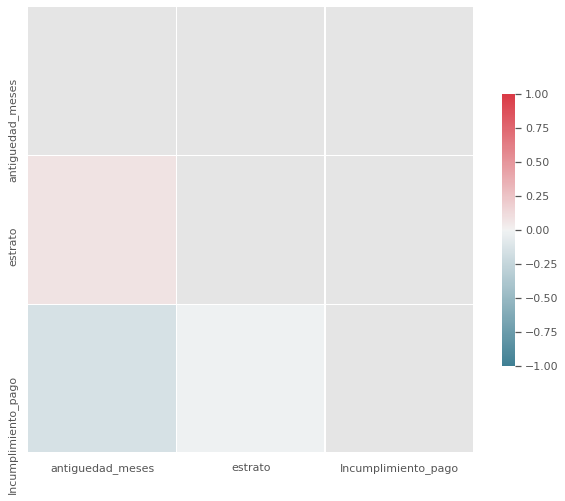

In [ ]:
#Visualize the correlation matrix across all numerical features by using the sns.heatmap() command:

#compute correlation matrix

Data=df[cols].copy()

df_correlations = Data.corr()

#mask the upper half for visualization purposes
mask = np.zeros_like(df_correlations, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Draw the heatmap with the mask and correct aspect ratio
plt.figure(figsize= (10,10))

cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(df_correlations,mask=mask,  vmax=1, vmin=-1, cmap=cmap, 
            center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5});

**Construyendo el modelo predictivo:**

...iniciando con un modelo de regresión logística estándard...

Using the `LogisticRegression()` function from `scikit-learn`, let me write a function named `fit_logistic_regression(X,y)` that fits a logistic regression on the array of covariates `X` and associated response variable `y`.




In [ ]:
from sklearn.linear_model import LogisticRegression
def fit_logistic_regression(X,y):
    """
    fit a logistic regression with feature matrix X and binary output y
    """
    clf = LogisticRegression(solver='lbfgs', tol=10**-4,  
                             fit_intercept=True, 
                             multi_class='multinomial').fit(X,y)
    return clf

Let me create a basic [logistic regression model](https://towardsdatascience.com/logistic-regression-detailed-overview-46c4da4303bc) for predicting `Incumplimiento_pago` with only one feature: `antiguedad_meses`.  I will call this model `model1`, using a 70/30 train-test split of the data (here a copy of df is in Data).

In [ ]:
# we will use a 70%/30% split for training/validation
Data=df.copy()
n_total = len(Data)
n_train = int(0.7*n_total)

X, y = Data[["antiguedad_meses"]], Data.Incumplimiento_pago
X_train, y_train = X[:n_train], y[:n_train]
X_test, y_test = X[n_train:], y[n_train:]

In [ ]:
model1 = fit_logistic_regression(X_train, y_train)  # fit a logistic regression
y_test_pred = model1.predict_proba(X_test)[:,1]     # make probabilistic predictions on test set

In [ ]:
model1

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='multinomial', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
y_test_pred

array([0.16972465, 0.18281237, 0.18281237, ..., 0.0879433 , 0.14088009,
       0.0298524 ])

Plotting the [ROC curve](https://towardsdatascience.com/understanding-auc-roc-curve-68b2303cc9c5) of `model1` and finding the area under the curve:

In [ ]:
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import StratifiedKFold

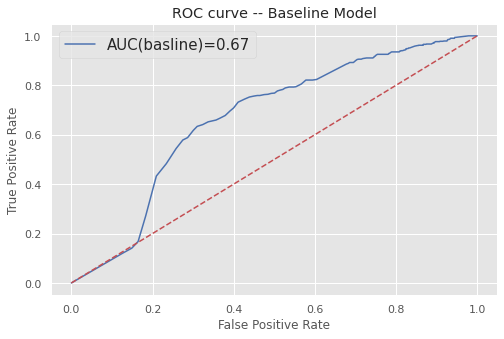

In [ ]:
fpr, tpr, _ = roc_curve(y_test, y_test_pred)  #compute FPR/TPR
auc_baseline = auc(fpr, tpr) # compute AUC

plt.plot(fpr, tpr, "b-", label="AUC(basline)={:2.2f}".format(auc_baseline))
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(fontsize=15)
plt.plot([0,1], [0,1], "r--")
plt.title("ROC curve -- Baseline Model");

Of course this should not be the final model. This is because I have not explored the contribution from other variables, which in addition to containing valuable information could also be confounding the perceived effect of `antiguedad_meses` on the response variable `Incumplimiento_pago`. This under-exploitation of information is called [**underfitting**](https://towardsdatascience.com/what-are-overfitting-and-underfitting-in-machine-learning-a96b30864690). 

On the other hand:

Let's instead put all the variables available in the model, so that we are maximally leveraging our available info. This is also a bad idea. If we *blindly* use all of the variables in our model fitting, a phenomenon called [**overfitting**](https://towardsdatascience.com/what-are-overfitting-and-underfitting-in-machine-learning-a96b30864690) occurs. This is when a statistical model "fits" too closely to a particular set of data, which may well be noisy and exhibit randomness and therefore fail to predict future, different observations reliably.

In most cases, you will be working with datasets with many features that each have their own distribution. Generally, a large amount of time is spent on feature selection with many models being trained during this time. It is extremely rare that you simply plug all the features in and tune it once to get the optimal model. 
    
There are many different techniques associated with feature selection and a comprehensive look into all of them is outside the scope of this case. For simplicity, I will demonstrate model training and testing on single-feature models and then directly move into multi-feature models to show the numerous possible cases you may encounter. 

In reality, I would apply cross-validation on numerous subsets of features based on domain knowledge of the dataset to see which set of features truly optimizes the model I am trying to create.

[**Cross-validation**](https://towardsdatascience.com/why-and-how-to-cross-validate-a-model-d6424b45261f) is a set of techniques for assessing how well the results of a model will generalize to an out-of-sample dataset; i.e. in practice or production. It is chiefly used to flag overfitting.

Text(0.5, 1.0, 'CROSS VALIDATION FOLDS')

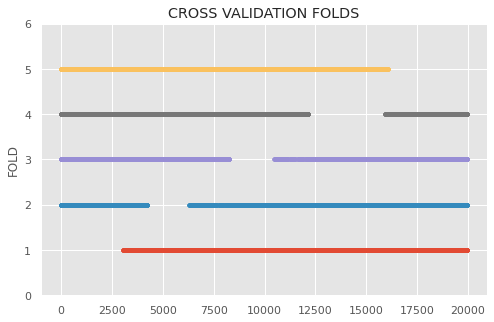

In [ ]:
skf = StratifiedKFold(n_splits=5)
for k, (train_index, test_index) in enumerate( skf.split(X, y) ):
    plt.plot(train_index, [k+1 for _ in train_index], ".")
plt.ylim(0,6)
plt.ylabel("FOLD")
plt.title("CROSS VALIDATION FOLDS")

The following code defines a function `compute_AUC(X, y, train_index, test_index)` that computes the AUC of a model trained on "train_index" and tested in "test_index".

In [ ]:
def compute_AUC(X, y, train_index, test_index):
    """
    feature/output: X, y
    dataset split: train_index, test_index
    """
    X_train, y_train = X.iloc[train_index], y.iloc[train_index]
    X_test, y_test = X.iloc[test_index], y.iloc[test_index]

    clf = fit_logistic_regression(X_train, y_train)
    default_proba_test = clf.predict_proba(X_test)[:,1]  
    fpr, tpr, _ = roc_curve(y_test, default_proba_test)
    auc_score = auc(fpr, tpr)
    return auc_score, fpr, tpr

With the help of the `compute_AUC` function defined above, let me write a function `cross_validation_AUC(X,y,nfold)` that carries out a 10-fold cross-validation and returns a list which contains the area under the curve for each fold of the cross-validation:

In [ ]:
def cross_validation_AUC(X,y, nfold=10):
    """
    use a n-fold cross-validation for computing AUC estimates
    """
    skf = StratifiedKFold(n_splits=nfold)  #create a cross-validation splitting
    auc_list = [] #this list will contain the AUC estimates associated with each fold
    for k, (train_index, test_index) in enumerate( skf.split(X, y) ):
        auc_score, _, _ = compute_AUC(X, y, train_index, test_index)
        auc_list.append(auc_score)
    return auc_list

I will now estimate and compare, through cross-validation analysis, the performance of all the "simple models" that only use one numerical features as input. 

In [ ]:
print(num_vars_def)

['antiguedad_meses', 'estrato']


Let's compute cross-validation estimates of the AUC for each single-feature model:

In [ ]:
model_perf = pd.DataFrame({}) #this data-frame will contain the AUC estimates
for key in num_vars_def:
    X_full, y_full = Data[[key]], Data.Incumplimiento_pago
    auc_list = cross_validation_AUC(X_full, y_full, nfold=10)
    model_perf["SIMPLE:" + key] = auc_list

Let me construct a [boxplot](https://towardsdatascience.com/understanding-boxplots-5e2df7bcbd51) which shows the distribution of cross-validation scores of each variable (remember, each variable has 10 total scores): 

In [ ]:
def plot_boxplot_ordered(df_model):
    """
    display a list of boxplot, ordered by the media values
    """
    df = df_model[df_model.median().sort_values().index]
    sns.boxplot(x="variable", y="value", data=pd.melt(df), showfliers=False)
    plt.xticks(rotation=90)

Text(0, 0.5, 'AUC')

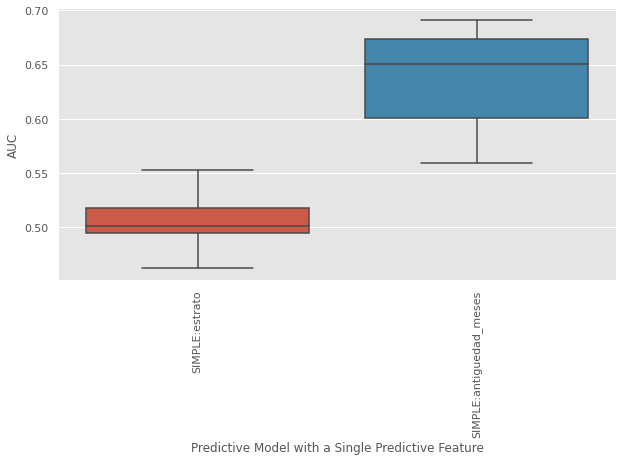

In [ ]:
plt.figure(figsize= (10,5))
plot_boxplot_ordered(model_perf)
plt.xlabel("Predictive Model with a Single Predictive Feature")
plt.ylabel("AUC")

According to what have been done so far, from the above picture I can conclude:

- The feature that has the highest predictive power is `antiguedad_meses`
- The feature that has the lowest predictive power is `estrato`

Let me consider the model that consists of using *all* the numerical features (and none of the categorical features). Carrying out a 10-fold cross-validation analysis to determine whether this model has better predictive performance than the best single-feature model. Using the boxplot method again as I did before: 

In [ ]:
X_full, y_full = Data[num_vars_def], Data.Incumplimiento_pago
auc_list = cross_validation_AUC(X_full, y_full)
model_perf["ALL_NUMERICAL"] = auc_list
model_perf

,SIMPLE:antiguedad_meses,SIMPLE:estrato,ALL_NUMERICAL
0,0.625454,0.429581,0.612515
1,0.592383,0.462943,0.580514
2,0.559453,0.495811,0.547094
3,0.674187,0.497961,0.669534
4,0.690632,0.521252,0.694829
5,0.581867,0.494196,0.575197
6,0.659101,0.552888,0.650529
7,0.671121,0.533505,0.672244
8,0.680397,0.504706,0.677434
9,0.642052,0.509290,0.644907


Text(0, 0.5, 'AUC')

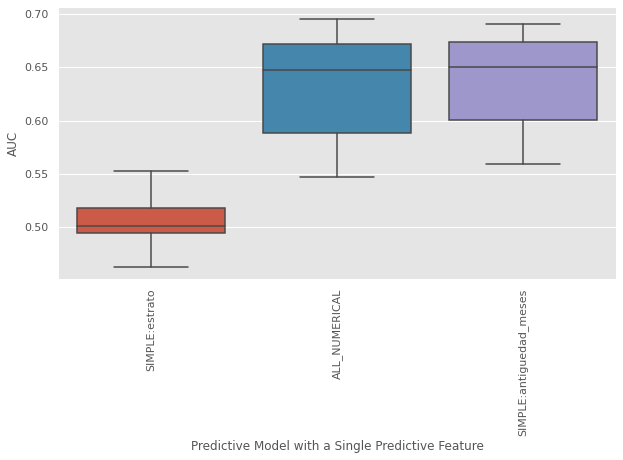

In [ ]:
plt.figure(figsize= (10,5))
plot_boxplot_ordered(model_perf)
plt.xlabel("Predictive Model with a Single Predictive Feature")
plt.ylabel("AUC")

I see that the combined model does perform better than the best single-feature model. Thus, I will move forward with it for the rest of this case. Note, however, that best practice would entail iteratively adding features to the best single-feature model until I reach a point where there is no significant improvement, as opposed to throwing all the features in at once. Let me advise and consider to take this more cautious approach when building models (it is a matter of time)

## Incorporating categorical variables:

In [ ]:
cat_vars_def # se podría decir que estas vars ya están codificadas tipo one-hot para irse añadiendo al modelo numérico anterior

['productoTO',
 'productoTV',
 'productoBA',
 'asesoria_factura',
 'pedidos_peticiones',
 'reagendamiento',
 'asesoria_servicios',
 'retencion',
 'Otras',
 'quejas_fraude',
 'traslado']

(array([0, 1]), <a list of 2 Text major ticklabel objects>)

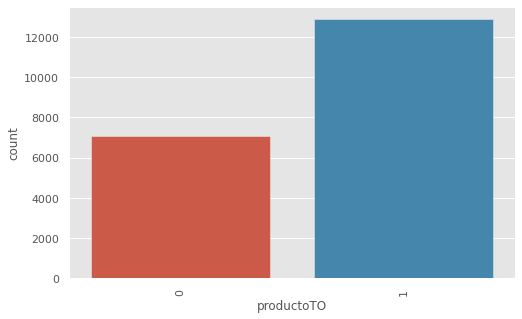

In [ ]:
Data.value_counts()
sns.countplot(x='productoTO', data = Data) 
plt.xticks(rotation=90)

Let me investigate whether the categorical variable `productoTO` brings any predictive value when added to the current best model (remember again that the  encoding scheme of one-hot type is already there:

Text(0.5, 1.0, 'Incumplimiento_pago por productoTO')

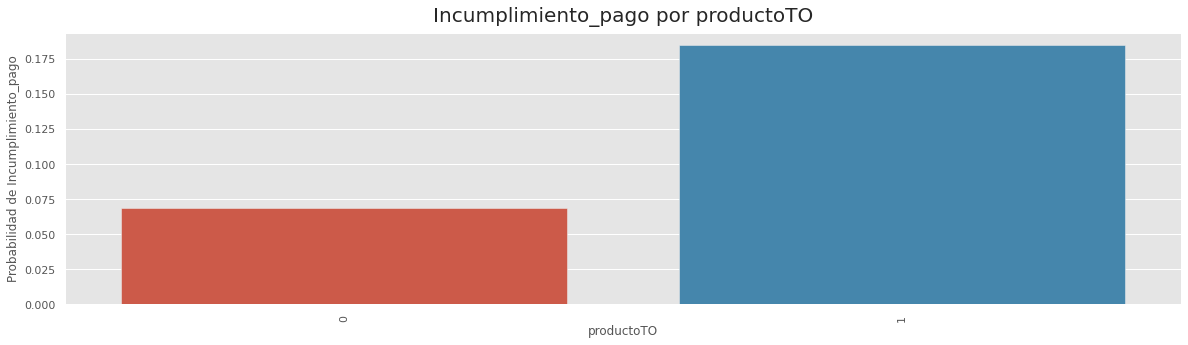

In [ ]:
plt.figure(figsize= (20,5))

df_TO_incump = Data[["Incumplimiento_pago", "productoTO"]].groupby("productoTO").mean()
df_TO_incump = df_TO_incump.sort_values(by="Incumplimiento_pago",axis=0, ascending=False)
sns.barplot(x=df_TO_incump.index[:50], 
            y=df_TO_incump["Incumplimiento_pago"][:50].values,
            orient="v")
plt.xticks(rotation=90)

plt.ylabel("Probabilidad de Incumplimiento_pago")
plt.title("Incumplimiento_pago por productoTO", fontsize=20, verticalalignment='bottom')

In [ ]:
print(num_vars_def)

['antiguedad_meses', 'estrato']


In [ ]:
new_cols=['antiguedad_meses', 'estrato','productoTO','productoTV','productoBA']

X_full_productos, y_full = Data[new_cols], Data.Incumplimiento_pago
auc_list = cross_validation_AUC(X_full_productos, y_full)
model_perf["ALL_NUMERICAL_WITH_productos"] = auc_list
model_perf

,SIMPLE:antiguedad_meses,SIMPLE:estrato,ALL_NUMERICAL,ALL_NUMERICAL_WITH_productos
0,0.625454,0.429581,0.612515,0.694596
1,0.592383,0.462943,0.580514,0.627559
2,0.559453,0.495811,0.547094,0.586621
3,0.674187,0.497961,0.669534,0.706739
4,0.690632,0.521252,0.694829,0.727235
5,0.581867,0.494196,0.575197,0.706304
6,0.659101,0.552888,0.650529,0.745759
7,0.671121,0.533505,0.672244,0.728401
8,0.680397,0.504706,0.677434,0.778226
9,0.642052,0.509290,0.644907,0.724640


Text(0, 0.5, 'AUC')

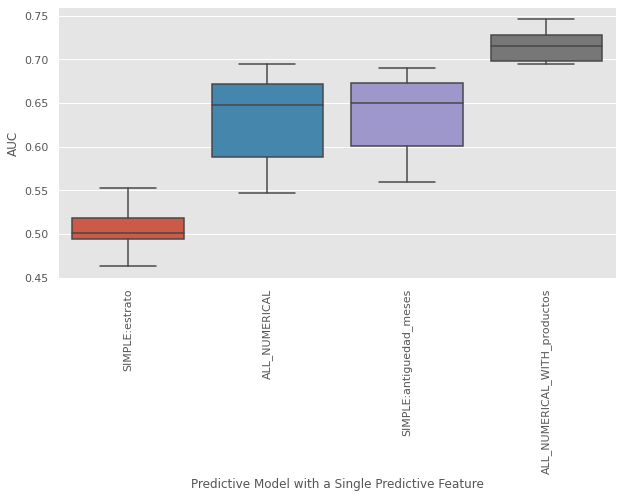

In [ ]:
plt.figure(figsize= (10,5))
plot_boxplot_ordered(model_perf)
plt.xlabel("Predictive Model with a Single Predictive Feature")
plt.ylabel("AUC")

The difference appears significant as the boxplot for the updated model is almost completely non-overlapping with that of the previous model.

#To finish:

Let me use the rest of the "cat_vars" (they are indeed numerical: binary):

In [ ]:
print(cat_vars_def)

['productoTO', 'productoTV', 'productoBA', 'asesoria_factura', 'pedidos_peticiones', 'reagendamiento', 'asesoria_servicios', 'retencion', 'Otras', 'quejas_fraude', 'traslado']


In [ ]:
pqrs=['asesoria_factura', 'pedidos_peticiones', 'reagendamiento', 'asesoria_servicios', 'retencion', 'Otras', 'quejas_fraude', 'traslado']

In [ ]:
new_cols_def=['antiguedad_meses', 'estrato','productoTO','productoTV','productoBA', 'asesoria_factura', 'pedidos_peticiones', 'reagendamiento', 'asesoria_servicios', 'retencion', 'Otras', 'quejas_fraude', 'traslado']

X_full_productos_pqrs, y_full = Data[new_cols_def], Data.Incumplimiento_pago
auc_list = cross_validation_AUC(X_full_productos_pqrs, y_full)
model_perf["ALL_NUMERICAL_WITH_productos_pqrs"] = auc_list
model_perf

,SIMPLE:antiguedad_meses,SIMPLE:estrato,ALL_NUMERICAL,ALL_NUMERICAL_WITH_productos,ALL_NUMERICAL_WITH_productos_pqrs
0,0.625454,0.429581,0.612515,0.694596,0.695811
1,0.592383,0.462943,0.580514,0.627559,0.623818
2,0.559453,0.495811,0.547094,0.586621,0.588827
3,0.674187,0.497961,0.669534,0.706739,0.705542
4,0.690632,0.521252,0.694829,0.727235,0.722409
5,0.581867,0.494196,0.575197,0.706304,0.706201
6,0.659101,0.552888,0.650529,0.745759,0.745326
7,0.671121,0.533505,0.672244,0.728401,0.724195
8,0.680397,0.504706,0.677434,0.778226,0.779492
9,0.642052,0.509290,0.644907,0.724640,0.730557


Text(0, 0.5, 'AUC')

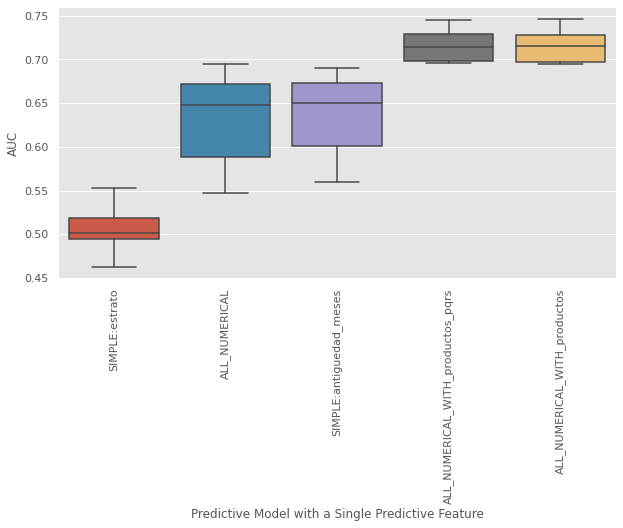

In [ ]:
plt.figure(figsize= (10,5))
plot_boxplot_ordered(model_perf)
plt.xlabel("Predictive Model with a Single Predictive Feature")
plt.ylabel("AUC")

## Conclusions 

Once I started building models, I started with very simple logistic regressions approaches – these baseline models were useful for quickly evaluating the predictive power of each individual variable. Next, I employed cross-validation approaches for building more complex models, often exploiting the interactions between the different features. Since the dataset contains a large number of covariates, using cross-validation was revealed to be crucial for avoiding overfitting, choosing the correct number of features and ultimately choosing an appropriate model that balanced complexity with accuracy.

Cross-validation is a robust and flexible technique for evaluating the predictive performance of statistical models. It is especially useful in big data settings where the number of features is large compared to the number of observations. When used appropriately, cross-validation is a powerful method for choosing a model with the correct complexity and best predictive performance. Remember that logistic regression is only one of many classification algorithms and the principles behind cross-validation are not limited to this case alone. 

*Quiero finalmente comentar que 2 días para mi no son suficientes para terminar completa y exitosamente este caso. Con mas tiempo, seguro lo terminaría, aunque voy a seguir trabajando en el caso apesar de que el tiempo para entregarlo ya se terminó. Muchas gracias por la oprtunidad y también deseo seguir trabajando en el caso opcional donde tenía pensado trabajar con NLP (Tweets-TP)*

**Observación:**

Todo lo trabajado aquí está referenciado al *programa de Ciencia de Datos (DS4A-Colombia 3.0) ofertado por el Ministerio TIC de Colombia en convenio con la Compañía Correlation One.*



============================================================================

# RETOMANDO EL CASO 

**(A partir del 27 de Febrero de 2021, con el fin de llegar mejor preparado y con más información para la entrevista de la parte final del proceso de selección, para el cargo de Científico de Datos en Teleperformance**)

============================================================================


NOTA: estoy trabajando el Dataframe como Data (fue copiado desde el punto 2 del dataframe temporal df que había sido usado en el punto 1).

# Análsis Descriptivo:

Inicialmente para el caso **UNIVARIADO**, se tiene:

In [ ]:
#Visualizando todas las columnas de la BD (mas las 3 col add que se obtuvo de 'productos':'productoTO', 'productoTV','productoBA')
Data.keys()

Index(['REGIONAL', 'DEPARTAMENTO', 'TECNOL', 'GERENCIA',
       'CANAL_HOMOLOGADO_MILLICON', 'tipo_fuerza_venta', 'estrato',
       'antiguedad_meses', 'productos', 'portafolio', 'no_serv_tecnicos',
       'fallo', 'asesoria_factura', 'pedidos_peticiones', 'reagendamiento',
       'asesoria_servicios', 'retencion', 'Otras', 'quejas_fraude', 'traslado',
       'Incumplimiento_pago', 'cliente_id', 'productoTO', 'productoTV',
       'productoBA'],
      dtype='object')

In [ ]:
#Viendo la descripción completa de las variables de la base de datos (BD):
df_var.style.set_properties(subset=['DESCRIPCIÓN'], **{'width': '1000px'})

,VARIABLE,DESCRIPCIÓN
0,REGIONAL,regional de instalación del servicio
1,DEPARTAMENTO,Departamento de instalación del servicio
2,TECNOL,Tipo de tecnología del servicio
3,GERENCIA,Gerencia de venta del servicio
4,CANAL_HOMOLOGADO_MILLICON,Canal de venta del servicio
5,tipo_fuerza_venta,Tipo de fuerza o equipo que realizó la venta
6,estrato,Estrato donde fue instalado el servicio
7,antiguedad_meses,Antigüedad del cliente al momento de solicitar el servicio
8,productos,"Productos solicitados TV= televisión, TO=Telefonía, BA = Internet"
9,portafolio,cantidad de productos adquiridos


**Veamos otras relaciones entre las covariables de interés:**

In [ ]:
#Generando una "nueva" var (conservo la original):
#'portafolio_num' es una var num expresada como la suma de las vars:
#productos=['productoTO', 'productoTV','productoBA']
#'portafolio_num' se puede ver como una var num acumulada, que indica el numero de productos que tiene un cliente (equivale a la var cat 'protafolio')
Data['portafolio_num']=Data['productoTO']+Data['productoTV']+Data['productoBA']
Data.head()

,REGIONAL,DEPARTAMENTO,TECNOL,GERENCIA,CANAL_HOMOLOGADO_MILLICON,tipo_fuerza_venta,estrato,antiguedad_meses,productos,portafolio,no_serv_tecnicos,fallo,asesoria_factura,pedidos_peticiones,reagendamiento,asesoria_servicios,retencion,Otras,quejas_fraude,traslado,Incumplimiento_pago,cliente_id,productoTO,productoTV,productoBA,portafolio_num
0,COSTA,MAGDALENA,HFC,CONTACT,SAC,INDIRECTA,3,19.0,TV+BA,Duo,1.0,No funciona línea telefónica,0,0,0,0,0,0,0,0,0,1004369760,0,1,1,2
1,COSTA,MAGDALENA,HFC,CONTACT,SAC,INDIRECTA,3,19.0,TV+BA,Duo,1.0,No funciona línea telefónica,0,0,0,0,0,0,0,0,0,1004369760,0,1,1,2
2,NOROCCIDENTE,ANTIOQUIA,HFC,CONTACT,SAC,INDIRECTA,1,1.0,TV,Individual,1.0,No navega,0,0,0,0,0,0,0,0,0,1004371304,0,1,0,1
3,COSTA,MAGDALENA,HFC,CONTACT,IN BOUND,INDIRECTA,3,7.0,TO+TV+BA,Trio,1.0,SE,0,0,0,0,0,0,0,0,1,1004382867,1,1,1,3
4,COSTA,MAGDALENA,HFC,CONTACT,IN BOUND,INDIRECTA,3,7.0,TO+TV+BA,Trio,1.0,SE,0,0,0,0,0,0,0,0,1,1004382867,1,1,1,3


In [ ]:
Data['portafolio_num'].value_counts()

3    7933
1    6729
2    5280
Name: portafolio_num, dtype: int64

In [ ]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19942 entries, 0 to 19941
Data columns (total 26 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   REGIONAL                   19942 non-null  object 
 1   DEPARTAMENTO               19942 non-null  object 
 2   TECNOL                     19942 non-null  object 
 3   GERENCIA                   19942 non-null  object 
 4   CANAL_HOMOLOGADO_MILLICON  19942 non-null  object 
 5   tipo_fuerza_venta          19942 non-null  object 
 6   estrato                    19942 non-null  int64  
 7   antiguedad_meses           19942 non-null  float64
 8   productos                  19942 non-null  object 
 9   portafolio                 19942 non-null  object 
 10  no_serv_tecnicos           19942 non-null  float64
 11  fallo                      19942 non-null  object 
 12  asesoria_factura           19942 non-null  int64  
 13  pedidos_peticiones         19942 non-null  int

In [ ]:
Data['productoTO']=pd.to_numeric(Data['productoTO'])
Data['productoTV']=pd.to_numeric(Data['productoTV'])
Data['productoBA']=pd.to_numeric(Data['productoBA'])
Data['portafolio_num']=pd.to_numeric(Data['portafolio_num'])
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19942 entries, 0 to 19941
Data columns (total 26 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   REGIONAL                   19942 non-null  object 
 1   DEPARTAMENTO               19942 non-null  object 
 2   TECNOL                     19942 non-null  object 
 3   GERENCIA                   19942 non-null  object 
 4   CANAL_HOMOLOGADO_MILLICON  19942 non-null  object 
 5   tipo_fuerza_venta          19942 non-null  object 
 6   estrato                    19942 non-null  int64  
 7   antiguedad_meses           19942 non-null  float64
 8   productos                  19942 non-null  object 
 9   portafolio                 19942 non-null  object 
 10  no_serv_tecnicos           19942 non-null  float64
 11  fallo                      19942 non-null  object 
 12  asesoria_factura           19942 non-null  int64  
 13  pedidos_peticiones         19942 non-null  int

In [ ]:
Data['portafolio_num'].describe()

count    19942.000000
mean         2.060375
std          0.855350
min          1.000000
25%          1.000000
50%          2.000000
75%          3.000000
max          3.000000
Name: portafolio_num, dtype: float64

In [ ]:
#verificando que no haya ningun registro sin portafolio:
Data[Data['portafolio_num']==0]

,REGIONAL,DEPARTAMENTO,TECNOL,GERENCIA,CANAL_HOMOLOGADO_MILLICON,tipo_fuerza_venta,estrato,antiguedad_meses,productos,portafolio,no_serv_tecnicos,fallo,asesoria_factura,pedidos_peticiones,reagendamiento,asesoria_servicios,retencion,Otras,quejas_fraude,traslado,Incumplimiento_pago,cliente_id,productoTO,productoTV,productoBA,portafolio_num


In [ ]:
print(num_vars)

['antiguedad_meses', 'no_serv_tecnicos', 'asesoria_factura', 'pedidos_peticiones', 'reagendamiento', 'asesoria_servicios', 'retencion', 'Otras', 'quejas_fraude', 'traslado', 'Incumplimiento_pago']


In [ ]:
#Generando una "nueva" var (conservo la original):
#'pqrs_num' es una var num expresada como la suma de las vars:
#pqrs=['asesoria_factura', 'pedidos_peticiones', 'reagendamiento', 'asesoria_servicios', 'retencion', 'Otras', 'quejas_fraude', 'traslado')]
#pqrs_num se puede ver como una var num acumulada (que indica el numero de solicitudes en general hechas por un cliente)
Data['pqrs_num']=Data[pqrs].sum(axis=1)
Data['pqrs_num'].describe()

count    19942.000000
mean         0.250527
std          0.657643
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          6.000000
Name: pqrs_num, dtype: float64

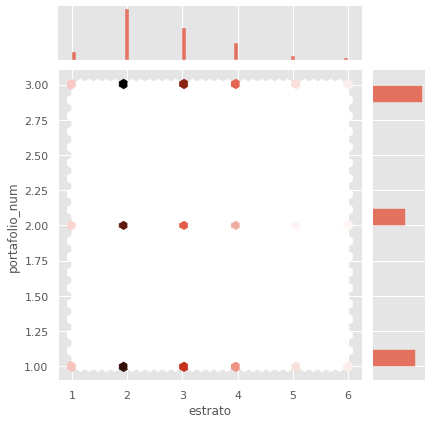

In [ ]:
#portafolio_num vs estrato:

sns.jointplot(Data.estrato, Data.portafolio_num, kind="hex")

In [ ]:
#estrato (original)
df_orig['estrato'].value_counts()

2     6413
3     5629
4     2954
SE    2589
1     1325
5      670
6      362
Name: estrato, dtype: int64

In [ ]:
#estrato (modificado)
Data['estrato'].value_counts()

2    9002
3    5629
4    2954
1    1325
5     670
6     362
Name: estrato, dtype: int64

Text(0.5, 1.0, 'Ditribución del estrato (original)')

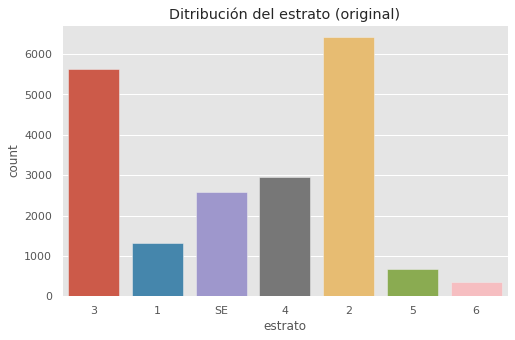

In [ ]:
#Ditribución del estrato (original):
sns.countplot(x='estrato', data = df_orig)
plt.title("Ditribución del estrato (original)")

Text(0.5, 1.0, 'Ditribución del estrato (modificado)')

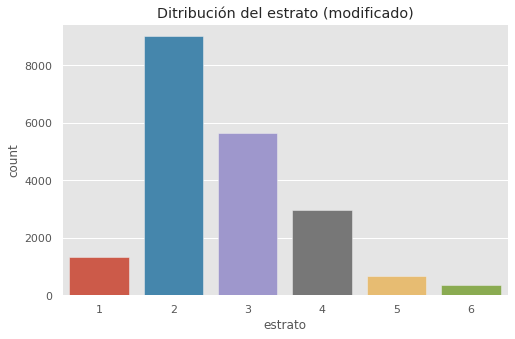

In [ ]:
#Ditribución del estrato (modificado):
sns.countplot(x='estrato', data = Data)
plt.title("Ditribución del estrato (modificado)")

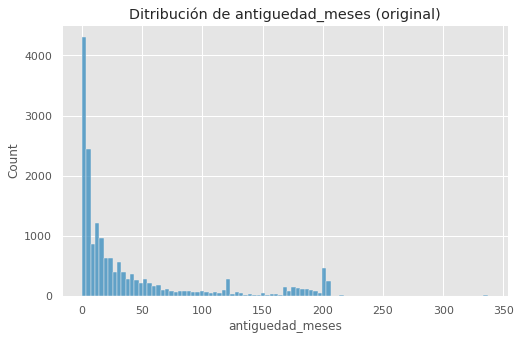

In [ ]:
#Ditribución de antiguedad_meses (original):
sns.histplot(df_orig['antiguedad_meses'])
plt.title('Ditribución de antiguedad_meses (original)')
plt.show()

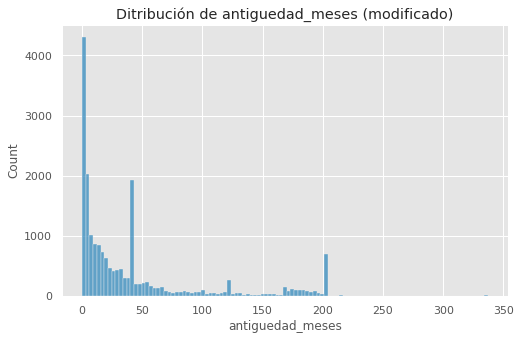

In [ ]:
#Ditribución de antiguedad_meses (modificado):
sns.histplot(Data['antiguedad_meses'])
plt.title('Ditribución de antiguedad_meses (modificado)')
plt.show()

Text(0.5, 1.0, 'Ditribución de portafolio_num')

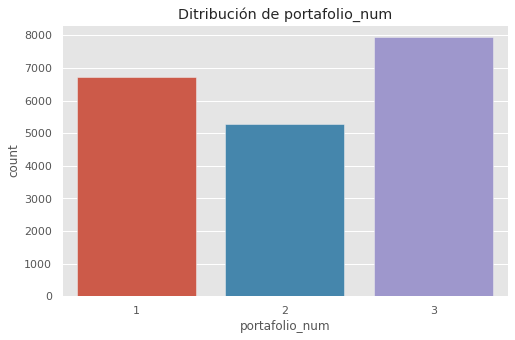

In [ ]:
#Ditribución de portafolio_num:
sns.countplot(x='portafolio_num', data = Data)
plt.title("Ditribución de portafolio_num")

Text(0.5, 1.0, 'Ditribución de pqrs_num')

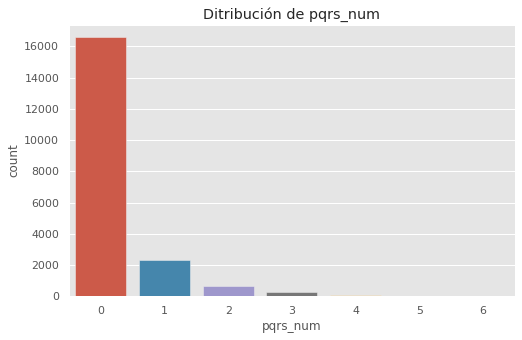

In [ ]:
#Ditribución de pqrs_num:
sns.countplot(x='pqrs_num', data = Data)
plt.title("Ditribución de pqrs_num")

In [ ]:
Data['pqrs_num'].value_counts()

0    16564
1     2335
2      654
3      254
4       94
5       31
6       10
Name: pqrs_num, dtype: int64

Text(0.5, 1.0, 'Ditribución del Incumplimiento_pago')

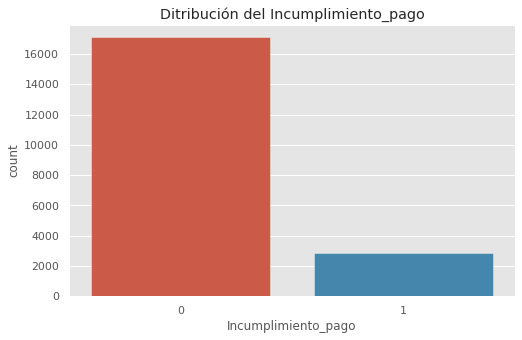

In [ ]:
#Ditribución de Incumplimiento_pago:
sns.countplot(x='Incumplimiento_pago', data = Data)
plt.title("Ditribución del Incumplimiento_pago")

**Generando el resto de distribuciones para las demás variables:**



In [ ]:
productos=['productoTO', 'productoTV', 'productoBA']
print(productos)

['productoTO', 'productoTV', 'productoBA']


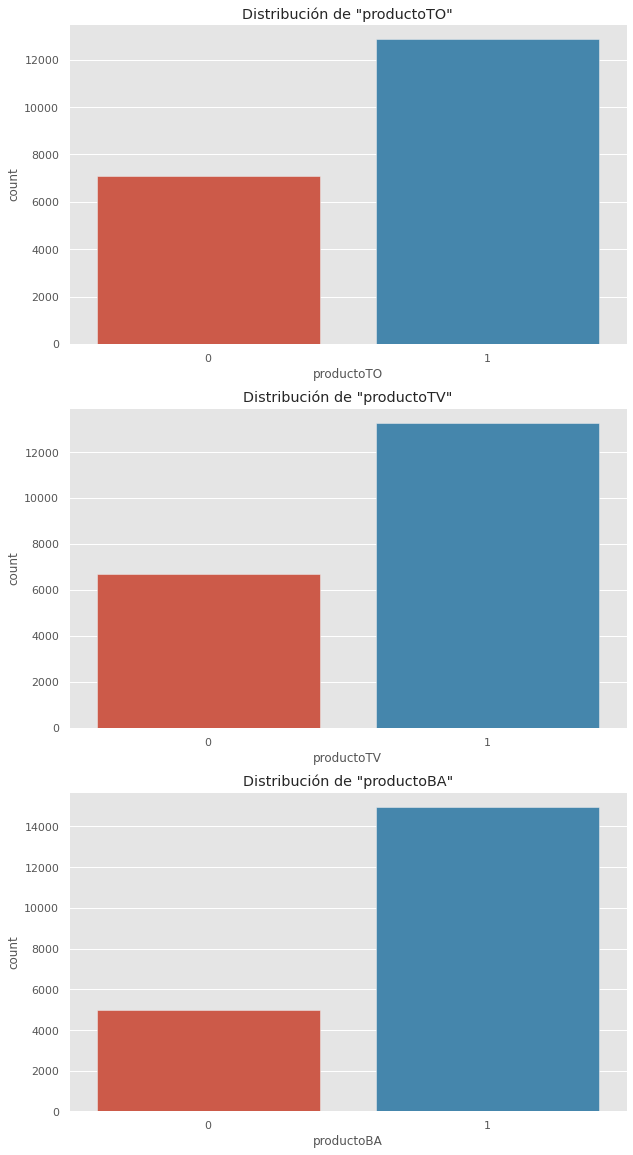

In [ ]:
vars_to_look = productos

plt.figure(figsize=(10,20))

for i,var in enumerate(vars_to_look) :#enumarate(list) returns two results:i for the index(position) and var for the value at that position (kind of a "dictionary")     
        
        plt.subplot(3,1,i+1)
        sns.countplot(x=var, data=Data)
        plt.title(f'Distribución de "{var}"')                     
    

*Para las var llamadas "productos" = ['productoTO', 'productoTV', 'productoBA']:*

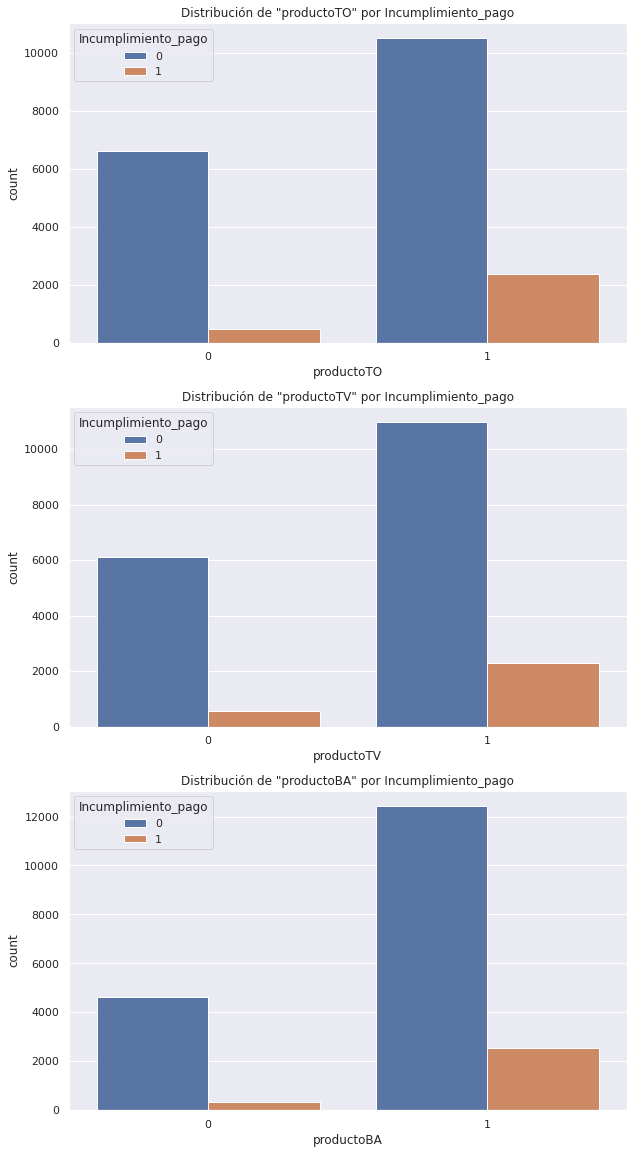

In [ ]:
vars_to_look = productos
sns.set_theme(style="darkgrid")
plt.figure(figsize=(10,20))

for i,var in enumerate(vars_to_look) :#enumarate(list) returns two results:i for the index(position) and var for the value at that position (kind of a "dictionary")    
     
        plt.subplot(3,1,i+1)
        sns.countplot(x=var, hue="Incumplimiento_pago", data=Data)
        plt.title(f'Distribución de "{var}" por Incumplimiento_pago')      


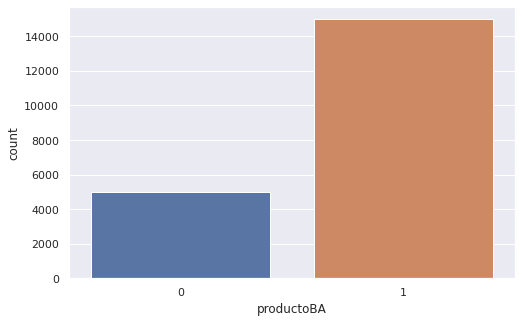

In [ ]:
sns.countplot(x="productoBA", data=Data)

In [ ]:
Data['productoBA'].value_counts()

1    14968
0     4974
Name: productoBA, dtype: int64

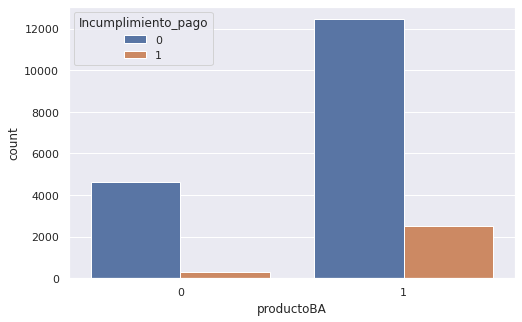

In [ ]:
sns.set_theme(style="darkgrid")
sns.countplot(x="productoBA", hue="Incumplimiento_pago", data=Data)

In [ ]:
Data['productoBA'][Data['Incumplimiento_pago']==1].value_counts() #azul

1    2529
0     326
Name: productoBA, dtype: int64

In [ ]:
Data['productoBA'][Data['Incumplimiento_pago']==0].value_counts() #rojo

1    12439
0     4648
Name: productoBA, dtype: int64

In [ ]:
4648/326

14.257668711656441

In [ ]:
12439/2529

4.918544879398972

**Conclusión:**

De acuerdo a lo anterior, se puede observar que al adquirir un o varios productos, hay mayor número de clientes que incumplen el primer pago.

*Para las var llamadas "pqrs" = ['asesoria_factura', 'pedidos_peticiones', 'reagendamiento', 'asesoria_servicios', 'retencion', 'Otras', 'quejas_fraude', 'traslado']*:

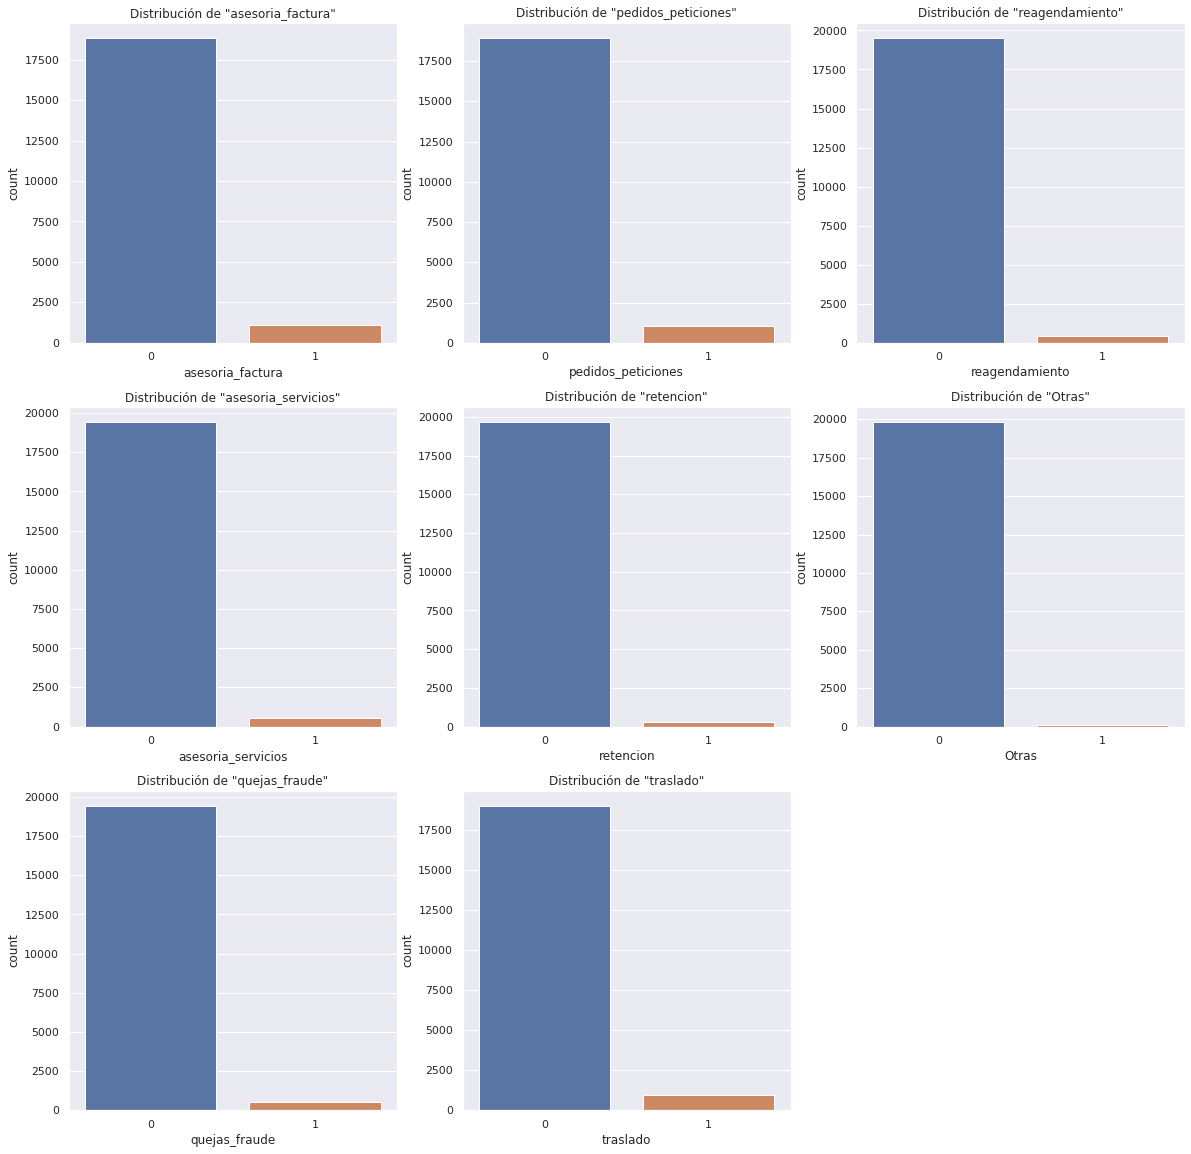

In [ ]:
vars_to_look = pqrs

plt.figure(figsize=(20,20))

for i,var in enumerate(vars_to_look) :#enumarate(list) returns two results:i for the index(position) and var for the value at that position (kind of a "dictionary")     
        
        plt.subplot(3,3,i+1)
        sns.countplot(x=var, data=Data)
        plt.title(f'Distribución de "{var}"')   

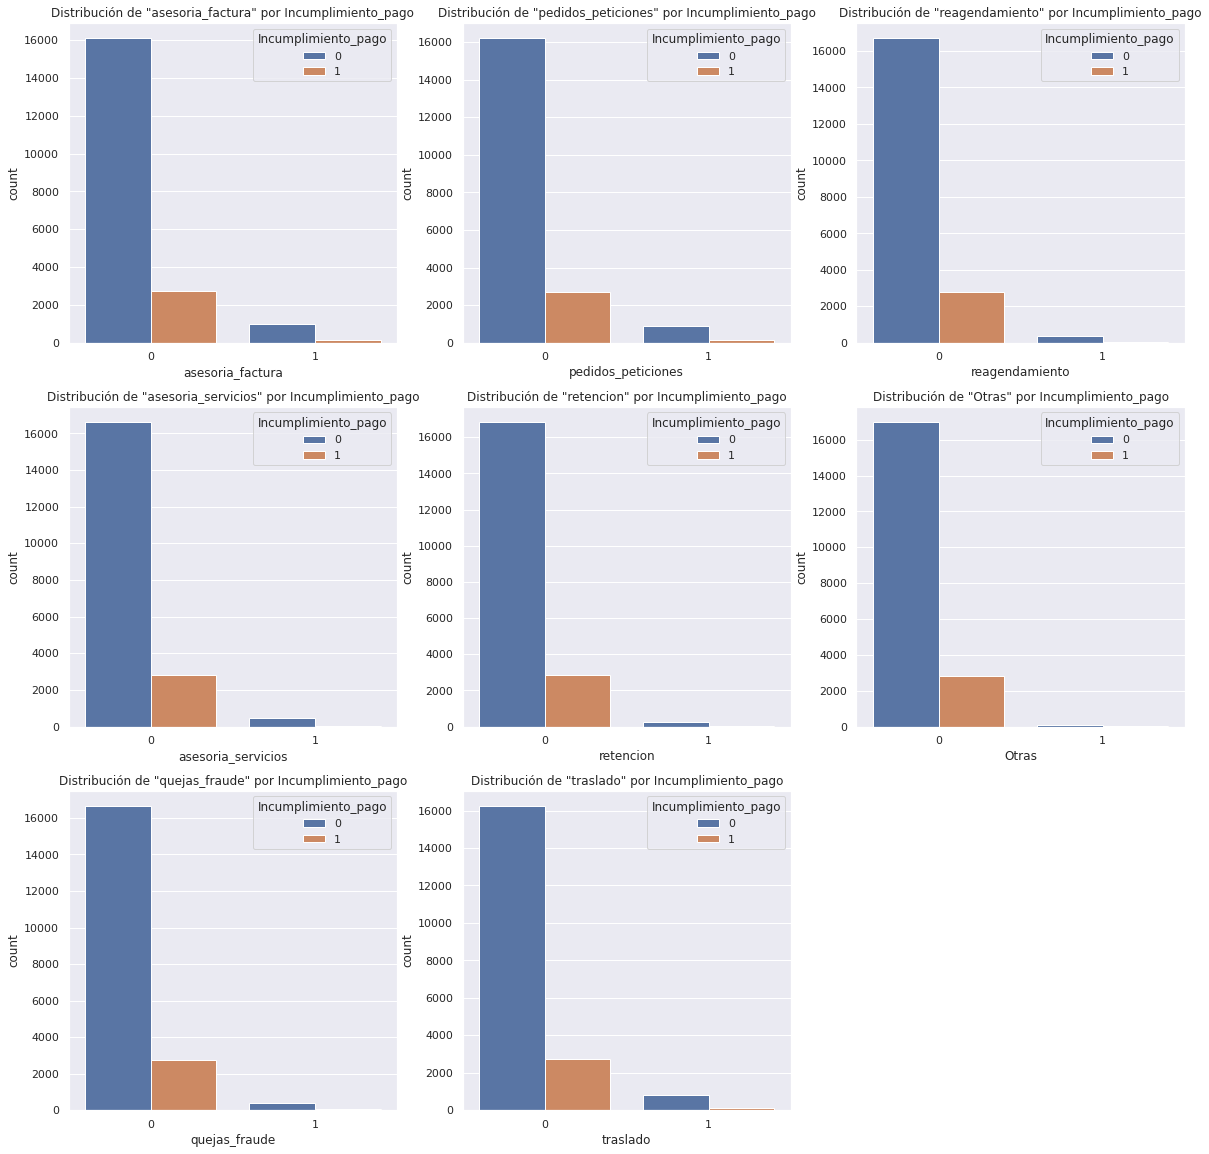

In [ ]:
vars_to_look = pqrs
sns.set_theme(style="darkgrid")
plt.figure(figsize=(20,20))

for i,var in enumerate(vars_to_look) :#enumarate(list) returns two results:i for the index(position) and var for the value at that position (kind of a "dictionary")    
     
        plt.subplot(3,3,i+1)
        sns.countplot(x=var, hue="Incumplimiento_pago", data=Data)
        plt.title(f'Distribución de "{var}" por Incumplimiento_pago')      

In [ ]:
Data['traslado'].value_counts() #general (totalizado sin tener en cuenta el valor de IP)

0    18980
1      962
Name: traslado, dtype: int64

In [ ]:
#específico (parcial teniendo en cuenta el valor de IP)
Data['traslado'][Data['Incumplimiento_pago']==1].value_counts() #marrón

0    2727
1     128
Name: traslado, dtype: int64

In [ ]:
#específico (parcial teniendo en cuenta el valor de IP)
Data['traslado'][Data['Incumplimiento_pago']==0].value_counts() #azul

0    16253
1      834
Name: traslado, dtype: int64

**Conclusión:**

Cuando los clientes efectuan alguna solicitud, el IP es menor.

**Teniendo en cuenta lo anterior, veamos como sería el comportamiento (AGREGADO) de `portafolio_num` y `pqrs_num` con `Incumplimiento_pago`:**



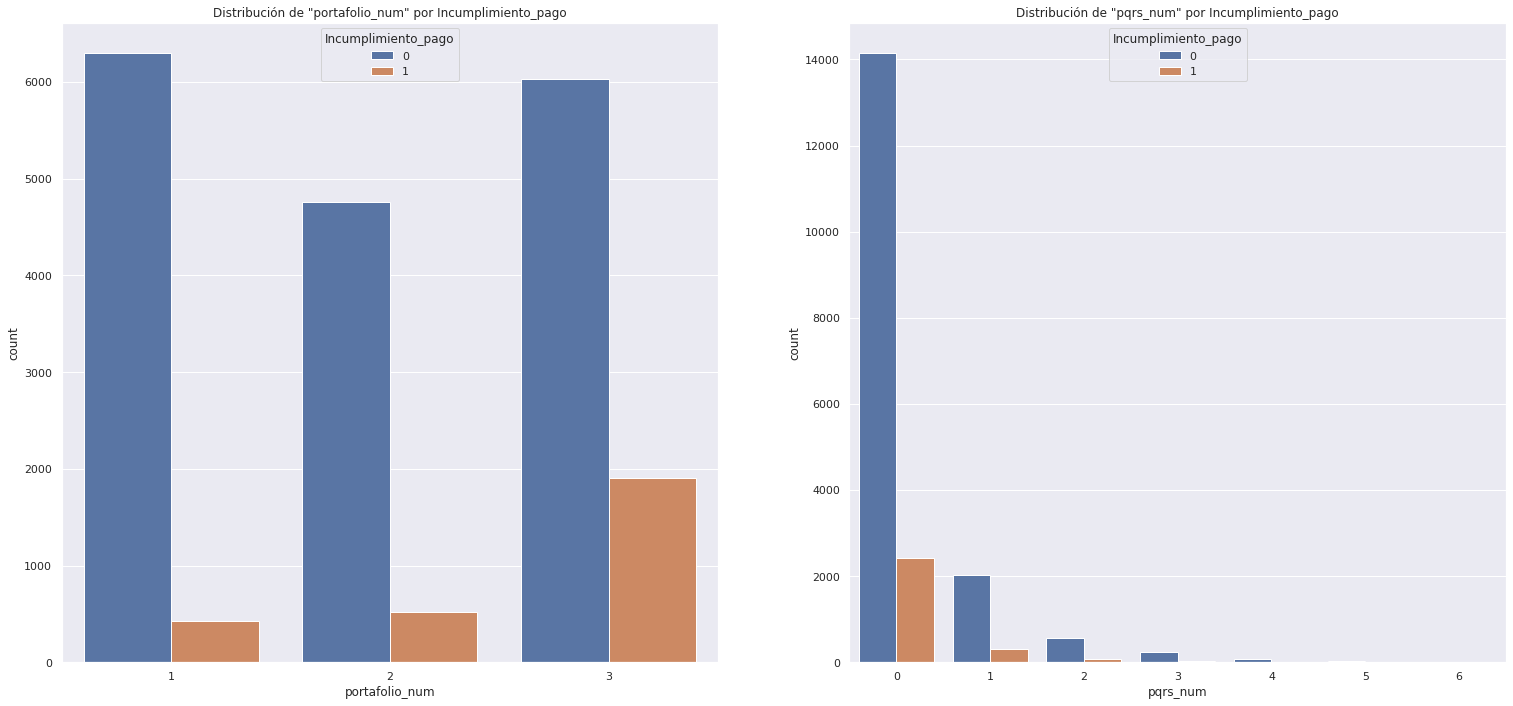

In [ ]:
var_agg=['portafolio_num','pqrs_num']
vars_to_look = var_agg
sns.set_theme(style="darkgrid")
plt.figure(figsize=(40,40))

for i,var in enumerate(vars_to_look) :#enumarate(list) returns two results:i for the index(position) and var for the value at that position (kind of a "dictionary")    
     
        plt.subplot(3,3,i+1)
        sns.countplot(x=var, hue="Incumplimiento_pago", data=Data)
        plt.title(f'Distribución de "{var}" por Incumplimiento_pago')  

In [ ]:
#veamos los valores arrojados de la gráfica abterior:
Data[var_agg[0]][Data['Incumplimiento_pago']==1].value_counts()

3    1904
2     520
1     431
Name: portafolio_num, dtype: int64

In [ ]:
Data[var_agg[0]][Data['Incumplimiento_pago']==0].value_counts()

1    6298
3    6029
2    4760
Name: portafolio_num, dtype: int64

In [ ]:
Data[var_agg[1]][Data['Incumplimiento_pago']==1].value_counts()

0    2420
1     304
2      82
3      26
4      15
5       8
Name: pqrs_num, dtype: int64

In [ ]:
Data[var_agg[1]][Data['Incumplimiento_pago']==0].value_counts()

0    14144
1     2031
2      572
3      228
4       79
5       23
6       10
Name: pqrs_num, dtype: int64

In [ ]:
Data[Data[var_agg[1]]==6]

,REGIONAL,DEPARTAMENTO,TECNOL,GERENCIA,CANAL_HOMOLOGADO_MILLICON,tipo_fuerza_venta,estrato,antiguedad_meses,productos,portafolio,no_serv_tecnicos,fallo,asesoria_factura,pedidos_peticiones,reagendamiento,asesoria_servicios,retencion,Otras,quejas_fraude,traslado,Incumplimiento_pago,cliente_id,productoTO,productoTV,productoBA,portafolio_num,pqrs_num
131,NOROCCIDENTE,ANTIOQUIA,REDCO,CONTACT,SAC,INDIRECTA,3,66.0,TV+BA,Duo,1.0,Servicio intermitente,0,1,1,1,1,1,0,1,0,1020419036,0,1,1,2,6
132,NOROCCIDENTE,ANTIOQUIA,REDCO,CONTACT,SAC,INDIRECTA,3,66.0,TV+BA,Duo,1.0,Servicio intermitente,0,1,1,1,1,1,0,1,0,1020419036,0,1,1,2,6
6374,NOROCCIDENTE,ANTIOQUIA,HFC,CONTACT,SAC,INDIRECTA,3,3.0,TO,Individual,1.0,No navega,1,1,1,1,1,0,0,1,0,1128454668,1,0,0,1,6
7027,NOROCCIDENTE,ANTIOQUIA,HFC,TIENDAS,TIENDAS,INDIRECTA,2,18.0,TO+TV+BA,Trio,1.0,Sin señal,1,1,1,1,1,1,0,0,0,1152206656,1,1,1,3,6
7028,NOROCCIDENTE,ANTIOQUIA,HFC,TIENDAS,TIENDAS,INDIRECTA,2,18.0,TO+TV+BA,Trio,1.0,Sin señal,1,1,1,1,1,1,0,0,0,1152206656,1,1,1,3,6
7029,NOROCCIDENTE,ANTIOQUIA,HFC,TIENDAS,TIENDAS,INDIRECTA,2,18.0,TO+TV+BA,Trio,1.0,Sin señal,1,1,1,1,1,1,0,0,0,1152206656,1,1,1,3,6
10478,NOROCCIDENTE,ANTIOQUIA,HFC,CONTACT,IN BOUND,INDIRECTA,3,90.0,BA,Individual,1.0,SE,0,1,1,1,1,1,0,1,0,32295963,0,0,1,1,6
12891,NOROCCIDENTE,ANTIOQUIA,HFC,CONTACT,SAC,INDIRECTA,3,71.0,BA,Individual,1.0,No funciona línea telefónica,1,1,1,0,1,1,0,1,0,53100567,0,0,1,1,6
17019,NOROCCIDENTE,ANTIOQUIA,REDCO,CONTACT,OUT BOUND,INDIRECTA,4,2.0,TV+BA,Duo,1.0,Sin señal,1,1,1,1,1,1,0,0,0,70055451,0,1,1,2,6
17020,NOROCCIDENTE,ANTIOQUIA,DTH,CONTACT,SAC,INDIRECTA,4,2.0,TV+BA,Duo,1.0,Sin señal,1,1,1,1,1,1,0,0,0,70055451,0,1,1,2,6


De los datos anteriores, es clave mencionar que de forma agregada se puede visualizar mejor la información y ver el comportamiento frente a la var objetivo (IP=Incumplimiento Pago):

- A medida que se va ampliando el portafolio, el IP es mayor.
- Existe una tendencia general de que entre mas peticiones del cliente hayan, hay menos IP.

**Continuemos analizando  como sería el comportamiento de `antiguedad_meses` y `estrato` con `Incumplimiento_pago`, al comparar las versiones originales (con nulos o datos faltantes) versus las versiones imputadas (se llenaron los datos nulos o faltantes con el promedio):**

In [ ]:
#lista de dataframes:
datos=[df_orig, Data]
print('df_orig = datos[0].head(1):')
datos[0].head(1)

df_orig = datos[0].head(1):


,REGIONAL,DEPARTAMENTO,TECNOL,GERENCIA,CANAL_HOMOLOGADO_MILLICON,tipo_fuerza_venta,estrato,antiguedad_meses,productos,portafolio,no_serv_tecnicos,fallo,asesoria_factura,pedidos_peticiones,reagendamiento,asesoria_servicios,retencion,Otras,quejas_fraude,traslado,Incumplimiento_pago,cliente_id
0,COSTA,MAGDALENA,HFC,CONTACT,SAC,INDIRECTA,3,19.0,TV+BA,Duo,1.0,No funciona línea telefónica,0,0,0,0,0,0,0,0,0,1004369760


In [ ]:
print('Data = datos[1].head(1):')
datos[1].head(1)

Data = datos[1].head(1):


,REGIONAL,DEPARTAMENTO,TECNOL,GERENCIA,CANAL_HOMOLOGADO_MILLICON,tipo_fuerza_venta,estrato,antiguedad_meses,productos,portafolio,no_serv_tecnicos,fallo,asesoria_factura,pedidos_peticiones,reagendamiento,asesoria_servicios,retencion,Otras,quejas_fraude,traslado,Incumplimiento_pago,cliente_id,productoTO,productoTV,productoBA,portafolio_num,pqrs_num
0,COSTA,MAGDALENA,HFC,CONTACT,SAC,INDIRECTA,3,19.0,TV+BA,Duo,1.0,No funciona línea telefónica,0,0,0,0,0,0,0,0,0,1004369760,0,1,1,2,0


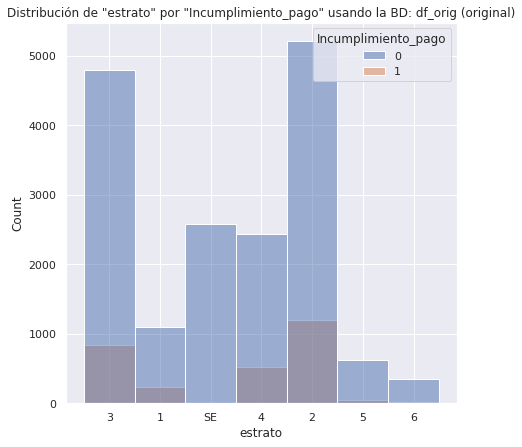

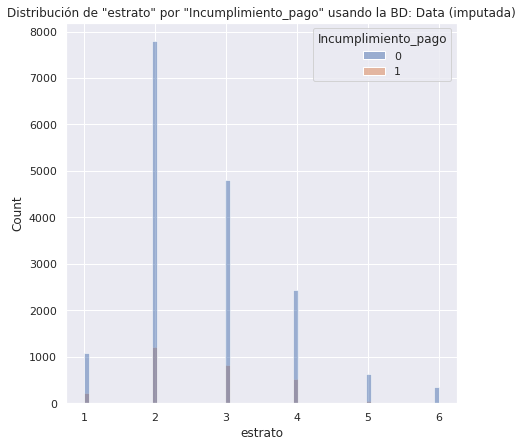

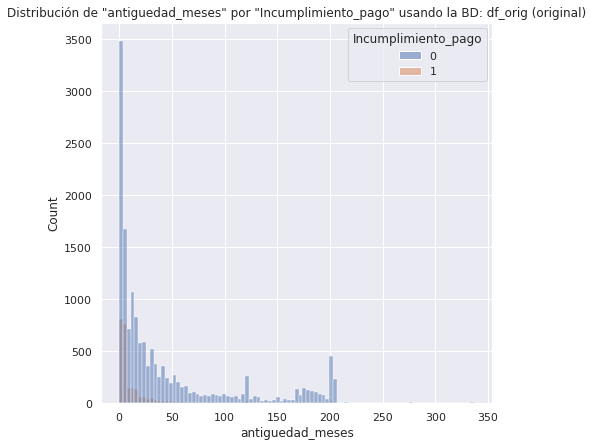

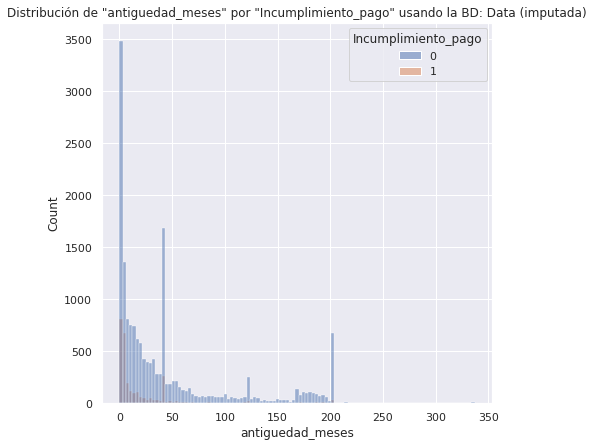

In [ ]:
#original vs imputado
vars_est_ant=['estrato', 'antiguedad_meses']
vars_to_look=vars_est_ant

IP='Incumplimiento_pago'
feature=0 #flag for: df_orig=0, Data=1

for i,var in enumerate(vars_to_look): #enumarate(list) returns two results:i for the index(position) and var for the value at that position (kind of a "dictionary")
  
  if feature==0: #df_orig
    plt.figure(figsize=(7,7))
    sns.histplot(x=var, hue=IP, data=datos[0])
    plt.title(f'Distribución de "{var}" por "{IP}" usando la BD: df_orig (original)')
    plt.show()
    feature=1 #for next option
    
  if feature==1: #Data
    plt.figure(figsize=(7,7))
    sns.histplot(x=var, hue=IP, data=datos[1])
    plt.title(f'Distribución de "{var}" por "{IP}" usando la BD: Data (imputada)')
    plt.show()
    feature=0 #for next option   

Según lo anterior, se ve que al imputar se "daña" la distribución al agregarse los valores promedios imputados. Otra estrategia, aparte de seguir con la original o modificada ilustaradas antes, es quitar las filas que poseen valores nulos o faltantes tanto del estrato como de la antiguedad, donde se sacrifica información pero no se afecta la distribución:

- Para el caso particular del estrato, como el SE original no tiene ningún registro asociado a IP=1, eso quiere decir que al imputar SE con cualquier metodo, no cambia para ningún estrato la proporción de IP=1, asi que se puede seguir trabajando con la versión de Data (aún cuando "dañe" en general la forma de la distribución)

- Para el caso de la antiguedad, aparte de dañarse la forma de la distribución, se está generando un promedio que contiene la proporción promedio de la distribución cuando IP=0 y cuando IP=1, por lo que la mejor estrategia sería descartar esos datos nulos o faltantes, quedándose con la versión original

# VERIFICANDO LA INFORMACIÓN PARA ASEGURAR EL ÉXITO DEL MODELO PROPUESTO:

In [ ]:
#df_orig:
datos[0].info()
#df_mix: como se había dicho antes, no se usará 'no_serv_tecnicos' ni 'fallo' por tener muy poca info disponible (no nula)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19942 entries, 0 to 19941
Data columns (total 22 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   REGIONAL                   19942 non-null  object 
 1   DEPARTAMENTO               19942 non-null  object 
 2   TECNOL                     19942 non-null  object 
 3   GERENCIA                   19942 non-null  object 
 4   CANAL_HOMOLOGADO_MILLICON  19942 non-null  object 
 5   tipo_fuerza_venta          19942 non-null  object 
 6   estrato                    19942 non-null  object 
 7   antiguedad_meses           18264 non-null  float64
 8   productos                  19942 non-null  object 
 9   portafolio                 19942 non-null  object 
 10  no_serv_tecnicos           6909 non-null   float64
 11  fallo                      6909 non-null   object 
 12  asesoria_factura           19942 non-null  int64  
 13  pedidos_peticiones         19942 non-null  int

In [ ]:
df_orig[df_orig['estrato']=='SE'].value_counts()

REGIONAL      DEPARTAMENTO  TECNOL  GERENCIA  CANAL_HOMOLOGADO_MILLICON  tipo_fuerza_venta  estrato  antiguedad_meses  productos  portafolio  no_serv_tecnicos  fallo                         asesoria_factura  pedidos_peticiones  reagendamiento  asesoria_servicios  retencion  Otras  quejas_fraude  traslado  Incumplimiento_pago  cliente_id
COSTA         ANTIOQUIA     REDCO   CONTACT   OUT BOUND                  INDIRECTA          SE       0.0               TO+TV+BA   Trio        1.0               No navega                     0                 1                   1               1                   0          0      0              0         0                    21261201      3
              CORDOBA       REDCO   FVD       FVD                        INDIRECTA          SE       0.0               TO+BA      Duo         1.0               No navega                     0                 0                   0               0                   0          0      0              0         0         

In [ ]:
df_orig[df_orig['cliente_id']==21261201].value_counts()

REGIONAL  DEPARTAMENTO  TECNOL  GERENCIA  CANAL_HOMOLOGADO_MILLICON  tipo_fuerza_venta  estrato  antiguedad_meses  productos  portafolio  no_serv_tecnicos  fallo      asesoria_factura  pedidos_peticiones  reagendamiento  asesoria_servicios  retencion  Otras  quejas_fraude  traslado  Incumplimiento_pago  cliente_id
COSTA     ANTIOQUIA     REDCO   CONTACT   OUT BOUND                  INDIRECTA          SE       0.0               TO+TV+BA   Trio        1.0               No navega  0                 1                   1               1                   0          0      0              0         0                    21261201      3
dtype: int64

In [ ]:
df_orig['cliente_id'].nunique()

12106

In [ ]:
df_orig[df_orig['estrato']=='SE'].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2589 entries, 6 to 19887
Data columns (total 22 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   REGIONAL                   2589 non-null   object 
 1   DEPARTAMENTO               2589 non-null   object 
 2   TECNOL                     2589 non-null   object 
 3   GERENCIA                   2589 non-null   object 
 4   CANAL_HOMOLOGADO_MILLICON  2589 non-null   object 
 5   tipo_fuerza_venta          2589 non-null   object 
 6   estrato                    2589 non-null   object 
 7   antiguedad_meses           1391 non-null   float64
 8   productos                  2589 non-null   object 
 9   portafolio                 2589 non-null   object 
 10  no_serv_tecnicos           31 non-null     float64
 11  fallo                      31 non-null     object 
 12  asesoria_factura           2589 non-null   int64  
 13  pedidos_peticiones         2589 non-null   int6

In [ ]:
#Cuando el estrato=SE coincide con antiguedad_meses.isnull()
2589-1391

1198

In [ ]:
df_orig[df_orig['antiguedad_meses'].isnull()].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1678 entries, 6 to 19938
Data columns (total 22 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   REGIONAL                   1678 non-null   object 
 1   DEPARTAMENTO               1678 non-null   object 
 2   TECNOL                     1678 non-null   object 
 3   GERENCIA                   1678 non-null   object 
 4   CANAL_HOMOLOGADO_MILLICON  1678 non-null   object 
 5   tipo_fuerza_venta          1678 non-null   object 
 6   estrato                    1678 non-null   object 
 7   antiguedad_meses           0 non-null      float64
 8   productos                  1678 non-null   object 
 9   portafolio                 1678 non-null   object 
 10  no_serv_tecnicos           143 non-null    float64
 11  fallo                      143 non-null    object 
 12  asesoria_factura           1678 non-null   int64  
 13  pedidos_peticiones         1678 non-null   int6

In [ ]:
# .isna() == .isnull()
print(df_orig['antiguedad_meses'].isna().sum())
df_orig['antiguedad_meses'].isnull().sum()

1678


1678

In [ ]:
df_orig[df_orig['estrato']=='SE'][df_orig['antiguedad_meses'].isnull()]

,REGIONAL,DEPARTAMENTO,TECNOL,GERENCIA,CANAL_HOMOLOGADO_MILLICON,tipo_fuerza_venta,estrato,antiguedad_meses,productos,portafolio,no_serv_tecnicos,fallo,asesoria_factura,pedidos_peticiones,reagendamiento,asesoria_servicios,retencion,Otras,quejas_fraude,traslado,Incumplimiento_pago,cliente_id
6,EJE CAFETERO,RISARALDA,HFC,TIENDAS,TIENDAS,INDIRECTA,SE,NaN,TO+BA,Duo,NaN,NaN,0,0,0,0,0,0,0,0,0,1004490958
7,EJE CAFETERO,RISARALDA,HFC,TIENDAS,TIENDAS,INDIRECTA,SE,NaN,TO+BA,Duo,NaN,NaN,0,0,0,0,0,0,0,0,0,1004490958
9,EJE CAFETERO,RISARALDA,REDCO,FVD,DEALERS,DIRECTA,SE,NaN,TO+TV+BA,Trio,NaN,NaN,0,0,0,0,0,0,0,0,0,1004734657
10,EJE CAFETERO,RISARALDA,REDCO,FVD,DEALERS,DIRECTA,SE,NaN,TO+TV+BA,Trio,NaN,NaN,0,0,0,0,0,0,0,0,0,1004734657
11,EJE CAFETERO,RISARALDA,REDCO,FVD,DEALERS,DIRECTA,SE,NaN,TO+TV+BA,Trio,NaN,NaN,0,0,0,0,0,0,0,0,0,1004734657
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19846,EJE CAFETERO,RISARALDA,HFC,FVD,FVD,INDIRECTA,SE,NaN,BA,Individual,NaN,NaN,0,0,0,0,0,0,0,0,0,93082303
19848,EJE CAFETERO,RISARALDA,HFC,TIENDAS,TIENDAS,INDIRECTA,SE,NaN,TO+TV+BA,Trio,NaN,NaN,0,0,0,0,0,0,0,0,0,9312495
19849,EJE CAFETERO,RISARALDA,HFC,TIENDAS,TIENDAS,INDIRECTA,SE,NaN,TO+TV+BA,Trio,NaN,NaN,0,0,0,0,0,0,0,0,0,9312495
19886,EJE CAFETERO,RISARALDA,HFC,FVD,FVD,INDIRECTA,SE,NaN,TO+BA,Duo,NaN,NaN,0,0,0,0,0,0,0,0,0,98572374


In [ ]:
df_orig[df_orig['estrato']=='SE'][df_orig['antiguedad_meses'].isnull()][df_orig['Incumplimiento_pago']==0]

,REGIONAL,DEPARTAMENTO,TECNOL,GERENCIA,CANAL_HOMOLOGADO_MILLICON,tipo_fuerza_venta,estrato,antiguedad_meses,productos,portafolio,no_serv_tecnicos,fallo,asesoria_factura,pedidos_peticiones,reagendamiento,asesoria_servicios,retencion,Otras,quejas_fraude,traslado,Incumplimiento_pago,cliente_id
6,EJE CAFETERO,RISARALDA,HFC,TIENDAS,TIENDAS,INDIRECTA,SE,NaN,TO+BA,Duo,NaN,NaN,0,0,0,0,0,0,0,0,0,1004490958
7,EJE CAFETERO,RISARALDA,HFC,TIENDAS,TIENDAS,INDIRECTA,SE,NaN,TO+BA,Duo,NaN,NaN,0,0,0,0,0,0,0,0,0,1004490958
9,EJE CAFETERO,RISARALDA,REDCO,FVD,DEALERS,DIRECTA,SE,NaN,TO+TV+BA,Trio,NaN,NaN,0,0,0,0,0,0,0,0,0,1004734657
10,EJE CAFETERO,RISARALDA,REDCO,FVD,DEALERS,DIRECTA,SE,NaN,TO+TV+BA,Trio,NaN,NaN,0,0,0,0,0,0,0,0,0,1004734657
11,EJE CAFETERO,RISARALDA,REDCO,FVD,DEALERS,DIRECTA,SE,NaN,TO+TV+BA,Trio,NaN,NaN,0,0,0,0,0,0,0,0,0,1004734657
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19846,EJE CAFETERO,RISARALDA,HFC,FVD,FVD,INDIRECTA,SE,NaN,BA,Individual,NaN,NaN,0,0,0,0,0,0,0,0,0,93082303
19848,EJE CAFETERO,RISARALDA,HFC,TIENDAS,TIENDAS,INDIRECTA,SE,NaN,TO+TV+BA,Trio,NaN,NaN,0,0,0,0,0,0,0,0,0,9312495
19849,EJE CAFETERO,RISARALDA,HFC,TIENDAS,TIENDAS,INDIRECTA,SE,NaN,TO+TV+BA,Trio,NaN,NaN,0,0,0,0,0,0,0,0,0,9312495
19886,EJE CAFETERO,RISARALDA,HFC,FVD,FVD,INDIRECTA,SE,NaN,TO+BA,Duo,NaN,NaN,0,0,0,0,0,0,0,0,0,98572374


In [ ]:
df_orig[df_orig['estrato']=='SE'][df_orig['antiguedad_meses'].isnull()][df_orig['Incumplimiento_pago']==1]

,REGIONAL,DEPARTAMENTO,TECNOL,GERENCIA,CANAL_HOMOLOGADO_MILLICON,tipo_fuerza_venta,estrato,antiguedad_meses,productos,portafolio,no_serv_tecnicos,fallo,asesoria_factura,pedidos_peticiones,reagendamiento,asesoria_servicios,retencion,Otras,quejas_fraude,traslado,Incumplimiento_pago,cliente_id
7532,EJE CAFETERO,RISARALDA,HFC,CONTACT,IN BOUND,INDIRECTA,SE,NaN,TV,Individual,NaN,NaN,0,0,0,0,0,0,0,0,1,1355578
14577,EJE CAFETERO,RISARALDA,HFC,FVD,FVD,INDIRECTA,SE,NaN,TO+BA,Duo,NaN,NaN,0,0,0,0,0,0,0,0,1,42122748
14578,EJE CAFETERO,RISARALDA,HFC,FVD,FVD,INDIRECTA,SE,NaN,TO+BA,Duo,NaN,NaN,0,0,0,0,0,0,0,0,1,42122748


#Continuamos para mejorar el modelo y tener en cuenta la válidez estadística del mismo:


*Entonces, ¿debería crear un dataframe mixto para continuar con un análisis más preciso que alimente mejor el modelo?:*

**Como los porcentajes de info SE o nulos son relativamente bajos en estas dos variables (aprox 13% para estrato y 9% para antiguedad, compartiedo la mayoría de registros en común), contiinuaré con la versión de datos llamada Data, pero mejor creando otro llamado df_final, que erá el dataframe final con el que trbajaré el modelo, dejando únicamente las cols que definirán el modelo y quitando las demás columnas que no se usarán.**

In [ ]:
print(Data.columns)

Index(['REGIONAL', 'DEPARTAMENTO', 'TECNOL', 'GERENCIA',
       'CANAL_HOMOLOGADO_MILLICON', 'tipo_fuerza_venta', 'estrato',
       'antiguedad_meses', 'productos', 'portafolio', 'no_serv_tecnicos',
       'fallo', 'asesoria_factura', 'pedidos_peticiones', 'reagendamiento',
       'asesoria_servicios', 'retencion', 'Otras', 'quejas_fraude', 'traslado',
       'Incumplimiento_pago', 'cliente_id', 'productoTO', 'productoTV',
       'productoBA', 'portafolio_num', 'pqrs_num'],
      dtype='object')


In [ ]:
Data.head(1)

,REGIONAL,DEPARTAMENTO,TECNOL,GERENCIA,CANAL_HOMOLOGADO_MILLICON,tipo_fuerza_venta,estrato,antiguedad_meses,productos,portafolio,no_serv_tecnicos,fallo,asesoria_factura,pedidos_peticiones,reagendamiento,asesoria_servicios,retencion,Otras,quejas_fraude,traslado,Incumplimiento_pago,cliente_id,productoTO,productoTV,productoBA,portafolio_num,pqrs_num
0,COSTA,MAGDALENA,HFC,CONTACT,SAC,INDIRECTA,3,19.0,TV+BA,Duo,1.0,No funciona línea telefónica,0,0,0,0,0,0,0,0,0,1004369760,0,1,1,2,0


In [ ]:
#Continuing...
cols_def=['estrato', 'antiguedad_meses', 'asesoria_factura', 'pedidos_peticiones', 'reagendamiento',
       'asesoria_servicios', 'retencion', 'Otras', 'quejas_fraude', 'traslado',
       'Incumplimiento_pago','productoTO', 'productoTV',
       'productoBA', 'portafolio_num', 'pqrs_num']
print(f'¡ Son "{len(cols_def)}" columnas definitivas, a saber: "{cols_def}" !')

¡ Son "16" columnas definitivas, a saber: "['estrato', 'antiguedad_meses', 'asesoria_factura', 'pedidos_peticiones', 'reagendamiento', 'asesoria_servicios', 'retencion', 'Otras', 'quejas_fraude', 'traslado', 'Incumplimiento_pago', 'productoTO', 'productoTV', 'productoBA', 'portafolio_num', 'pqrs_num']" !


In [ ]:
df_final=Data[cols_def]
df_final

,estrato,antiguedad_meses,asesoria_factura,pedidos_peticiones,reagendamiento,asesoria_servicios,retencion,Otras,quejas_fraude,traslado,Incumplimiento_pago,productoTO,productoTV,productoBA,portafolio_num,pqrs_num
0,3,19.00000,0,0,0,0,0,0,0,0,0,0,1,1,2,0
1,3,19.00000,0,0,0,0,0,0,0,0,0,0,1,1,2,0
2,1,1.00000,0,0,0,0,0,0,0,0,0,0,1,0,1,0
3,3,7.00000,0,0,0,0,0,0,0,0,1,1,1,1,3,0
4,3,7.00000,0,0,0,0,0,0,0,0,1,1,1,1,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19937,2,43.13606,0,0,0,0,0,0,0,0,1,1,0,1,2,0
19938,2,43.13606,0,0,0,0,0,0,0,0,1,1,0,1,2,0
19939,2,89.00000,0,0,0,0,0,0,0,0,0,0,0,1,1,0
19940,2,36.00000,0,1,0,0,0,0,0,0,0,0,1,0,1,1


Para el caso **MULTIVARIADO**, se tiene:



In [ ]:
df_final.head(1)

,estrato,antiguedad_meses,asesoria_factura,pedidos_peticiones,reagendamiento,asesoria_servicios,retencion,Otras,quejas_fraude,traslado,Incumplimiento_pago,productoTO,productoTV,productoBA,portafolio_num,pqrs_num
0,3,19.0,0,0,0,0,0,0,0,0,0,0,1,1,2,0


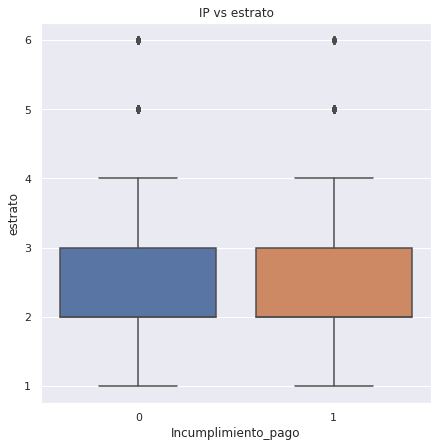

In [ ]:
IP='Incumplimiento_pago'
plt.figure(figsize=(7,7))
sns.boxplot(x=IP, y='estrato', data=df_final)
plt.title('IP vs estrato')
plt.show()

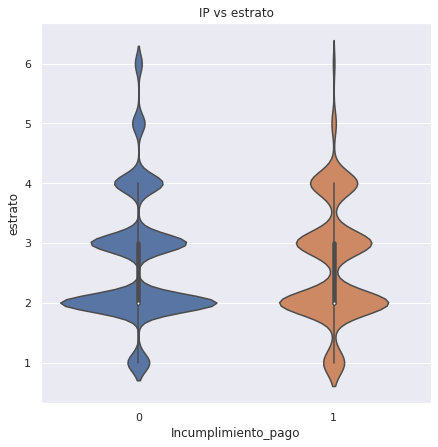

In [ ]:
plt.figure(figsize=(7,7))
sns.violinplot(x=IP, y='estrato', data=df_final)
plt.title('IP vs estrato')
plt.show()

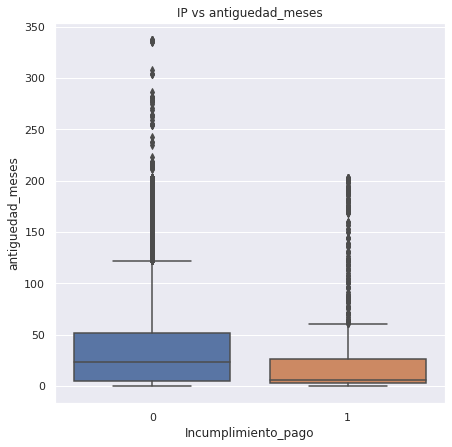

In [ ]:
plt.figure(figsize=(7,7))
sns.boxplot(x=IP, y='antiguedad_meses', data=df_final)
plt.title('IP vs antiguedad_meses')
plt.show()

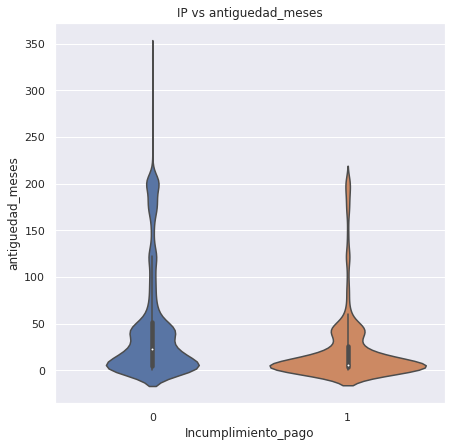

In [ ]:
plt.figure(figsize=(7,7))
sns.violinplot(x=IP, y='antiguedad_meses', data=df_final)
plt.title('IP vs antiguedad_meses')
plt.show()

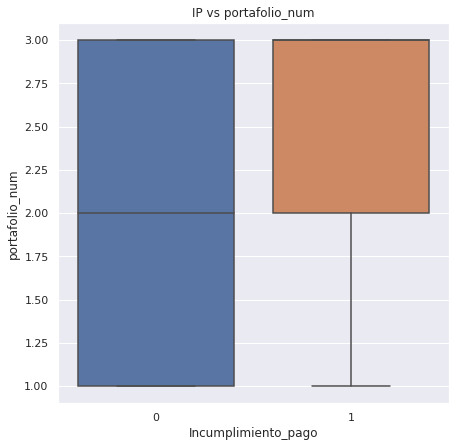

In [ ]:
plt.figure(figsize=(7,7))
sns.boxplot(x=IP, y='portafolio_num', data=df_final)
plt.title('IP vs portafolio_num')
plt.show()

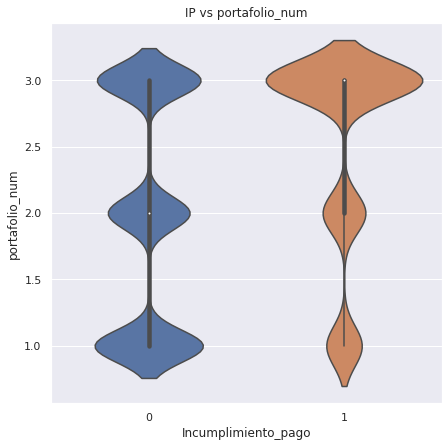

In [ ]:
plt.figure(figsize=(7,7))
sns.violinplot(x=IP, y='portafolio_num', data=df_final)
plt.title('IP vs portafolio_num')
plt.show()

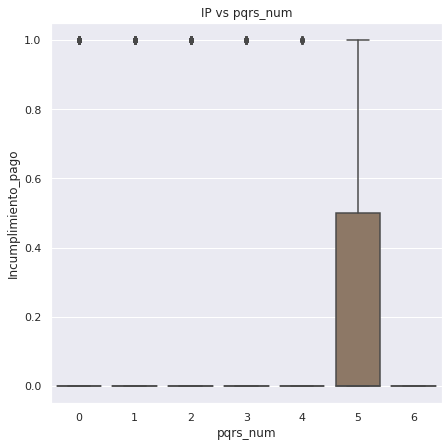

In [ ]:
plt.figure(figsize=(7,7))
sns.boxplot(y=IP, x='pqrs_num', data=df_final)
plt.title('IP vs pqrs_num')
plt.show()

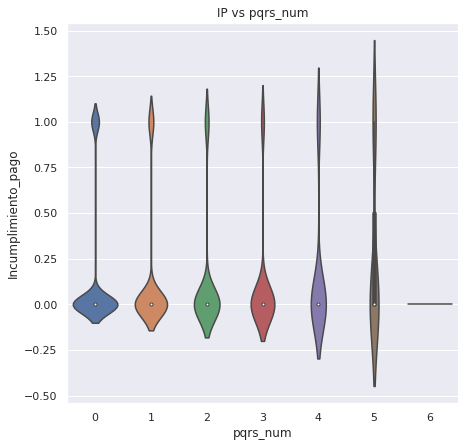

In [ ]:
plt.figure(figsize=(7,7))
sns.violinplot(y=IP, x='pqrs_num', data=df_final)
plt.title('IP vs pqrs_num')
plt.show()

In [ ]:
df_final[['estrato','antiguedad_meses']][df_final['Incumplimiento_pago']==0]         

,estrato,antiguedad_meses
0,3,19.00000
1,3,19.00000
2,1,1.00000
6,2,43.13606
7,2,43.13606
...,...,...
19935,4,202.00000
19936,3,0.00000
19939,2,89.00000
19940,2,36.00000


In [ ]:
df_final[['estrato','antiguedad_meses']][df_final['Incumplimiento_pago']==1]

,estrato,antiguedad_meses
3,3,7.00000
4,3,7.00000
5,3,7.00000
8,3,43.13606
15,4,43.13606
...,...,...
19888,3,3.00000
19889,3,3.00000
19890,3,3.00000
19937,2,43.13606


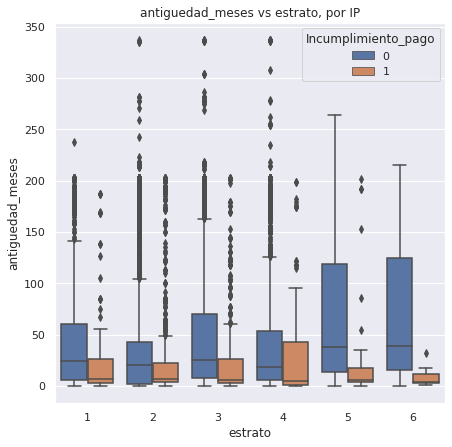

In [ ]:
IP='Incumplimiento_pago'
plt.figure(figsize=(7,7))
sns.boxplot(x='estrato',y='antiguedad_meses', hue=IP, data=df_final) #antiguedad=f(estrato)
plt.title('antiguedad_meses vs estrato, por IP')
plt.show()

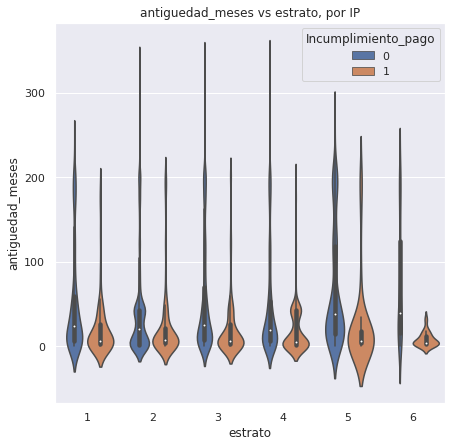

In [ ]:
IP='Incumplimiento_pago'
plt.figure(figsize=(7,7))
sns.violinplot(x='estrato',y='antiguedad_meses', hue=IP, data=df_final) #antiguedad=f(estrato)
plt.title('antiguedad_meses vs estrato, por IP')
plt.show()

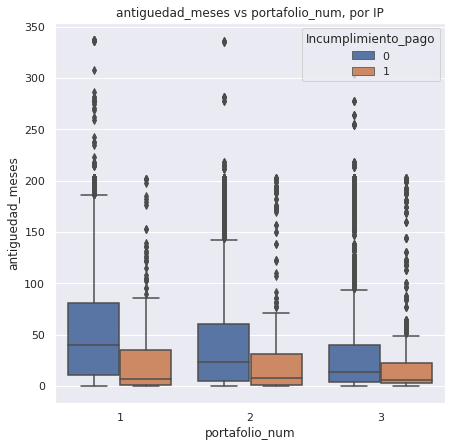

In [ ]:
plt.figure(figsize=(7,7))
sns.boxplot(x='portafolio_num',y='antiguedad_meses', hue=IP, data=df_final) #antiguedad=f(portafolio_num)
plt.title('antiguedad_meses vs portafolio_num, por IP')
plt.show()

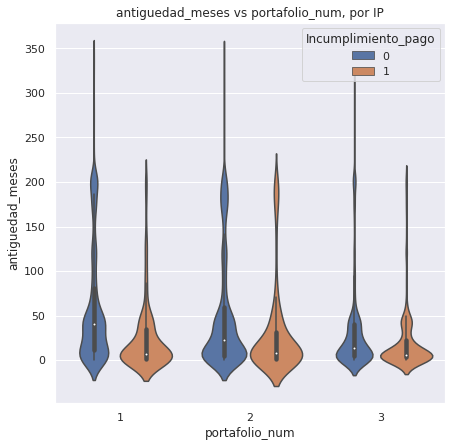

In [ ]:
plt.figure(figsize=(7,7))
sns.violinplot(x='portafolio_num',y='antiguedad_meses', hue=IP, data=df_final) #antiguedad=f(portafolio_num)
plt.title('antiguedad_meses vs portafolio_num, por IP')
plt.show()

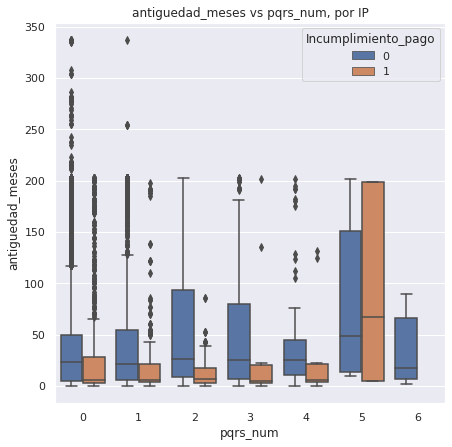

In [ ]:
plt.figure(figsize=(7,7))
sns.boxplot(x='pqrs_num',y='antiguedad_meses', hue=IP, data=df_final) #antiguedad=f(pqrs_num)
plt.title('antiguedad_meses vs pqrs_num, por IP')
plt.show()

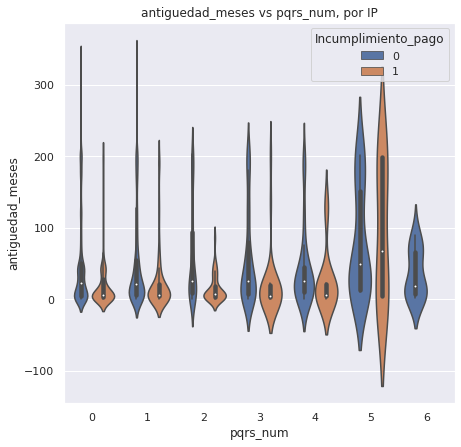

In [ ]:
plt.figure(figsize=(7,7))
sns.violinplot(x='pqrs_num',y='antiguedad_meses', hue=IP, data=df_final) #antiguedad=f(pqrs_num)
plt.title('antiguedad_meses vs pqrs_num, por IP')
plt.show()

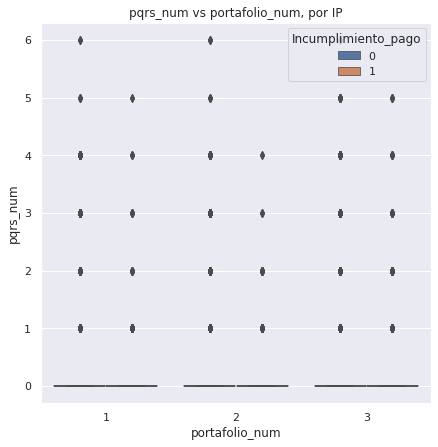

In [ ]:
plt.figure(figsize=(7,7))
sns.boxplot(x='portafolio_num',y='pqrs_num', hue=IP, data=df_final) #pqrs_num=f(portafolio_num)
plt.title('pqrs_num vs portafolio_num, por IP')
plt.show()

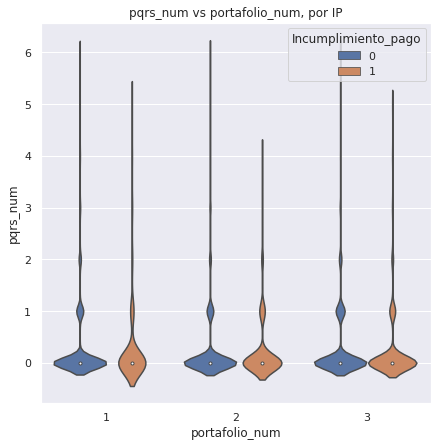

In [ ]:
plt.figure(figsize=(7,7))
sns.violinplot(x='portafolio_num',y='pqrs_num', hue=IP, data=df_final) #pqrs_num=f(portafolio_num)
plt.title('pqrs_num vs portafolio_num, por IP')
plt.show()

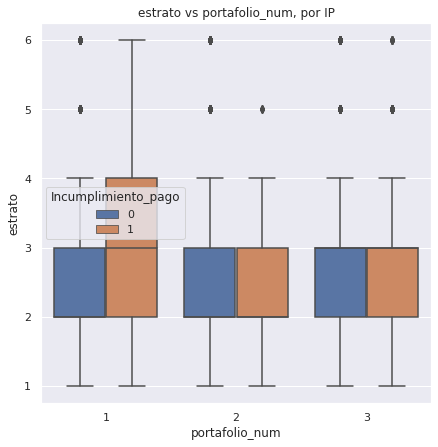

In [ ]:
plt.figure(figsize=(7,7))
sns.boxplot(x='portafolio_num',y='estrato', hue=IP, data=df_final) #estrato=f(portafolio_num)
plt.title('estrato vs portafolio_num, por IP')
plt.show()

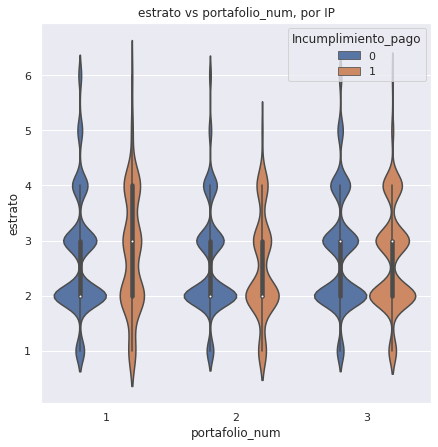

In [ ]:
plt.figure(figsize=(7,7))
sns.violinplot(x='portafolio_num',y='estrato', hue=IP, data=df_final) #estrato=f(portafolio_num)
plt.title('estrato vs portafolio_num, por IP')
plt.show()

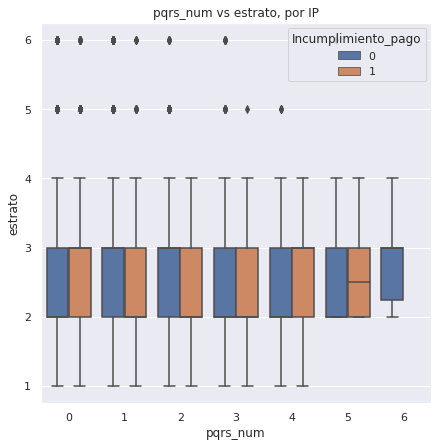

In [ ]:
plt.figure(figsize=(7,7))
sns.boxplot(x='pqrs_num',y='estrato', hue=IP, data=df_final) #estrato=f(pqrs_num)
plt.title('pqrs_num vs estrato, por IP')
plt.show()

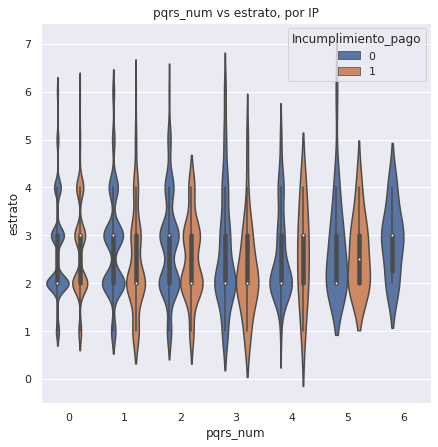

In [ ]:
plt.figure(figsize=(7,7))
sns.violinplot(x='pqrs_num',y='estrato', hue=IP, data=df_final) #estrato=f(pqrs_num)
plt.title('pqrs_num vs estrato, por IP')
plt.show()

In [ ]:
df_final.head(0)

,estrato,antiguedad_meses,asesoria_factura,pedidos_peticiones,reagendamiento,asesoria_servicios,retencion,Otras,quejas_fraude,traslado,Incumplimiento_pago,productoTO,productoTV,productoBA,portafolio_num,pqrs_num


# Análisis Inferencial:

**Statistical hypothesis testing**:

Some hypotheses seen graphically in the previous sections, were validated, such
as:

In [ ]:
df_final.head(0)

,estrato,antiguedad_meses,asesoria_factura,pedidos_peticiones,reagendamiento,asesoria_servicios,retencion,Otras,quejas_fraude,traslado,Incumplimiento_pago,productoTO,productoTV,productoBA,portafolio_num,pqrs_num


**Independence among variables analysis using chi-square:**

#### Chi-square test 

We use the **chi-square test** when we have two categorical variables from a single population. It is used to determine whether there is a significant association between the two variables.

For example, in an election survey, voters might be classified by gender (male or female) and voting preference (Democrat, Republican, or Independent). We could use a chi-square test for independence to determine whether gender is related to voting preference:

In [ ]:
from scipy.stats import chi2

# antiguedad_meses vs estrato

In [ ]:
contingency_table=pd.crosstab(df_final["antiguedad_meses"],df_final["estrato"])
print('contingency_table :\n',contingency_table)


#Observed Values
Observed_Values = contingency_table.values 
print("Observed Values :\n",Observed_Values)

b=stats.chi2_contingency(contingency_table)
Expected_Values = b[3]
print("Expected Values :\n",Expected_Values)

no_of_rows=len(contingency_table.iloc[0:2,0])
no_of_columns=len(contingency_table.iloc[0,0:2])
ddof=(no_of_rows-1)*(no_of_columns-1)
print("Degree of Freedom:-",ddof)

alpha = 0.05
chi_square=sum([(o-e)**2./e for o,e in zip(Observed_Values,Expected_Values)])
chi_square_statistic=chi_square[0]+chi_square[1]
print("chi-square statistic:-",chi_square_statistic)

critical_value=chi2.ppf(q=1-alpha,df=ddof)
print('critical_value:',critical_value)


#p-value
p_value=1-chi2.cdf(x=chi_square_statistic,df=ddof)
print('p-value:',p_value)
print('Significance level: ',alpha)
print('Degree of Freedom: ',ddof)
print('chi-square statistic:',chi_square_statistic)
print('critical_value:',critical_value)
print('p-value:',p_value)

if chi_square_statistic>=critical_value:
    print("Reject H0,There is a relationship between 2 categorical variables")
else:
    print("Retain H0,There is no relationship between 2 categorical variables")
    
if p_value<=alpha:
    print("Reject H0,There is a relationship between 2 categorical variables")
else:
    print("Retain H0,There is no relationship between 2 categorical variables")

contingency_table :
 estrato             1     2    3    4   5   6
antiguedad_meses                             
0.0               132  1895  489  357  26  11
1.0                38   157  116   95  13  13
2.0                33   165  142  108  11   4
3.0                45   175  157  102  10   5
4.0                60   363  296  104  17  13
...               ...   ...  ...  ...  ..  ..
304.0               0     0    3    0   0   0
308.0               0     0    0    1   0   0
335.0               0     2    0    0   0   0
336.0               0     0    4    3   0   0
337.0               0     1    3    4   0   0

[233 rows x 6 columns]
Observed Values :
 [[ 132 1895  489  357   26   11]
 [  38  157  116   95   13   13]
 [  33  165  142  108   11    4]
 ...
 [   0    2    0    0    0    0]
 [   0    0    4    3    0    0]
 [   0    1    3    4    0    0]]
Expected Values :
 [[1.93348210e+02 1.31360044e+03 8.21401565e+02 4.31057065e+02
  9.77685287e+01 5.28241902e+01]
 [2.87032394e+01 1.9

**Así, como H0 es que las dos variables (antiguedad_meses, estrato) sean  INDEPENDIENTES, entonces los resultados arrojaron que hay una relación entre dichas dos variables.**

#antiguedad_meses vs portafolio_num

In [ ]:
contingency_table=pd.crosstab(df_final["antiguedad_meses"],df_final["portafolio_num"])
print('contingency_table :\n',contingency_table)


#Observed Values
Observed_Values = contingency_table.values 
print("Observed Values :\n",Observed_Values)

b=stats.chi2_contingency(contingency_table)
Expected_Values = b[3]
print("Expected Values :\n",Expected_Values)

no_of_rows=len(contingency_table.iloc[0:2,0])
no_of_columns=len(contingency_table.iloc[0,0:2])
ddof=(no_of_rows-1)*(no_of_columns-1)
print("Degree of Freedom:-",ddof)

alpha = 0.05
chi_square=sum([(o-e)**2./e for o,e in zip(Observed_Values,Expected_Values)])
chi_square_statistic=chi_square[0]+chi_square[1]
print("chi-square statistic:-",chi_square_statistic)

critical_value=chi2.ppf(q=1-alpha,df=ddof)
print('critical_value:',critical_value)


#p-value
p_value=1-chi2.cdf(x=chi_square_statistic,df=ddof)
print('p-value:',p_value)
print('Significance level: ',alpha)
print('Degree of Freedom: ',ddof)
print('chi-square statistic:',chi_square_statistic)
print('critical_value:',critical_value)
print('p-value:',p_value)

if chi_square_statistic>=critical_value:
    print("Reject H0,There is a relationship between 2 categorical variables")
else:
    print("Retain H0,There is no relationship between 2 categorical variables")
    
if p_value<=alpha:
    print("Reject H0,There is a relationship between 2 categorical variables")
else:
    print("Retain H0,There is no relationship between 2 categorical variables")

contingency_table :
 portafolio_num      1    2     3
antiguedad_meses                
0.0               827  892  1191
1.0               151   86   195
2.0               120  108   235
3.0               101   95   298
4.0               123  144   586
...               ...  ...   ...
304.0               0    0     3
308.0               1    0     0
335.0               0    2     0
336.0               5    2     0
337.0               8    0     0

[233 rows x 3 columns]
Observed Values :
 [[ 827  892 1191]
 [ 151   86  195]
 [ 120  108  235]
 [ 101   95  298]
 [ 123  144  586]
 [ 119   92  369]
 [ 107  148  342]
 [  73  116  224]
 [  45   76  162]
 [  68   91  155]
 [  63   78  125]
 [  80   88  129]
 [  93  113  102]
 [  91   89  174]
 [  63   58  138]
 [  71   76   87]
 [  80   64   87]
 [  62   65   95]
 [  90   78  115]
 [  72   53  146]
 [  53   39   70]
 [  75   44   87]
 [  50   44   57]
 [  57   40   72]
 [  59   34   62]
 [  57   42   69]
 [  44   35   54]
 [  47   29   51]
 [ 

**Así, como H0 es que las dos variables (antiguedad_meses, portafolio_num) sean  INDEPENDIENTES, entonces los resultados arrojaron que hay una relación entre dichas dos variables.**

# antiguedad_meses, pqrs_num

In [ ]:
contingency_table=pd.crosstab(df_final["antiguedad_meses"],df_final["pqrs_num"])
print('contingency_table :\n',contingency_table)


#Observed Values
Observed_Values = contingency_table.values 
print("Observed Values :\n",Observed_Values)

b=stats.chi2_contingency(contingency_table)
Expected_Values = b[3]
print("Expected Values :\n",Expected_Values)

no_of_rows=len(contingency_table.iloc[0:2,0])
no_of_columns=len(contingency_table.iloc[0,0:2])
ddof=(no_of_rows-1)*(no_of_columns-1)
print("Degree of Freedom:-",ddof)

alpha = 0.05
chi_square=sum([(o-e)**2./e for o,e in zip(Observed_Values,Expected_Values)])
chi_square_statistic=chi_square[0]+chi_square[1]
print("chi-square statistic:-",chi_square_statistic)

critical_value=chi2.ppf(q=1-alpha,df=ddof)
print('critical_value:',critical_value)


#p-value
p_value=1-chi2.cdf(x=chi_square_statistic,df=ddof)
print('p-value:',p_value)
print('Significance level: ',alpha)
print('Degree of Freedom: ',ddof)
print('chi-square statistic:',chi_square_statistic)
print('critical_value:',critical_value)
print('p-value:',p_value)

if chi_square_statistic>=critical_value:
    print("Reject H0,There is a relationship between 2 categorical variables")
else:
    print("Retain H0,There is no relationship between 2 categorical variables")
    
if p_value<=alpha:
    print("Reject H0,There is a relationship between 2 categorical variables")
else:
    print("Retain H0,There is no relationship between 2 categorical variables")

contingency_table :
 pqrs_num             0    1   2   3  4  5  6
antiguedad_meses                            
0.0               2717  140  34  12  7  0  0
1.0                342   70  13   4  3  0  0
2.0                372   59  13  14  3  0  2
3.0                360   92  26  11  4  0  1
4.0                639  169  30   9  6  0  0
...                ...  ...  ..  .. .. .. ..
304.0                3    0   0   0  0  0  0
308.0                1    0   0   0  0  0  0
335.0                2    0   0   0  0  0  0
336.0                7    0   0   0  0  0  0
337.0                7    1   0   0  0  0  0

[233 rows x 7 columns]
Observed Values :
 [[2717  140   34 ...    7    0    0]
 [ 342   70   13 ...    3    0    0]
 [ 372   59   13 ...    3    0    2]
 ...
 [   2    0    0 ...    0    0    0]
 [   7    0    0 ...    0    0    0]
 [   7    1    0 ...    0    0    0]]
Expected Values :
 [[2.41707151e+03 3.40730619e+02 9.54337579e+01 ... 1.37167787e+01
  4.52361849e+00 1.45923177e+00]
 [3.5

**Así, como H0 es que las dos variables (antiguedad_meses, pqrs_num) sean  INDEPENDIENTES, entonces los resultados arrojaron que hay una relación entre dichas dos variables.**

#estrato vs portafolio_num:

In [ ]:
contingency_table=pd.crosstab(df_final["estrato"],df_final["portafolio_num"])
print('contingency_table :\n',contingency_table)

contingency_table :
 portafolio_num     1     2     3
estrato                         
1                505   360   460
2               2969  2645  3388
3               1903  1382  2344
4                934   708  1312
5                265   114   291
6                153    71   138


In [ ]:
from scipy.stats import chi2

#Observed Values
Observed_Values = contingency_table.values 
print("Observed Values :\n",Observed_Values)

b=stats.chi2_contingency(contingency_table)
Expected_Values = b[3]
print("Expected Values :\n",Expected_Values)

no_of_rows=len(contingency_table.iloc[0:2,0])
no_of_columns=len(contingency_table.iloc[0,0:2])
ddof=(no_of_rows-1)*(no_of_columns-1)
print("Degree of Freedom:-",ddof)

alpha = 0.05
chi_square=sum([(o-e)**2./e for o,e in zip(Observed_Values,Expected_Values)])
chi_square_statistic=chi_square[0]+chi_square[1]
print("chi-square statistic:-",chi_square_statistic)

critical_value=chi2.ppf(q=1-alpha,df=ddof)
print('critical_value:',critical_value)

Observed Values :
 [[ 505  360  460]
 [2969 2645 3388]
 [1903 1382 2344]
 [ 934  708 1312]
 [ 265  114  291]
 [ 153   71  138]]
Expected Values :
 [[ 447.09281918  350.81737037  527.08981045]
 [3037.53174205 2383.43997593 3581.02828202]
 [1899.38526728 1490.37809648 2239.23663625]
 [ 996.76391535  782.12416006 1175.11192458]
 [ 226.07712366  177.39444389  266.52843245]
 [ 122.14913248   95.84595326  144.00491425]]
Degree of Freedom:- 1
chi-square statistic:- 100.44422771685542
critical_value: 3.841458820694124


In [ ]:
#p-value
p_value=1-chi2.cdf(x=chi_square_statistic,df=ddof)
print('p-value:',p_value)
print('Significance level: ',alpha)
print('Degree of Freedom: ',ddof)
print('chi-square statistic:',chi_square_statistic)
print('critical_value:',critical_value)
print('p-value:',p_value)

if chi_square_statistic>=critical_value:
    print("Reject H0,There is a relationship between 2 categorical variables")
else:
    print("Retain H0,There is no relationship between 2 categorical variables")
    
if p_value<=alpha:
    print("Reject H0,There is a relationship between 2 categorical variables")
else:
    print("Retain H0,There is no relationship between 2 categorical variables")

p-value: 0.0
Significance level:  0.05
Degree of Freedom:  1
chi-square statistic: 100.44422771685542
critical_value: 3.841458820694124
p-value: 0.0
Reject H0,There is a relationship between 2 categorical variables
Reject H0,There is a relationship between 2 categorical variables


**Así, como H0 es que las dos variables (estrato, portafolio_num) sean  INDEPENDIENTES, entonces los resultados arrojaron que hay una relación entre dichas dos variables.**

#estrato vs pqrs_num:

In [ ]:
contingency_table=pd.crosstab(df_final["estrato"],df_final["pqrs_num"])
print('contingency_table :\n',contingency_table)

contingency_table :
 pqrs_num     0    1    2    3   4   5  6
estrato                                 
1         1048  192   50   31   4   0  0
2         7659  909  246  117  52  16  3
3         4575  744  221   54  20  10  5
4         2458  345   99   31  15   4  2
5          535   88   31   13   3   0  0
6          289   57    7    8   0   1  0


In [ ]:
#Observed Values
Observed_Values = contingency_table.values 
print("Observed Values :\n",Observed_Values)

b=stats.chi2_contingency(contingency_table)
Expected_Values = b[3]
print("Expected Values :\n",Expected_Values)

no_of_rows=len(contingency_table.iloc[0:2,0])
no_of_columns=len(contingency_table.iloc[0,0:2])
ddof=(no_of_rows-1)*(no_of_columns-1)
print("Degree of Freedom:-",ddof)

alpha = 0.05
chi_square=sum([(o-e)**2./e for o,e in zip(Observed_Values,Expected_Values)])
chi_square_statistic=chi_square[0]+chi_square[1]
print("chi-square statistic:-",chi_square_statistic)

critical_value=chi2.ppf(q=1-alpha,df=ddof)
print('critical_value:',critical_value)

Observed Values :
 [[1048  192   50   31    4    0    0]
 [7659  909  246  117   52   16    3]
 [4575  744  221   54   20   10    5]
 [2458  345   99   31   15    4    2]
 [ 535   88   31   13    3    0    0]
 [ 289   57    7    8    0    1    0]]
Expected Values :
 [[1.10055661e+03 1.55143667e+02 4.34535152e+01 1.68764417e+01
  6.24561228e+00 2.05972320e+00 6.64426838e-01]
 [7.47714011e+03 1.05404022e+03 2.95221542e+02 1.14657908e+02
  4.24324541e+01 1.39936817e+01 4.51409086e+00]
 [4.67549674e+03 6.59097132e+02 1.84603651e+02 7.16962190e+01
  2.65332464e+01 8.75032595e+00 2.82268579e+00]
 [2.45361829e+03 3.45882559e+02 9.68767426e+01 3.76249122e+01
  1.39241801e+01 4.59201685e+00 1.48129576e+00]
 [5.56507873e+02 7.84500050e+01 2.19727209e+01 8.53374787e+00
  3.15815866e+00 1.04152041e+00 3.35974326e-01]
 [3.00680373e+02 4.23864206e+01 1.18718283e+01 4.61077124e+00
  1.70634841e+00 5.62731923e-01 1.81526427e-01]]
Degree of Freedom:- 1
chi-square statistic:- 56.23982043282993
critical_

In [ ]:
#p-value
p_value=1-chi2.cdf(x=chi_square_statistic,df=ddof)
print('p-value:',p_value)
print('Significance level: ',alpha)
print('Degree of Freedom: ',ddof)
print('chi-square statistic:',chi_square_statistic)
print('critical_value:',critical_value)
print('p-value:',p_value)

if chi_square_statistic>=critical_value:
    print("Reject H0,There is a relationship between 2 categorical variables")
else:
    print("Retain H0,There is no relationship between 2 categorical variables")
    
if p_value<=alpha:
    print("Reject H0,There is a relationship between 2 categorical variables")
else:
    print("Retain H0,There is no relationship between 2 categorical variables")

p-value: 6.417089082333405e-14
Significance level:  0.05
Degree of Freedom:  1
chi-square statistic: 56.23982043282993
critical_value: 3.841458820694124
p-value: 6.417089082333405e-14
Reject H0,There is a relationship between 2 categorical variables
Reject H0,There is a relationship between 2 categorical variables


**Así, como H0 es que las dos variables (estrato, pqrs_num) sean  INDEPENDIENTES, entonces los resultados arrojaron que hay una relación entre dichas dos variables.**

#portafolio_num vs pqrs_num

In [ ]:
contingency_table=pd.crosstab(df_final["portafolio_num"],df_final["pqrs_num"])
print('contingency_table :\n',contingency_table)


#Observed Values
Observed_Values = contingency_table.values 
print("Observed Values :\n",Observed_Values)

b=stats.chi2_contingency(contingency_table)
Expected_Values = b[3]
print("Expected Values :\n",Expected_Values)

no_of_rows=len(contingency_table.iloc[0:2,0])
no_of_columns=len(contingency_table.iloc[0,0:2])
ddof=(no_of_rows-1)*(no_of_columns-1)
print("Degree of Freedom:-",ddof)

alpha = 0.05
chi_square=sum([(o-e)**2./e for o,e in zip(Observed_Values,Expected_Values)])
chi_square_statistic=chi_square[0]+chi_square[1]
print("chi-square statistic:-",chi_square_statistic)

critical_value=chi2.ppf(q=1-alpha,df=ddof)
print('critical_value:',critical_value)


#p-value
p_value=1-chi2.cdf(x=chi_square_statistic,df=ddof)
print('p-value:',p_value)
print('Significance level: ',alpha)
print('Degree of Freedom: ',ddof)
print('chi-square statistic:',chi_square_statistic)
print('critical_value:',critical_value)
print('p-value:',p_value)

if chi_square_statistic>=critical_value:
    print("Reject H0,There is a relationship between 2 categorical variables")
else:
    print("Retain H0,There is no relationship between 2 categorical variables")
    
if p_value<=alpha:
    print("Reject H0,There is a relationship between 2 categorical variables")
else:
    print("Retain H0,There is no relationship between 2 categorical variables")

contingency_table :
 pqrs_num           0     1    2   3   4   5  6
portafolio_num                                
1               5631   735  228  89  37   6  3
2               4456   573  147  72  24   4  4
3               6477  1027  279  93  33  21  3
Observed Values :
 [[5631  735  228   89   37    6    3]
 [4456  573  147   72   24    4    4]
 [6477 1027  279   93   33   21    3]]
Expected Values :
 [[5.58916638e+03 7.87895647e+02 2.20678267e+02 8.57068499e+01
  3.17182830e+01 1.04602848e+01 3.37428543e+00]
 [4.38561428e+03 6.18232875e+02 1.73158159e+02 6.72510280e+01
  2.48881757e+01 8.20780263e+00 2.64767827e+00]
 [6.58921934e+03 9.28871477e+02 2.60163574e+02 1.01042122e+02
  3.73935413e+01 1.23319125e+01 3.97803631e+00]]
Degree of Freedom:- 1
chi-square statistic:- 20.581117256461482
critical_value: 3.841458820694124
p-value: 5.7157110425754e-06
Significance level:  0.05
Degree of Freedom:  1
chi-square statistic: 20.581117256461482
critical_value: 3.841458820694124
p-value: 5

**Así, como H0 es que las dos variables (portafolio_num, pqrs_num) sean INDEPENDIENTES, entonces los resultados arrojaron que hay una relación entre dichas dos variables.**

*Conclusion:*

The chi-square test verifies that the associations between any given pair form the above vars (`estrato`, `antiguedad_meses` , `portafolio_num`, `pqrs_num`) are indeed statistically significant.

***El estadístico ji-cuadrado (o chi cuadrado)***, que tiene distribución de probabilidad del mismo nombre, sirve para someter a prueba hipótesis referidas a distribuciones de frecuencias. En términos generales, esta prueba contrasta frecuencias observadas con las frecuencias esperadas de acuerdo con la hipótesis nula.

***Interpretación:*** El estadístico chi-cuadrado tomará un valor igual a 0 si existe concordancia perfecta entre las frecuencias observadas y las esperadas; por contra, el estadístico tomará un valor grande si existe una gran discrepancia entre estas frecuencias, y consecuentemente se deberá rechazar la hipótesis nula. 

***(Chi_squared=x^2 es inversamente proporcional a pvalue!)***

Fuente: https://psicologiaymente.com/miscelanea/prueba-chi-cuadrado

*Here are a few more figures which look at the relationship between other numerical covariates and the probability of default:*

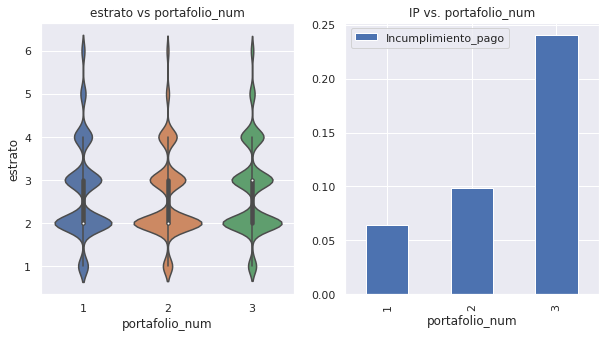

In [ ]:
fig, (ax1, ax2) = plt.subplots(figsize = (10,5), ncols=2, sharey= False)
sns.violinplot(x='portafolio_num', y = 'estrato', data = df_final, showfliers=False, ax = ax1) #showfliers=False for nice display
ax1.set_title("estrato vs portafolio_num")
df_final[["portafolio_num",IP]].groupby("portafolio_num").mean().plot.bar(rot=90,ax = ax2)
plt.title("IP vs. portafolio_num");

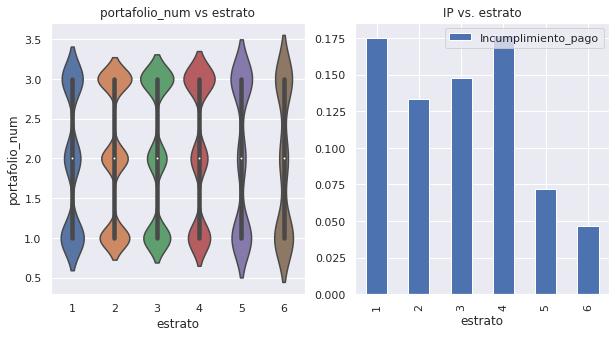

In [ ]:
fig, (ax1, ax2) = plt.subplots(figsize = (10,5), ncols=2, sharey= False)
sns.violinplot(x='estrato', y = 'portafolio_num', data = df_final, showfliers=False, ax = ax1) #showfliers=False for nice display
ax1.set_title("portafolio_num vs estrato")
df_final[["estrato",IP]].groupby("estrato").mean().plot.bar(rot=90,ax = ax2)
plt.title("IP vs. estrato");

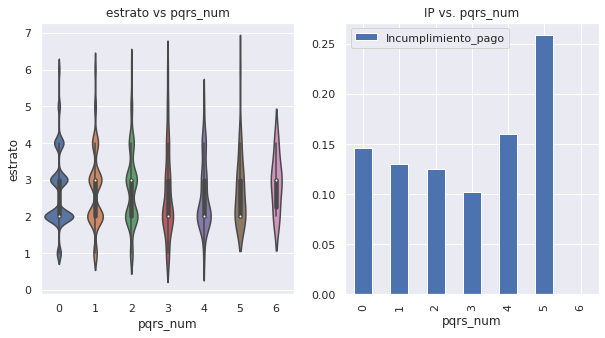

In [ ]:
fig, (ax1, ax2) = plt.subplots(figsize = (10,5), ncols=2, sharey= False)
sns.violinplot(x='pqrs_num', y = 'estrato', data = df_final, showfliers=False, ax = ax1) #showfliers=False for nice display
ax1.set_title("estrato vs pqrs_num")
df_final[["pqrs_num",IP]].groupby("pqrs_num").mean().plot.bar(rot=90,ax = ax2)
plt.title("IP vs. pqrs_num");

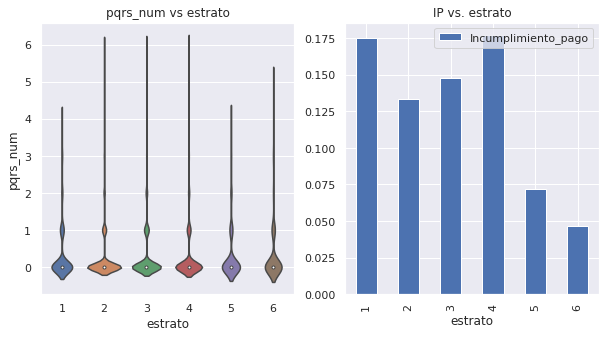

In [ ]:
fig, (ax1, ax2) = plt.subplots(figsize = (10,5), ncols=2, sharey= False)
sns.violinplot(x='estrato', y = 'pqrs_num', data = df_final, showfliers=False, ax = ax1) #showfliers=False for nice display
ax1.set_title("pqrs_num vs estrato")
df_final[["estrato",IP]].groupby("estrato").mean().plot.bar(rot=90,ax = ax2)
plt.title("IP vs. estrato");

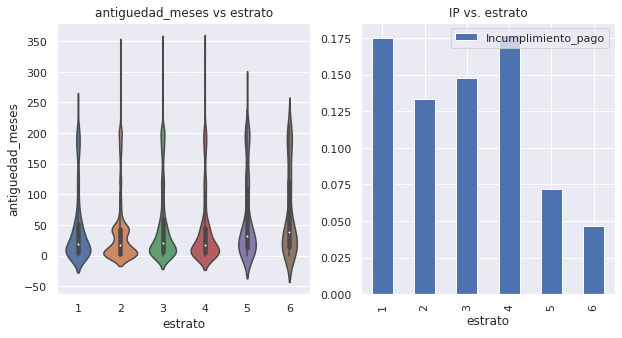

In [ ]:
fig, (ax1, ax2) = plt.subplots(figsize = (10,5), ncols=2, sharey= False)
sns.violinplot(x='estrato', y = 'antiguedad_meses', data = df_final, showfliers=False, ax = ax1) #showfliers=False for nice display
ax1.set_title("antiguedad_meses vs estrato")
df_final[["estrato",IP]].groupby("estrato").mean().plot.bar(rot=90,ax = ax2)
plt.title("IP vs. estrato");

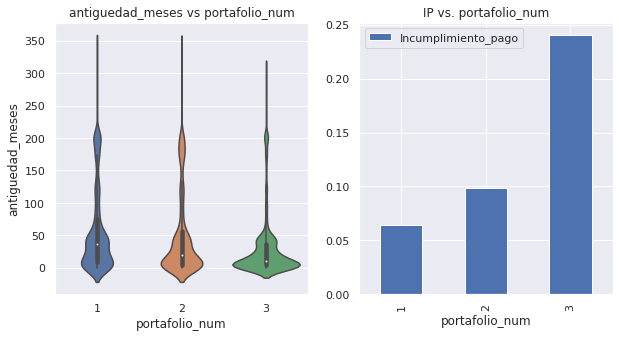

In [ ]:
fig, (ax1, ax2) = plt.subplots(figsize = (10,5), ncols=2, sharey= False)
sns.violinplot(x='portafolio_num', y = 'antiguedad_meses', data = df_final, showfliers=False, ax = ax1) #showfliers=False for nice display
ax1.set_title("antiguedad_meses vs portafolio_num")
df_final[["portafolio_num",IP]].groupby("portafolio_num").mean().plot.bar(rot=90,ax = ax2)
plt.title("IP vs. portafolio_num");

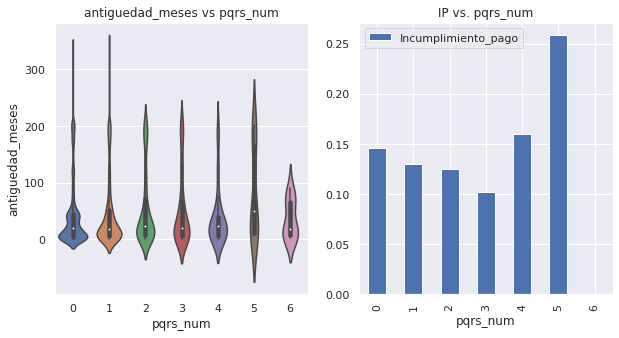

In [ ]:
fig, (ax1, ax2) = plt.subplots(figsize = (10,5), ncols=2, sharey= False)
sns.violinplot(x='pqrs_num', y = 'antiguedad_meses', data = df_final, showfliers=False, ax = ax1) #showfliers=False for nice display
ax1.set_title("antiguedad_meses vs pqrs_num")
df_final[["pqrs_num",IP]].groupby("pqrs_num").mean().plot.bar(rot=90,ax = ax2)
plt.title("IP vs. pqrs_num");

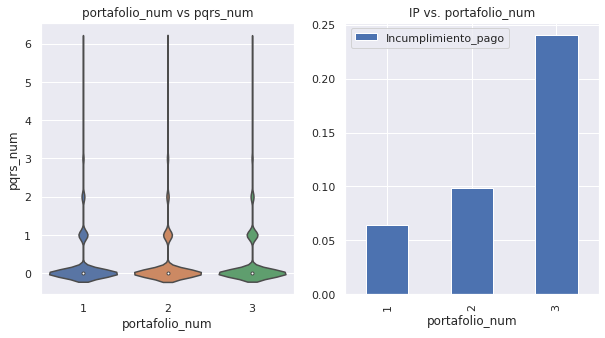

In [ ]:
fig, (ax1, ax2) = plt.subplots(figsize = (10,5), ncols=2, sharey= False)
sns.violinplot(x='portafolio_num', y = 'pqrs_num', data = df_final, showfliers=False, ax = ax1) #showfliers=False for nice display
ax1.set_title("portafolio_num vs pqrs_num")
df_final[["portafolio_num",IP]].groupby("portafolio_num").mean().plot.bar(rot=90,ax = ax2)
plt.title("IP vs. portafolio_num");

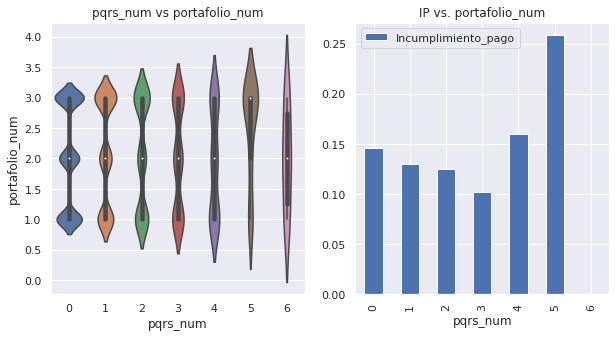

In [ ]:
fig, (ax1, ax2) = plt.subplots(figsize = (10,5), ncols=2, sharey= False)
sns.violinplot(x='pqrs_num', y = 'portafolio_num', data = df_final, showfliers=False, ax = ax1) #showfliers=False for nice display
ax1.set_title("pqrs_num vs portafolio_num")
df_final[["pqrs_num",IP]].groupby("pqrs_num").mean().plot.bar(rot=90,ax = ax2)
plt.title("IP vs. portafolio_num");

# Crosstab:

In [ ]:
def get_ct_stra(stra_var):
    ct_stra = pd.crosstab(index=[stra_var,df_final.portafolio_num], columns = df_final[IP], margins = True)
    ct_stra['IP(%)'] = round(ct_stra[1]/ct_stra['All']*100,2)
    return ct_stra.drop(columns='All').drop('All', level=0)

In [ ]:
get_ct_stra(df_final.estrato)

Incumplimiento_pago        0    1  IP(%)
estrato portafolio_num                  
1       1                461   44   8.71
        2                303   57  15.83
        3                329  131  28.48
2       1               2817  152   5.12
        2               2401  244   9.22
        3               2581  807  23.82
3       1               1787  116   6.10
        2               1250  132   9.55
        3               1759  585  24.96
4       1                831  103  11.03
        2                627   81  11.44
        3                974  338  25.76
5       1                254   11   4.15
        2                108    6   5.26
        3                260   31  10.65
6       1                148    5   3.27
        2                 71    0   0.00
        3                126   12   8.70

In [ ]:
get_ct_stra(df_final.pqrs_num)

Incumplimiento_pago         0     1  IP(%)
pqrs_num portafolio_num                   
0        1               5270   361   6.41
         2               4020   436   9.78
         3               4854  1623  25.06
1        1                690    45   6.12
         2                511    62  10.82
         3                830   197  19.18
2        1                217    11   4.82
         2                130    17  11.56
         3                225    54  19.35
3        1                 81     8   8.99
         2                 69     3   4.17
         3                 78    15  16.13
4        1                 33     4  10.81
         2                 22     2   8.33
         3                 24     9  27.27
5        1                  4     2  33.33
         2                  4     0   0.00
         3                 15     6  28.57
6        1                  3     0   0.00
         2                  4     0   0.00
         3                  3     0   0.00

In [ ]:
def get_ct_stra2(stra_var1, stra_var2):
    ct_stra = pd.crosstab(index=[stra_var1, stra_var2], columns = df_final[IP], margins = True)
    ct_stra['IP(%)'] = round(ct_stra[1]/ct_stra['All']*100,2)
    return ct_stra.drop(columns='All').drop('All', level=0)

In [ ]:
get_ct_stra2(df_final.estrato, df_final.pqrs_num)

Incumplimiento_pago     0     1  IP(%)
estrato pqrs_num                      
1       0             875   173  16.51
        1             146    46  23.96
        2              43     7  14.00
        3              27     4  12.90
        4               2     2  50.00
2       0            6653  1006  13.13
        1             772   137  15.07
        2             209    37  15.04
        3             103    14  11.97
        4              47     5   9.62
        5              12     4  25.00
        6               3     0   0.00
3       0            3857   718  15.69
        1             671    73   9.81
        2             193    28  12.67
        3              48     6  11.11
        4              15     5  25.00
        5               7     3  30.00
        6               5     0   0.00
4       0            1986   472  19.20
        1             310    35  10.14
        2              89    10  10.10
        3              30     1   3.23
        4              12     3  20.00
        5               3     1  25.00
        6               2     0   0.00
5       0             497    38   7.10
        1              79     9  10.23
        2              31     0   0.00
        3              12     1   7.69
        4               3     0   0.00
6       0             276    13   4.50
        1              53     4   7.02
        2               7     0   0.00
        3               8     0   0.00
        5               1     0   0.00

In [ ]:
def get_ct_stra3(stra_var1, stra_var2, stra_var3):
    ct_stra = pd.crosstab(index=[stra_var1, stra_var2, stra_var3], columns = df_final[IP], margins = True)
    ct_stra['IP(%)'] = round(ct_stra[1]/ct_stra['All']*100,2)
    return ct_stra.drop(columns='All').drop('All', level=0)

In [ ]:
get_ct_stra3(df_final.estrato, df_final.portafolio_num, df_final.pqrs_num)

Incumplimiento_pago                0   1  IP(%)
estrato portafolio_num pqrs_num                
1       1              0         366  36   8.96
                       1          56   7  11.11
                       2          28   0   0.00
                       3           9   1  10.00
                       4           2   0   0.00
...                              ...  ..    ...
6       2              3           4   0   0.00
        3              0         105   9   7.89
                       1          12   3  20.00
                       2           6   0   0.00
                       3           3   0   0.00

[94 rows x 3 columns]

# More about Logistic Regression:

Let's see how one can run a logistic regression model using the `statsmodels.api` function `Logit`:

In [ ]:
#Without normalization
df_log1 = df_final[['estrato',IP]]
df_log1['Intercept'] = 1

logit1 = sm.Logit(df_log1[IP], df_log1[['Intercept','estrato']])
logit1_res = logit1.fit()
logit1_res.summary()

Optimization terminated successfully.
         Current function value: 0.410571
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                            Logit Regression Results                           
===============================================================================
Dep. Variable:     Incumplimiento_pago   No. Observations:                19942
Model:                           Logit   Df Residuals:                    19940
Method:                            MLE   Df Model:                            1
Date:                 Tue, 06 Apr 2021   Pseudo R-squ.:               0.0002368
Time:                         12:11:31   Log-Likelihood:                -8187.6
converged:                        True   LL-Null:                       -8189.5
Covariance Type:             nonrobust   LLR p-value:                   0.04889
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.6853      0.056    -29.839      0.000      -1.796      -1.575
estrato       -0.0389      0.020     -1.961      0.050      -0.078   -2.06e-05
==============================================================================
"""

### Interpretation of the coefficients in the output of a logistic regression:
Although the logistic regression model comes with more complexity than standard linear regression, the sign of the regression coefficient still represents the direction of influence of a specific variable: **a positive coefficient means the probability of IP will increase if the associated variable increases and viceversa.** 

The other important part of information when interpreting a logistic regression model is the $p$-value for each regression coefficient. The p-value indicates the result of the following hypothesis test:

$$
H_0: \beta = 0~vs.~ H_A: \beta \neq 0.
$$

The test determines if the difference in the probability of IP is associated with changes in the corresponding variable.

Sometimes you might find that both the $p$-value and the estimated effect size (regression coefficient) for a variable is small. You should be cautious about this situation as $p$-values are not the only way to determine if variables are important.

For instance, from the results shown above for the model `logit_res`, the coefficients indicate that **when `estrato` increases by 1, the odds of IP decreases by 3.89% (around 4%). Since the $p$-value for the coefficient is NOT smaller than 0.05 (in fact, here it is exactly 0.05=5%), we can NOT conclude that the decreasing trend we observed from the table is not likely due to randomness.**

An important output above is `Pseudo R-squ.`. This metric is similar to R-squared for linear models. If this number is large, then the variables in the model explain a large portion of the drivers of people's tendency NOT to pay  their first bill (IP=1). In our case, the metric is only 0.02%, which means that we have A LOT of room to improve.

**Including more vars as regressors:**

It is important to **normalize** the non-binary variables (`estrato`, `antiguedad_meses`,`portafolio_num`,`pqrs_num`) before fitting the model:

In [ ]:
#With normalization
df_log1n=df_final.copy()
df_log1n['estrato']=(df_log1n['estrato']-df_log1n['estrato'].mean())/df_log1n['estrato'].std()
df_log1n = df_log1n[['estrato',IP]]
df_log1n['Intercept'] = 1

logit1n = sm.Logit(df_log1n[IP], df_log1n[['Intercept','estrato']])
logit1n_res = logit1n.fit()
logit1n_res.summary()

Optimization terminated successfully.
         Current function value: 0.410571
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                            Logit Regression Results                           
===============================================================================
Dep. Variable:     Incumplimiento_pago   No. Observations:                19942
Model:                           Logit   Df Residuals:                    19940
Method:                            MLE   Df Model:                            1
Date:                 Tue, 06 Apr 2021   Pseudo R-squ.:               0.0002368
Time:                         12:11:31   Log-Likelihood:                -8187.6
converged:                        True   LL-Null:                       -8189.5
Covariance Type:             nonrobust   LLR p-value:                   0.04889
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.7898      0.020    -88.479      0.000      -1.829      -1.750
estrato       -0.0402      0.020     -1.961      0.050      -0.080   -2.13e-05
==============================================================================
"""

In [ ]:
#Without normalization
df_log2 = df_final[['estrato', 'antiguedad_meses', IP]]
df_log2['Intercept'] = 1

logit2 = sm.Logit(df_log2[IP], df_log2[['Intercept','estrato','antiguedad_meses']])
logit2_res = logit2.fit()
logit2_res.summary()

Optimization terminated successfully.
         Current function value: 0.397248
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                            Logit Regression Results                           
===============================================================================
Dep. Variable:     Incumplimiento_pago   No. Observations:                19942
Model:                           Logit   Df Residuals:                    19939
Method:                            MLE   Df Model:                            2
Date:                 Tue, 06 Apr 2021   Pseudo R-squ.:                 0.03268
Time:                         12:11:31   Log-Likelihood:                -7921.9
converged:                        True   LL-Null:                       -8189.5
Covariance Type:             nonrobust   LLR p-value:                5.961e-117
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           -1.4208      0.059    -24.236      0.000      -1.536      -1.306
estrato             -0.0041      0.020     -0.201      0.840      -0.044       0.036
antiguedad_meses    -0.0110      0.001    -19.072      0.000      -0.012      -0.010
====================================================================================
"""

In [ ]:
#With normalization
df_log2n=df_final.copy()
df_log2n['estrato']=(df_log2n['estrato']-df_log2n['estrato'].mean())/df_log2n['estrato'].std()
df_log2n['antiguedad_meses']=(df_log2n['antiguedad_meses']-df_log2n['antiguedad_meses'].mean())/df_log2n['antiguedad_meses'].std()
df_log2n = df_log2n[['estrato', 'antiguedad_meses', IP]]
df_log2n['Intercept'] = 1

logit2n = sm.Logit(df_log2n[IP], df_log2n[['Intercept','estrato','antiguedad_meses']])
logit2n_res = logit2n.fit()
logit2n_res.summary()

Optimization terminated successfully.
         Current function value: 0.397248
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                            Logit Regression Results                           
===============================================================================
Dep. Variable:     Incumplimiento_pago   No. Observations:                19942
Model:                           Logit   Df Residuals:                    19939
Method:                            MLE   Df Model:                            2
Date:                 Tue, 06 Apr 2021   Pseudo R-squ.:                 0.03268
Time:                         12:11:31   Log-Likelihood:                -7921.9
converged:                        True   LL-Null:                       -8189.5
Covariance Type:             nonrobust   LLR p-value:                5.961e-117
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           -1.9078      0.023    -82.276      0.000      -1.953      -1.862
estrato             -0.0042      0.021     -0.201      0.840      -0.045       0.037
antiguedad_meses    -0.6375      0.033    -19.072      0.000      -0.703      -0.572
====================================================================================
"""

In [ ]:
#With normalization
df_log2nb=df_final.copy()
df_log2nb['estrato']=(df_log2nb['estrato']-df_log2nb['estrato'].mean())/df_log2nb['estrato'].std()
df_log2nb['portafolio_num']=(df_log2nb['portafolio_num']-df_log2nb['portafolio_num'].mean())/df_log2nb['portafolio_num'].std()
df_log2nb = df_log2nb[['estrato', 'portafolio_num', IP]]
df_log2nb['Intercept'] = 1

logit2nb = sm.Logit(df_log2nb[IP], df_log2nb[['Intercept','estrato','portafolio_num']])
logit2nb_res = logit2nb.fit()
logit2nb_res.summary()

Optimization terminated successfully.
         Current function value: 0.385248
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                            Logit Regression Results                           
===============================================================================
Dep. Variable:     Incumplimiento_pago   No. Observations:                19942
Model:                           Logit   Df Residuals:                    19939
Method:                            MLE   Df Model:                            2
Date:                 Tue, 06 Apr 2021   Pseudo R-squ.:                 0.06190
Time:                         12:11:32   Log-Likelihood:                -7682.6
converged:                        True   LL-Null:                       -8189.5
Covariance Type:             nonrobust   LLR p-value:                6.989e-221
==================================================================================
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         -1.9584      0.024    -83.283      0.000      -2.005      -1.912
estrato           -0.0658      0.021     -3.094      0.002      -0.107      -0.024
portafolio_num     0.7013      0.024     29.384      0.000       0.655       0.748
==================================================================================
"""

In [ ]:
#Without normalization
df_log3 = df_final[['estrato', 'antiguedad_meses','portafolio_num', IP]]
df_log3['Intercept'] = 1

logit3 = sm.Logit(df_log3[IP], df_log3[['Intercept','estrato','antiguedad_meses','portafolio_num']])
logit3_res = logit3.fit()
logit3_res.summary()

Optimization terminated successfully.
         Current function value: 0.378126
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                            Logit Regression Results                           
===============================================================================
Dep. Variable:     Incumplimiento_pago   No. Observations:                19942
Model:                           Logit   Df Residuals:                    19938
Method:                            MLE   Df Model:                            3
Date:                 Tue, 06 Apr 2021   Pseudo R-squ.:                 0.07924
Time:                         12:11:32   Log-Likelihood:                -7540.6
converged:                        True   LL-Null:                       -8189.5
Covariance Type:             nonrobust   LLR p-value:                4.216e-281
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           -3.0832      0.091    -33.910      0.000      -3.261      -2.905
estrato             -0.0339      0.021     -1.615      0.106      -0.075       0.007
antiguedad_meses    -0.0083      0.001    -14.707      0.000      -0.009      -0.007
portafolio_num       0.7305      0.028     25.836      0.000       0.675       0.786
====================================================================================
"""

In [ ]:
#With normalization
df_log3n=df_final.copy()
df_log3n['estrato']=(df_log3n['estrato']-df_log3n['estrato'].mean())/df_log3n['estrato'].std()
df_log3n['antiguedad_meses']=(df_log3n['antiguedad_meses']-df_log3n['antiguedad_meses'].mean())/df_log3n['antiguedad_meses'].std()
df_log3n['portafolio_num']=(df_log3n['portafolio_num']-df_log3n['portafolio_num'].mean())/df_log3n['portafolio_num'].std()
df_log3n = df_log3n[['estrato', 'antiguedad_meses','portafolio_num', IP]]
df_log3n['Intercept'] = 1

logit3n = sm.Logit(df_log3n[IP], df_log3n[['Intercept','estrato','antiguedad_meses','portafolio_num']])
logit3n_res = logit3n.fit()
logit3n_res.summary()

Optimization terminated successfully.
         Current function value: 0.378126
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                            Logit Regression Results                           
===============================================================================
Dep. Variable:     Incumplimiento_pago   No. Observations:                19942
Model:                           Logit   Df Residuals:                    19938
Method:                            MLE   Df Model:                            3
Date:                 Tue, 06 Apr 2021   Pseudo R-squ.:                 0.07924
Time:                         12:11:32   Log-Likelihood:                -7540.6
converged:                        True   LL-Null:                       -8189.5
Covariance Type:             nonrobust   LLR p-value:                4.216e-281
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           -2.0287      0.025    -80.438      0.000      -2.078      -1.979
estrato             -0.0349      0.022     -1.615      0.106      -0.077       0.007
antiguedad_meses    -0.4819      0.033    -14.707      0.000      -0.546      -0.418
portafolio_num       0.6249      0.024     25.836      0.000       0.577       0.672
====================================================================================
"""

In [ ]:
#Without normalization
df_log4 = df_final[['estrato', 'antiguedad_meses','portafolio_num','pqrs_num', IP]]
df_log4['Intercept'] = 1

logit4 = sm.Logit(df_log4[IP], df_log4[['Intercept','estrato','antiguedad_meses','portafolio_num', 'pqrs_num']])
logit4_res = logit4.fit()
logit4_res.summary()

Optimization terminated successfully.
         Current function value: 0.377993
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                            Logit Regression Results                           
===============================================================================
Dep. Variable:     Incumplimiento_pago   No. Observations:                19942
Model:                           Logit   Df Residuals:                    19937
Method:                            MLE   Df Model:                            4
Date:                 Tue, 06 Apr 2021   Pseudo R-squ.:                 0.07956
Time:                         12:11:32   Log-Likelihood:                -7537.9
converged:                        True   LL-Null:                       -8189.5
Covariance Type:             nonrobust   LLR p-value:                6.758e-281
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           -3.0708      0.091    -33.714      0.000      -3.249      -2.892
estrato             -0.0336      0.021     -1.601      0.109      -0.075       0.008
antiguedad_meses    -0.0083      0.001    -14.657      0.000      -0.009      -0.007
portafolio_num       0.7324      0.028     25.882      0.000       0.677       0.788
pqrs_num            -0.0766      0.034     -2.258      0.024      -0.143      -0.010
====================================================================================
"""

In [ ]:
#With normalization
df_log4n=df_final.copy()
df_log4n['estrato']=(df_log4n['estrato']-df_log4n['estrato'].mean())/df_log4n['estrato'].std()
df_log4n['antiguedad_meses']=(df_log4n['antiguedad_meses']-df_log4n['antiguedad_meses'].mean())/df_log4n['antiguedad_meses'].std()
df_log4n['portafolio_num']=(df_log4n['portafolio_num']-df_log4n['portafolio_num'].mean())/df_log4n['portafolio_num'].std()
df_log4n['pqrs_num']=(df_log4n['pqrs_num']-df_log4n['pqrs_num'].mean())/df_log4n['pqrs_num'].std()
df_log4n = df_log4n[['estrato', 'antiguedad_meses','portafolio_num','pqrs_num', IP]]
df_log4n['Intercept'] = 1

logit4n = sm.Logit(df_log4n[IP], df_log4n[['Intercept','estrato','antiguedad_meses','portafolio_num','pqrs_num']])
logit4n_res = logit4n.fit()
logit4n_res.summary()

Optimization terminated successfully.
         Current function value: 0.377993
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                            Logit Regression Results                           
===============================================================================
Dep. Variable:     Incumplimiento_pago   No. Observations:                19942
Model:                           Logit   Df Residuals:                    19937
Method:                            MLE   Df Model:                            4
Date:                 Tue, 06 Apr 2021   Pseudo R-squ.:                 0.07956
Time:                         12:11:32   Log-Likelihood:                -7537.9
converged:                        True   LL-Null:                       -8189.5
Covariance Type:             nonrobust   LLR p-value:                6.758e-281
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           -2.0297      0.025    -80.414      0.000      -2.079      -1.980
estrato             -0.0347      0.022     -1.601      0.109      -0.077       0.008
antiguedad_meses    -0.4804      0.033    -14.657      0.000      -0.545      -0.416
portafolio_num       0.6265      0.024     25.882      0.000       0.579       0.674
pqrs_num            -0.0504      0.022     -2.258      0.024      -0.094      -0.007
====================================================================================
"""

### **Geometric interpretation of logistic regression:**

Logistic regression is easily turned into a **classifer** by choosing a **decision boundary**. That is, picking a cut-off value $c=\log\left(\frac{p}{1-p}\right)$, we can classify using the following rule:

> if $\beta_0 + \beta_1*\text{verification_status} > c$ then Fully Paid; or

> if $\beta_0 + \beta_1*\text{verification_status} \leq c$ then Charged Off

The curve which separates defaulters and non-defaulters, which is defined by the equation $\beta_0 + \beta_1$ `verification_status` $=\log\left(\frac{p}{1-p}\right)$, is the decision boundary determined by model (1) and cut-off value $p$. For example, using the results found above, if we set $p = 0.5$ then:  

> User would be classified as Fully Paid if $\text{verification_status} >\frac{-\beta_0}{\beta_1}\approx 13.334931506849317$

> User would be classified as Charged Off if $\text{verification_status} \leq \frac{-\beta_0}{\beta_1}\approx 13.334931506849317$

Clearly, this decision boundary is useless as we know that the values `verification_status` are always at most $2$ for every user. Thus, we would need to figure out what value for $p$ is gives us the best classification possible. We will expand on this later.  

**antiguedad_meses vs estrato:**

- Recordando los coeficientes de df_log2n:

Intercept	-1.9078	
estrato	-0.0042	
antiguedad_meses	-0.6375	




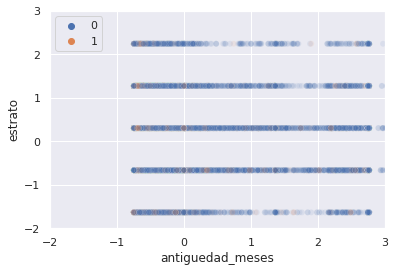

interactive(children=(FloatSlider(value=0.7, description='p', max=0.99, min=0.01, step=0.01), Output()), _dom_…

<function __main__.update>

In [ ]:
b_Intercept= -1.9078 #Here your coeff
b_estrato= -0.0042 #Here your coeff
b_antiguedad_meses= -0.6375 #Here your coeff

#With normalization
df_log2n=df_final.copy()
df_log2n['estrato']=(df_log2n['estrato']-df_log2n['estrato'].mean())/df_log2n['estrato'].std()
df_log2n['antiguedad_meses']=(df_log2n['antiguedad_meses']-df_log2n['antiguedad_meses'].mean())/df_log2n['antiguedad_meses'].std()
df_log2n = df_log2n[['estrato', 'antiguedad_meses', IP]]
df_log2n['Intercept'] = 1

import ipywidgets as widgets
from ipywidgets import interact
#%matplotlib notebook
%matplotlib inline

fig, ax = plt.subplots()
sns.scatterplot(x='antiguedad_meses',y='estrato',hue=IP,data=df_log2n,alpha=0.1,ax=ax)
plt.xlim(-2,3)
plt.ylim(-2,3)
plt.legend()

p=0.7
x1=np.arange(-2,40,3)
y1=(1/b_estrato)*(np.log(p/(1-p))-b_Intercept-b_antiguedad_meses*x1)
l, = plt.plot(x1, y1, lw=2, color='k', label='Current Decision boundary')

def update(p=0.7):
    y1=(1/b_estrato)*(np.log(p/(1-p))-b_Intercept-b_antiguedad_meses*x1)
    l.set_ydata(y1)
    fig.canvas.draw_idle()

interact(update, p=widgets.FloatSlider(value=p,min=0.01,max=0.99,step=0.01))

3.  **Defina los puntos de corte que determinen a que grupo de estrategia pertenece cada cliente.**:



### Evaluating the logistic regression model:

A major drawback of the pseudo $R^2$ metric is that it cannot be directly translated into the prediction accuracy of a model. Remember that the goal of our whole analysis is to predict whether or not a user is going to pay off his debt. But how do we evaluate if the predication is accurate or not? This question is not as simple as it seems and the reason is because logistic models only produce probabilities while what we observed are binary labels.

A straightforward solution is that you can select a cut-off value for the predicted probability such that people with probabilities smaller than the cut-off value are deemed as defaulters. This converts the probabilities into binary labels, after which we can see if the predicted labels are the same as the observed labels to measure prediction accuracy.

- **How might you go about selecting the best cut-off value for a given logistic regression model?:**

**Answer.** One way to do this is with the concepts of `true positive rate` (TPR) and `true negative rate` (TNR). In our context, TPR measures the proportion of people who paid off their debt that are correctly identified by our model, whereas TNR measures the proportion of defaulters that are correctly identified as defaulters.

There is a constant trade-off between TPR and TNR. It is usually hard to find a rule with high TPR and TNR at the same time. People will choose to prioritize one of them based on the particular scenario. For instance, in our case, TNR is usually more important than TPR since we would rather avoid lending to defaulters than miss lending to one good candidate.



**Calculate the TPR and TNR for the model df_log2n using cut-off values $p = 0.8, 0.85, 0.9$. Which of these cut-off values do you think is better? Why?:**

In [ ]:
#b_Intercept=1.9277 
#b_loan_amnt=0.0399 
#b_int_rate=-0.5862 

b_Intercept= -1.9078 #Here your coeff
b_estrato= -0.0042 #Here your coeff
b_antiguedad_meses= -0.6375 #Here your coeff

#matching entre plantilla y modelo de interés:
b_loan_amnt=b_estrato
b_int_rate=b_antiguedad_meses
loan_status=IP 
df6=df_log2n.copy()

def rates(p):
    a= df6[loan_status]
    b=(b_Intercept+b_loan_amnt*df6['estrato']+b_int_rate*df6['antiguedad_meses']>np.log(p/(1-p))).astype('int')
    
    TPR=(a & b).sum(axis=0)/a.sum(axis=0)
    TNR=(1-a & 1-b).sum(axis=0)/(1-a).sum(axis=0)
    return [TPR,TNR]

print('p=0.8 ',rates(0.8))
print('p=0.85 ',rates(0.85))
print('p=0.9 ', rates(0.9))

p=0.8  [0.0, 1.0]
p=0.85  [0.0, 1.0]
p=0.9  [0.0, 1.0]


In [ ]:
print('p=0.7',rates(0.7))
print('p=0.5 ',rates(0.5))
print('p=0.3 ', rates(0.3))

p=0.7 [0.0, 1.0]
p=0.5  [0.0, 1.0]
p=0.3  [0.0, 1.0]


In [ ]:
print('p=0.2',rates(0.2))
print('p=0.15 ',rates(0.15))
print('p=0.1 ', rates(0.1))

p=0.2 [0.0, 1.0]
p=0.15  [0.7523642732049037, 0.46333469889389595]
p=0.1  [0.9274956217162872, 0.20313688769239774]


**Conclusion:**

From here, we see that choosing a cut-off of $p = 0.2$ gives a high TPR and low TNR. This means that this cut-off would correctly classify most good borrowers, but would also miss a considerable number of defaulters. As stated above, this can be problematic as we might end up losing money. 

On the other extreme, $p = 0.1$  would correctly detect a good portion of defaulters, but would also deny many loans to users that will probably pay. Thus, we may end up losing clients to our competitors and miss the opportunity to work with good loaners.

In a more conservative approach, $p = 0.15$ would correctly detect 66% of good loaners and around 64% of defaulters. This could be an alternative as we would not miss much of our potential clients and our risk would be relatively controlled. Nevertheless, we should probably consult with our client on this decision as he might prefer a safer or riskier approach.

**estrato vs portafolio_num:**

Intercept	-1.9584	
estrato	-0.0658	
portafolio_num	0.7013	


In [ ]:
#Intercept	-1.9584	
#estrato	-0.0658	
#portafolio_num	0.7013	

#b_Intercept=1.9277 
#b_loan_amnt=0.0399 
#b_int_rate=-0.5862 

b_Intercept= -1.9584 #Here your coeff
b_estrato= -0.0658 #Here your coeff
b_portafolio_num= 0.7013 #Here your coeff

#matching entre plantilla y modelo de interés:
b_loan_amnt=b_estrato
b_int_rate=b_portafolio_num
loan_status=IP 
df6=df_log2nb.copy()

def rates(p):
    a= df6[loan_status]
    b=(b_Intercept+b_loan_amnt*df6['estrato']+b_int_rate*df6['portafolio_num']>np.log(p/(1-p))).astype('int')
    
    TPR=(a & b).sum(axis=0)/a.sum(axis=0)
    TNR=(1-a & 1-b).sum(axis=0)/(1-a).sum(axis=0)
    return [TPR,TNR]

print('p=0.8 ',rates(0.8))
print('p=0.85 ',rates(0.85))
print('p=0.9 ', rates(0.9))

p=0.8  [0.0, 1.0]
p=0.85  [0.0, 1.0]
p=0.9  [0.0, 1.0]


In [ ]:
print('p=0.2',rates(0.2))
print('p=0.15 ',rates(0.15))
print('p=0.1 ', rates(0.1))

p=0.2 [0.6626970227670753, 0.6545326856674665]
p=0.15  [0.6669001751313485, 0.6471586586293674]
p=0.1  [0.8490367775831874, 0.37273950956867796]


In [ ]:
print('p=0.15',rates(0.15))
print('p=0.1 ',rates(0.1))
print('p=0.05 ', rates(0.05))

p=0.15 [0.6669001751313485, 0.6471586586293674]
p=0.1  [0.8490367775831874, 0.37273950956867796]
p=0.05  [0.9943957968476357, 0.02352665769298297]


In [ ]:
print('p=0.13',rates(0.13))
print('p=0.07 ',rates(0.07))
print('p=0.02 ', rates(0.02))

p=0.13 [0.6868651488616462, 0.6294258793234623]
p=0.07  [0.8490367775831874, 0.3685843038567332]
p=0.02  [1.0, 0.0]


In [ ]:
print('p=0.28',rates(0.28))
print('p=0.16 ',rates(0.16))
print('p=0.08 ', rates(0.08))

p=0.28 [0.0, 1.0]
p=0.16  [0.6669001751313485, 0.6471586586293674]
p=0.08  [0.8490367775831874, 0.3685843038567332]


In [ ]:
print('p=0.25',rates(0.25))
print('p=0.14 ',rates(0.14))
print('p=0.09 ', rates(0.09))

p=0.25 [0.04588441330998249, 0.9807455960671856]
p=0.14  [0.6669001751313485, 0.6471586586293674]
p=0.09  [0.8490367775831874, 0.3685843038567332]


In [ ]:
print('p=0.25',rates(0.25))
print('p=0.15 ',rates(0.15))
print('p=0.05 ', rates(0.05))

p=0.25 [0.04588441330998249, 0.9807455960671856]
p=0.15  [0.6669001751313485, 0.6471586586293674]
p=0.05  [0.9943957968476357, 0.02352665769298297]


In [ ]:
print('p=0.25',rates(0.25))
print('p=0.15 ',rates(0.15))
print('p=0.1 ', rates(0.1))

p=0.25 [0.04588441330998249, 0.9807455960671856]
p=0.15  [0.6669001751313485, 0.6471586586293674]
p=0.1  [0.8490367775831874, 0.37273950956867796]


**En consecuencia, con intuición y por ensayo y error usando el algoritmo anterior, se escogen los puntos de corte que determinen a que grupo de estrategia pertenece cada cliente (alto riesgo de IP, medio riesgo de IP y bajo riesgo de IP).**

Se tienen los tres casos, donde:

- TPR < TNR : descartada, detecta POCOS buenos clientes (4.5%,IP=0) y muchos malos clientes(98%, IP=1))

**- TPR ~ TNR: escogida, detecta el 66% de buenos clientes Y a la vez el 64% de los malos clientes)**

- TPR > TNR : descartada, detecta muchos buenos clientes (84%,IP=0) PERO pocos malos clientes(37%, IP=1))

**Conclusion:**

From here, we see that choosing a cut-off of $p = 0.25$ gives a high TPR and low TNR. This means that this cut-off would correctly classify most good borrowers, but would also miss a considerable number of defaulters. As stated above, this can be problematic as we might end up losing money. 

On the other extreme, $p = 0.1$  would correctly detect a good portion of defaulters, but would also deny many loans to users that will probably pay. Thus, we may end up losing clients to our competitors and miss the opportunity to work with good loaners.

In a more conservative approach, $p = 0.15$ would correctly detect 66% of good loaners and around 64% of defaulters. This could be an alternative as we would not miss much of our potential clients and our risk would be relatively controlled. Nevertheless, we should probably consult with our client on this decision as he might prefer a safer or riskier approach.

#FINALMENTE PARA TERMINAR EL CASO:

Tener en cuenta que en todo lo realizado hasta ahora, ya se han abordado de alguna manera los requerimientos 4-7.

Sin embargo, escribiré la respuesta general a tales requerimientos pendientes:


**4. Describa el perfil de los clientes con un alto riesgo de no pago:**



Basado en df_log4n:


En general, en concordancia con los resultados obtenidos en el EDA y despues de la construcción del modelo de regresión logística, las características son:

- no son de estratos altos 
- tienen poca antiguedad
- su portafolio es alto
- efectuan pocas pqrs 

**5. ¿Qué sugerencias haría usted al equipo de cobranzas de acuerdo con el análisis de la información del modelo?:**


**Recordar que:**

Una de las operaciones de cobranzas de la compañía quiere generar estrategias diferenciadas para el proceso de gestión de recuperación de cartera de clientes de acuerdo con el riesgo de no pago de la primera factura.

La estrategia se divide en 3 grupos de intervención:

1. Alto riesgo: Llamarlos al 5 día de mora.
2. Medio riesgo: Enviar mensaje de texto al 5 día de mora.
3. Bajo riesgo: Enviar mensaje de texto al día 15 de mora.

Los costos por cada tipo de contacto son los siguientes:

- Llamada asesor de cobranza 1700 pesos
- Mensaje de texto 40 pesos

**Mis sugerencias serían las siguientes:**

- Como los resultados de la columna de probabilidad de IP sirven para evaluar a cada cliente y clasificarlo dentro de los tres grupos, ya queda sencillo abordar de forma diferenciada a cada cliente
- De acuerdo al grupo de cada cliente se puede estimar los costos segun sea el contacto
- Finalmente, se puede tambien tener una columna de costos por cliente y así terminar la gestión de cobranza , teniendo en cuenta otra columna de tiempo que se tendrá que registrar para cuantificar los costos definitivos por cliente y con eso los gastos totales mes a mes que servirán de insumo a la contabilidad de la compañía


- **6. Explique el modelo y sustente su validez estadística, así como los puntos de corte, la cantidad de clientes que pertenecen a cada estrategia, los perfiles de riesgo y sus sugerencias y conclusiones**

- **7. Adjunte la base de datos con la probabilidad de riesgo de cada cliente**



**¡Con las sugerencias generales del punto 3 y todo lo realizado en este notebook, el punto 6 queda explicado de forma general y restaría con un tiempo extra prudencial peroceder a terminar la base de datos final!**

# FINALIZANDO EL CASO 

*(retomando en marzo de 2021)*

In [ ]:
#RECALLING
#Basado en df_log4n (para las covariables seleccionadas) que provenia del df_final:
Data=df_final.copy()
# we will use a 70%/30% split for training/validation
n_total = len(Data)
n_train = int(0.7*n_total)
X, y = Data[['estrato','antiguedad_meses','portafolio_num','pqrs_num']], Data.Incumplimiento_pago
X_train, y_train = X[:n_train], y[:n_train]
X_test, y_test = X[n_train:], y[n_train:]
model5 = fit_logistic_regression(X_train, y_train)  # fit a logistic regression

**Observación:** 

- Las predicciones de Train (primer 70% de los datos) se deben concatenar con las predicciones de Test (último 30% de los datos) porque no se escogió aleatoriamente sino en orden.

- En este caso no es necesario que sea aleatorio ya que luego para unirse el total seria mas complicado para no alterar el orden de la base de datos original

- Aunque si dicho orden no importa como es lo lógico, entonces también se podría aleatorio y al final unir el 70% y 30%, quedando la base de datos en orden aleatorio con respecto a la original pero con los datos de cada registro (fila) correcto, igual que para el caso ordenado.

In [ ]:
#PREDICTIONS ON TRAIN SET:
y_train_pred = model5.predict_proba(X_train)[:,1]     # make probabilistic predictions on test set
print("y_train_pred: ", y_train_pred)
#p=0.25 (p>0.25) for bad borrowers (H: HIGH RISK)
#p=0.15 (0.1<= p <=0.25) for in between good and bad borrowers (M: MEDIUM RISK)
#p=0.1 (p<0.1) for good borrowers (L: LOW RISK)
classifyL_train = np.where(y_train_pred<0.1, 1, 0) # if True:1, else False:0
print("classifyL_train: ", classifyL_train)
classifyM_train = np.where((y_train_pred>=0.1)&(y_train_pred<=0.25), 1, 0) # if True:1, else False:0
print("classifyM_train: ", classifyM_train)
classifyH_train = np.where(y_train_pred>0.25, 1, 0) # if True:1, else False:0
print("classifyH_train: ", classifyH_train)
print(len(classifyL_train))
print(len(classifyM_train))
print(len(classifyH_train))

y_train_pred:  [0.14058136 0.14058136 0.09038856 ... 0.14535021 0.07888095 0.09035411]
classifyL_train:  [0 0 1 ... 0 1 1]
classifyM_train:  [1 1 0 ... 1 0 0]
classifyH_train:  [0 0 0 ... 0 0 0]
13959
13959
13959


In [ ]:
#PREDICTIONS ON TEST SET:
y_test_pred = model5.predict_proba(X_test)[:,1]     # make probabilistic predictions on test set
print("y_test_pred: ", y_test_pred)
#p=0.25 (p>0.25) for bad borrowers (H: HIGH RISK)
#p=0.15 (0.1<= p <=0.25) for in between good and bad borrowers (M: MEDIUM RISK)
#p=0.1 (p<0.1) for good borrowers (L: LOW RISK)
classifyL_test = np.where(y_test_pred<0.1, 1, 0) # if True:1, else False:0
print("classifyL_test: ", classifyL_test)
classifyM_test = np.where((y_test_pred>=0.1)&(y_test_pred<=0.25), 1, 0) # if True:1, else False:0
print("classifyM_test: ", classifyM_test)
classifyH_test = np.where(y_test_pred>0.25, 1, 0) # if True:1, else False:0
print("classifyH_test: ", classifyH_test)
print(len(classifyL_test))
print(len(classifyM_test))
print(len(classifyH_test))

y_test_pred:  [0.08240557 0.25989436 0.25989436 ... 0.04732803 0.06546779 0.02004283]
classifyL_test:  [1 0 0 ... 1 1 1]
classifyM_test:  [0 0 0 ... 0 0 0]
classifyH_test:  [0 1 1 ... 0 0 0]
5983
5983
5983


In [ ]:
#concatenating train(70%) & test(30%) arrays to reach 100% (full dataset), using: np.concatenate((array1, array2))
y_full_pred=np.concatenate((y_train_pred.copy(),y_test_pred.copy())) 
print(len(y_train_pred)) #70% del total
print(len(y_test_pred))  #30% del total
print(len(y_full_pred))  #100% 
print()
classifyL_full=np.concatenate((classifyL_train.copy(),classifyL_test.copy())) 
print(len(classifyL_train)) #70% del total
print(len(classifyL_test))  #30% del total
print(len(classifyL_full))  #100%
print()
classifyM_full=np.concatenate((classifyM_train.copy(),classifyM_test.copy())) 
print(len(classifyM_train)) #70% del total
print(len(classifyM_test))  #30% del total
print(len(classifyM_full))  #100%
print()
classifyH_full=np.concatenate((classifyH_train.copy(),classifyH_test.copy())) 
print(len(classifyH_train)) #70% del total
print(len(classifyH_test))  #30% del total
print(len(classifyH_full))  #100% 

13959
5983
19942

13959
5983
19942

13959
5983
19942

13959
5983
19942


In [ ]:
#when classifying, L + M + H = Total

In [ ]:
y_train_pred

array([0.14058136, 0.14058136, 0.09038856, ..., 0.14535021, 0.07888095,
       0.09035411])

In [ ]:
y_test_pred

array([0.08240557, 0.25989436, 0.25989436, ..., 0.04732803, 0.06546779,
       0.02004283])

In [ ]:
y_full_pred

array([0.14058136, 0.14058136, 0.09038856, ..., 0.04732803, 0.06546779,
       0.02004283])

In [ ]:
classifyL_full

array([0, 0, 1, ..., 1, 1, 1])

In [ ]:
classifyM_full

array([1, 1, 0, ..., 0, 0, 0])

**Recall:**

- numpy. any() returns True if at least one element in a NumPy array evaluates to True 

- numpy. all() returns True only if all elements in a NumPy array evaluate to True 

In [ ]:
classifyM_full.any() #obviously as we can see from classifyM_full, there is at least one True (equivalent to 1)

True

In [ ]:
classifyM_full.all() #it was not obvious but we can prove now that classifyM is NOT full of ones, I mean, there is at least one False (equivalent to 0)

False

In [ ]:
classifyH_full

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
classifyH_full.any()

True

In [ ]:
classifyH_full.all()

False

**Let me proceed by adding a new column called PrediccionIP in order to perform the classification with the previous values, by filtering the dataframe and storing the results in a new dataframe (database) apart for each case:**

In [ ]:
df_final.head()

,estrato,antiguedad_meses,asesoria_factura,pedidos_peticiones,reagendamiento,asesoria_servicios,retencion,Otras,quejas_fraude,traslado,Incumplimiento_pago,productoTO,productoTV,productoBA,portafolio_num,pqrs_num
0,3,19.0,0,0,0,0,0,0,0,0,0,0,1,1,2,0
1,3,19.0,0,0,0,0,0,0,0,0,0,0,1,1,2,0
2,1,1.0,0,0,0,0,0,0,0,0,0,0,1,0,1,0
3,3,7.0,0,0,0,0,0,0,0,0,1,1,1,1,3,0
4,3,7.0,0,0,0,0,0,0,0,0,1,1,1,1,3,0


In [ ]:
database_final=df_final.copy()
database_final.head()

,estrato,antiguedad_meses,asesoria_factura,pedidos_peticiones,reagendamiento,asesoria_servicios,retencion,Otras,quejas_fraude,traslado,Incumplimiento_pago,productoTO,productoTV,productoBA,portafolio_num,pqrs_num
0,3,19.0,0,0,0,0,0,0,0,0,0,0,1,1,2,0
1,3,19.0,0,0,0,0,0,0,0,0,0,0,1,1,2,0
2,1,1.0,0,0,0,0,0,0,0,0,0,0,1,0,1,0
3,3,7.0,0,0,0,0,0,0,0,0,1,1,1,1,3,0
4,3,7.0,0,0,0,0,0,0,0,0,1,1,1,1,3,0


In [ ]:
database_final['PrediccionIP']=y_full_pred
database_final.head()


,estrato,antiguedad_meses,asesoria_factura,pedidos_peticiones,reagendamiento,asesoria_servicios,retencion,Otras,quejas_fraude,traslado,Incumplimiento_pago,productoTO,productoTV,productoBA,portafolio_num,pqrs_num,PrediccionIP
0,3,19.0,0,0,0,0,0,0,0,0,0,0,1,1,2,0,0.140581
1,3,19.0,0,0,0,0,0,0,0,0,0,0,1,1,2,0,0.140581
2,1,1.0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0.090389
3,3,7.0,0,0,0,0,0,0,0,0,1,1,1,1,3,0,0.256911
4,3,7.0,0,0,0,0,0,0,0,0,1,1,1,1,3,0,0.256911


In [ ]:
database_final.tail()

,estrato,antiguedad_meses,asesoria_factura,pedidos_peticiones,reagendamiento,asesoria_servicios,retencion,Otras,quejas_fraude,traslado,Incumplimiento_pago,productoTO,productoTV,productoBA,portafolio_num,pqrs_num,PrediccionIP
19937,2,43.13606,0,0,0,0,0,0,0,0,1,1,0,1,2,0,0.120240
19938,2,43.13606,0,0,0,0,0,0,0,0,1,1,0,1,2,0,0.120240
19939,2,89.00000,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0.047328
19940,2,36.00000,0,1,0,0,0,0,0,0,0,0,1,0,1,1,0.065468
19941,2,203.00000,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0.020043


In [ ]:
#Ya se ha concatenado y puesto todas las predicciones y clasificaciones en todo el dataset 
#Ahora se procede a segmentar(clasificar) en las tres categorias (L, M, H) usando classifyL, classifyM, classifyH respectivamente:

In [ ]:
#agregamos las columnas de clasificación L, M, H y una adicional de Verificacion_riesgo (=L+M+H que debe ser 1 en cada registro para saber que la clasificación está bien hecha) que están ya tipo one-hot encoding:
database_final['Bajo_riesgo']=classifyL_full
database_final['Medio_riesgo']=classifyM_full
database_final['Alto_riesgo']=classifyH_full
database_final['Verificacion_riesgo']=database_final['Bajo_riesgo']+database_final['Medio_riesgo']+database_final['Alto_riesgo']
database_final.head()

,estrato,antiguedad_meses,asesoria_factura,pedidos_peticiones,reagendamiento,asesoria_servicios,retencion,Otras,quejas_fraude,traslado,Incumplimiento_pago,productoTO,productoTV,productoBA,portafolio_num,pqrs_num,PrediccionIP,Bajo_riesgo,Medio_riesgo,Alto_riesgo,Verificacion_riesgo
0,3,19.0,0,0,0,0,0,0,0,0,0,0,1,1,2,0,0.140581,0,1,0,1
1,3,19.0,0,0,0,0,0,0,0,0,0,0,1,1,2,0,0.140581,0,1,0,1
2,1,1.0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0.090389,1,0,0,1
3,3,7.0,0,0,0,0,0,0,0,0,1,1,1,1,3,0,0.256911,0,0,1,1
4,3,7.0,0,0,0,0,0,0,0,0,1,1,1,1,3,0,0.256911,0,0,1,1


In [ ]:
database_final.tail()

,estrato,antiguedad_meses,asesoria_factura,pedidos_peticiones,reagendamiento,asesoria_servicios,retencion,Otras,quejas_fraude,traslado,Incumplimiento_pago,productoTO,productoTV,productoBA,portafolio_num,pqrs_num,PrediccionIP,Bajo_riesgo,Medio_riesgo,Alto_riesgo,Verificacion_riesgo
19937,2,43.13606,0,0,0,0,0,0,0,0,1,1,0,1,2,0,0.120240,0,1,0,1
19938,2,43.13606,0,0,0,0,0,0,0,0,1,1,0,1,2,0,0.120240,0,1,0,1
19939,2,89.00000,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0.047328,1,0,0,1
19940,2,36.00000,0,1,0,0,0,0,0,0,0,0,1,0,1,1,0.065468,1,0,0,1
19941,2,203.00000,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0.020043,1,0,0,1


In [ ]:
#copia de la base de datos final segmentada por nivel de Riesgo 
dataL=database_final.copy()
dataM=database_final.copy()
dataH=database_final.copy()


In [ ]:
dataL=dataL[dataL['Bajo_riesgo']==1]
dataL

,estrato,antiguedad_meses,asesoria_factura,pedidos_peticiones,reagendamiento,asesoria_servicios,retencion,Otras,quejas_fraude,traslado,Incumplimiento_pago,productoTO,productoTV,productoBA,portafolio_num,pqrs_num,PrediccionIP,Bajo_riesgo,Medio_riesgo,Alto_riesgo,Verificacion_riesgo
2,1,1.00000,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0.090389,1,0,0,1
8,3,43.13606,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0.065784,1,0,0,1
12,2,43.13606,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0.066290,1,0,0,1
14,2,0.00000,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0.090354,1,0,0,1
18,2,2.00000,0,0,0,0,1,0,0,1,1,1,0,0,1,2,0.078513,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19935,4,202.00000,1,0,0,0,0,0,0,1,0,1,1,1,3,2,0.061447,1,0,0,1
19936,3,0.00000,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0.089682,1,0,0,1
19939,2,89.00000,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0.047328,1,0,0,1
19940,2,36.00000,0,1,0,0,0,0,0,0,0,0,1,0,1,1,0.065468,1,0,0,1


In [ ]:
dataM=dataM[dataM['Medio_riesgo']==1]
dataM

,estrato,antiguedad_meses,asesoria_factura,pedidos_peticiones,reagendamiento,asesoria_servicios,retencion,Otras,quejas_fraude,traslado,Incumplimiento_pago,productoTO,productoTV,productoBA,portafolio_num,pqrs_num,PrediccionIP,Bajo_riesgo,Medio_riesgo,Alto_riesgo,Verificacion_riesgo
0,3,19.00000,0,0,0,0,0,0,0,0,0,0,1,1,2,0,0.140581,0,1,0,1
1,3,19.00000,0,0,0,0,0,0,0,0,0,0,1,1,2,0,0.140581,0,1,0,1
6,2,43.13606,0,0,0,0,0,0,0,0,0,1,0,1,2,0,0.120240,0,1,0,1
7,2,43.13606,0,0,0,0,0,0,0,0,0,1,0,1,2,0,0.120240,0,1,0,1
9,2,43.13606,0,0,0,0,0,0,0,0,0,1,1,1,3,0,0.208301,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19929,2,37.00000,0,0,0,0,0,0,0,0,0,1,1,1,3,0,0.216288,0,1,0,1
19931,3,37.00000,0,0,0,0,0,0,0,0,0,0,1,1,2,0,0.124488,0,1,0,1
19932,3,37.00000,0,0,0,0,0,0,0,0,0,0,1,1,2,0,0.124488,0,1,0,1
19937,2,43.13606,0,0,0,0,0,0,0,0,1,1,0,1,2,0,0.120240,0,1,0,1


In [ ]:
dataH=dataH[dataH['Alto_riesgo']==1]
dataH

,estrato,antiguedad_meses,asesoria_factura,pedidos_peticiones,reagendamiento,asesoria_servicios,retencion,Otras,quejas_fraude,traslado,Incumplimiento_pago,productoTO,productoTV,productoBA,portafolio_num,pqrs_num,PrediccionIP,Bajo_riesgo,Medio_riesgo,Alto_riesgo,Verificacion_riesgo
3,3,7.0,0,0,0,0,0,0,0,0,1,1,1,1,3,0,0.256911,0,0,1,1
4,3,7.0,0,0,0,0,0,0,0,0,1,1,1,1,3,0,0.256911,0,0,1,1
5,3,7.0,0,0,0,0,0,0,0,0,1,1,1,1,3,0,0.256911,0,0,1,1
30,2,4.0,0,0,0,0,0,0,0,0,1,1,1,1,3,0,0.262982,0,0,1,1
31,2,4.0,0,0,0,0,0,0,0,0,1,1,1,1,3,0,0.262982,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19893,2,7.0,0,0,0,0,0,0,0,0,0,1,1,1,3,0,0.258480,0,0,1,1
19894,2,7.0,0,0,0,0,0,0,0,0,0,1,1,1,3,0,0.258480,0,0,1,1
19923,3,9.0,0,0,0,0,0,0,0,0,0,1,1,1,3,0,0.253950,0,0,1,1
19924,3,9.0,0,0,0,0,0,0,0,0,0,1,1,1,3,0,0.253950,0,0,1,1


#When classifying, L + M + H = Total:

In [ ]:
len(dataL)+len(dataM)+len(dataH)

19942

In [ ]:
len(database_final)

19942

**Finished!!!**

*(By: Andrés Felipe Escallón Portilla)*